#### E. coli spiked-in Label-free Data Set. E. coli proteome was prepared into two conditions with 1:3 ratio (10 ug versus 30 ug) in the triplicates and added into equal amount of human proteome background (50 ug hela cells protein extract) and focusing into 24 fractions 

In [94]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import urllib

In [3]:
%%R
data_folder = '../datasets/PXD000279'
setwd(data_folder)

In [ ]:
import gzip
file_name = './UniprotSwiss-MBR/out_msstats.csv.gz'
f_name = file_name.replace(".gz", "")
g_file = gzip.GzipFile(file_name)
open(f_name, "wb+").write(g_file.read())
g_file.close()

file_name = './UniprotSwiss-MBR/out.mzTab.gz'
f_name = file_name.replace(".gz", "")
g_file = gzip.GzipFile(file_name)
open(f_name, "wb+").write(g_file.read())
g_file.close()

file_name = './UniprotSwiss-MBR/out_triqler.csv.gz'
f_name = file_name.replace(".gz", "")
g_file = gzip.GzipFile(file_name)
open(f_name, "wb+").write(g_file.read())
g_file.close()

file_name = './UniprotSwiss/out.mzTab.gz'
f_name = file_name.replace(".gz", "")
g_file = gzip.GzipFile(file_name)
open(f_name, "wb+").write(g_file.read())
g_file.close()

file_name = './UniprotSwiss/out_msstats.csv.gz'
f_name = file_name.replace(".gz", "")
g_file = gzip.GzipFile(file_name)
open(f_name, "wb+").write(g_file.read())
g_file.close()

file_name = './MaxquantMBR/mzTab.mzTab.gz'
f_name = file_name.replace(".gz", "")
g_file = gzip.GzipFile(file_name)
open(f_name, "wb+").write(g_file.read())
g_file.close()

file_name = './MaxquantMBR/evidence.txt.gz'
f_name = file_name.replace(".gz", "")
g_file = gzip.GzipFile(file_name)
open(f_name, "wb+").write(g_file.read())
g_file.close()

file_name = './MaxquantNoMBR/mzTab.mzTab.gz'
f_name = file_name.replace(".gz", "")
g_file = gzip.GzipFile(file_name)
open(f_name, "wb+").write(g_file.read())
g_file.close()

file_name = './MaxquantNoMBR/evidence.txt.gz'
f_name = file_name.replace(".gz", "")
g_file = gzip.GzipFile(file_name)
open(f_name, "wb+").write(g_file.read())
g_file.close()

In [4]:
quantms_MBR = pd.read_csv("./UniprotSwiss-MBR/out_msstats.csv", sep=',', header=0)
quantms_MBR = quantms_MBR[-(quantms_MBR['ProteinName'].str.contains("DECOY_") | (quantms_MBR['ProteinName'].str.contains("CONTAMINANT")))]
print(len(set(quantms_MBR['ProteinName'])))
quantms_MBR.head()

7257


ProteinName            PeptideSequence  PrecursorCharge  \
0  sp|Q86U42|PABP2_HUMAN  .(Acetyl)AAAAAAAAAAGAAGGR                2   
1  sp|Q86U42|PABP2_HUMAN  .(Acetyl)AAAAAAAAAAGAAGGR                2   
2  sp|Q86U42|PABP2_HUMAN  .(Acetyl)AAAAAAAAAAGAAGGR                2   
3  sp|Q86U42|PABP2_HUMAN  .(Acetyl)AAAAAAAAAAGAAGGR                2   
4  sp|Q86U42|PABP2_HUMAN  .(Acetyl)AAAAAAAAAAGAAGGR                2   

   FragmentIon  ProductCharge IsotopeLabelType Condition  BioReplicate  Run  \
0          NaN              0                L     10 ug             1   10   
1          NaN              0                L     30 ug             2  100   
2          NaN              0                L     30 ug             2  101   
3          NaN              0                L     30 ug             2  102   
4          NaN              0                L     30 ug             2  103   

   Fraction   Intensity                                          Reference  
0        10  70954700.0  20070924_CL_Orbi2_XIC_Hela60_Ecoli10_Offgel_re...  
1         4   7267113.0  20070921_CL_Orbi2_XIC_Hela60_Ecoli30_Offgel_gr...  
2         5  24690250.0  20070921_CL_Orbi2_XIC_Hela60_Ecoli30_Offgel_gr...  
3         6  12857020.0  20070923_CL_Orbi2_XIC_Hela60_Ecoli30_Offgel_gr...  
4         7  37116020.0  20070923_CL_Orbi2_XIC_Hela60_Ecoli30_Offgel_gr...

In [5]:
MaxquantMBR = pd.read_csv("./MaxquantMBR/proteinGroups.txt", sep='\t', header=0)
MaxquantMBR = MaxquantMBR[(MaxquantMBR['Reverse'] != "+") & (MaxquantMBR['Potential contaminant'] != "+")]
MaxquantMBR = MaxquantMBR[-(MaxquantMBR['Protein IDs'].str.contains("CON_") | (MaxquantMBR['Protein IDs'].str.contains("REV_")))]
print(len(set(MaxquantMBR['Protein IDs'])))
MaxquantMBR.head()


6585


Protein IDs  \
131  sp|A0A024RBG1|NUD4B_HUMAN;sp|Q96G61|NUD11_HUMA...   
132    sp|P0DPI2|GAL3A_HUMAN;sp|A0A0B4J2D5|GAL3B_HUMAN   
133                           sp|A0A1B0GVH7|IQCM_HUMAN   
134  sp|A0AV96|RBM47_HUMAN;sp|Q8TBY0|RBM46_HUMAN;sp...   
135                               sp|A0AVT1|UBA6_HUMAN   

                                  Majority protein IDs Peptide counts (all)  \
131  sp|A0A024RBG1|NUD4B_HUMAN;sp|Q96G61|NUD11_HUMA...              3;2;2;2   
132    sp|P0DPI2|GAL3A_HUMAN;sp|A0A0B4J2D5|GAL3B_HUMAN                  6;6   
133                           sp|A0A1B0GVH7|IQCM_HUMAN                    1   
134                              sp|A0AV96|RBM47_HUMAN               13;1;1   
135                               sp|A0AVT1|UBA6_HUMAN                   14   

    Peptide counts (razor+unique) Peptide counts (unique)  \
131                       2;1;1;1                 2;1;1;1   
132                           6;6                     6;6   
133                             1                       1   
134                        13;1;1                  13;1;1   
135                            14                      14   

                                         Fasta headers  Number of proteins  \
131  sp|A0A024RBG1|NUD4B_HUMAN Diphosphoinositol po...                   4   
132  sp|P0DPI2|GAL3A_HUMAN Glutamine amidotransfera...                   2   
133  sp|A0A1B0GVH7|IQCM_HUMAN IQ domain-containing ...                   1   
134  sp|A0AV96|RBM47_HUMAN RNA-binding protein 47 O...                   3   
135  sp|A0AVT1|UBA6_HUMAN Ubiquitin-like modifier-a...                   1   

     Peptides  Razor + unique peptides  Unique peptides  ...  \
131         3                        2                2  ...   
132         6                        6                6  ...   
133         1                        1                1  ...   
134        13                       13               13  ...   
135        14                       14               14  ...   

     Potential contaminant   id  \
131                    NaN  131   
132                    NaN  132   
133                    NaN  133   
134                    NaN  134   
135                    NaN  135   

                                           Peptide IDs  \
131                                     75;25777;47452   
132                 8129;10183;13680;21023;32387;34238   
133                                              11748   
134  7460;9066;13442;16161;16188;20475;20706;23953;...   
135  2589;4821;7859;8560;10609;20657;22230;23777;30...   

                                      Peptide is razor  \
131                                    False;True;True   
132                      True;True;True;True;True;True   
133                                               True   
134  True;True;True;True;True;True;True;True;True;T...   
135  True;True;True;True;True;True;True;True;True;T...   

                                      Mod. peptide IDs  \
131                                     75;27277;50577   
132                 8678;10821;14520;22315;34608;36594   
133                                              12454   
134  7990;9652;14263;17173;17200;21741;21979;25363;...   
135  2791;5195;8404;9130;11267;21928;23566;25184;32...   

                                          Evidence IDs  \
131  2018;2019;2020;602834;602835;602836;602837;602...   
132  195282;195283;195284;195285;195286;195287;1952...   
133                                      274560;274561   
134  182034;182035;182036;182037;182038;182039;1820...   
135  66760;66761;66762;66763;66764;66765;66766;6676...   

                                             MS/MS IDs  \
131  2310;552090;552091;552092;552093;552094;552095...   
132  182363;182364;182365;219978;219979;296558;2965...   
133                                      252930;252931   
134  171063;171064;171065;171066;171067;171068;2017...   
135  62996;62997;62998;62999;63000;63001;63002;6300...   

                                          

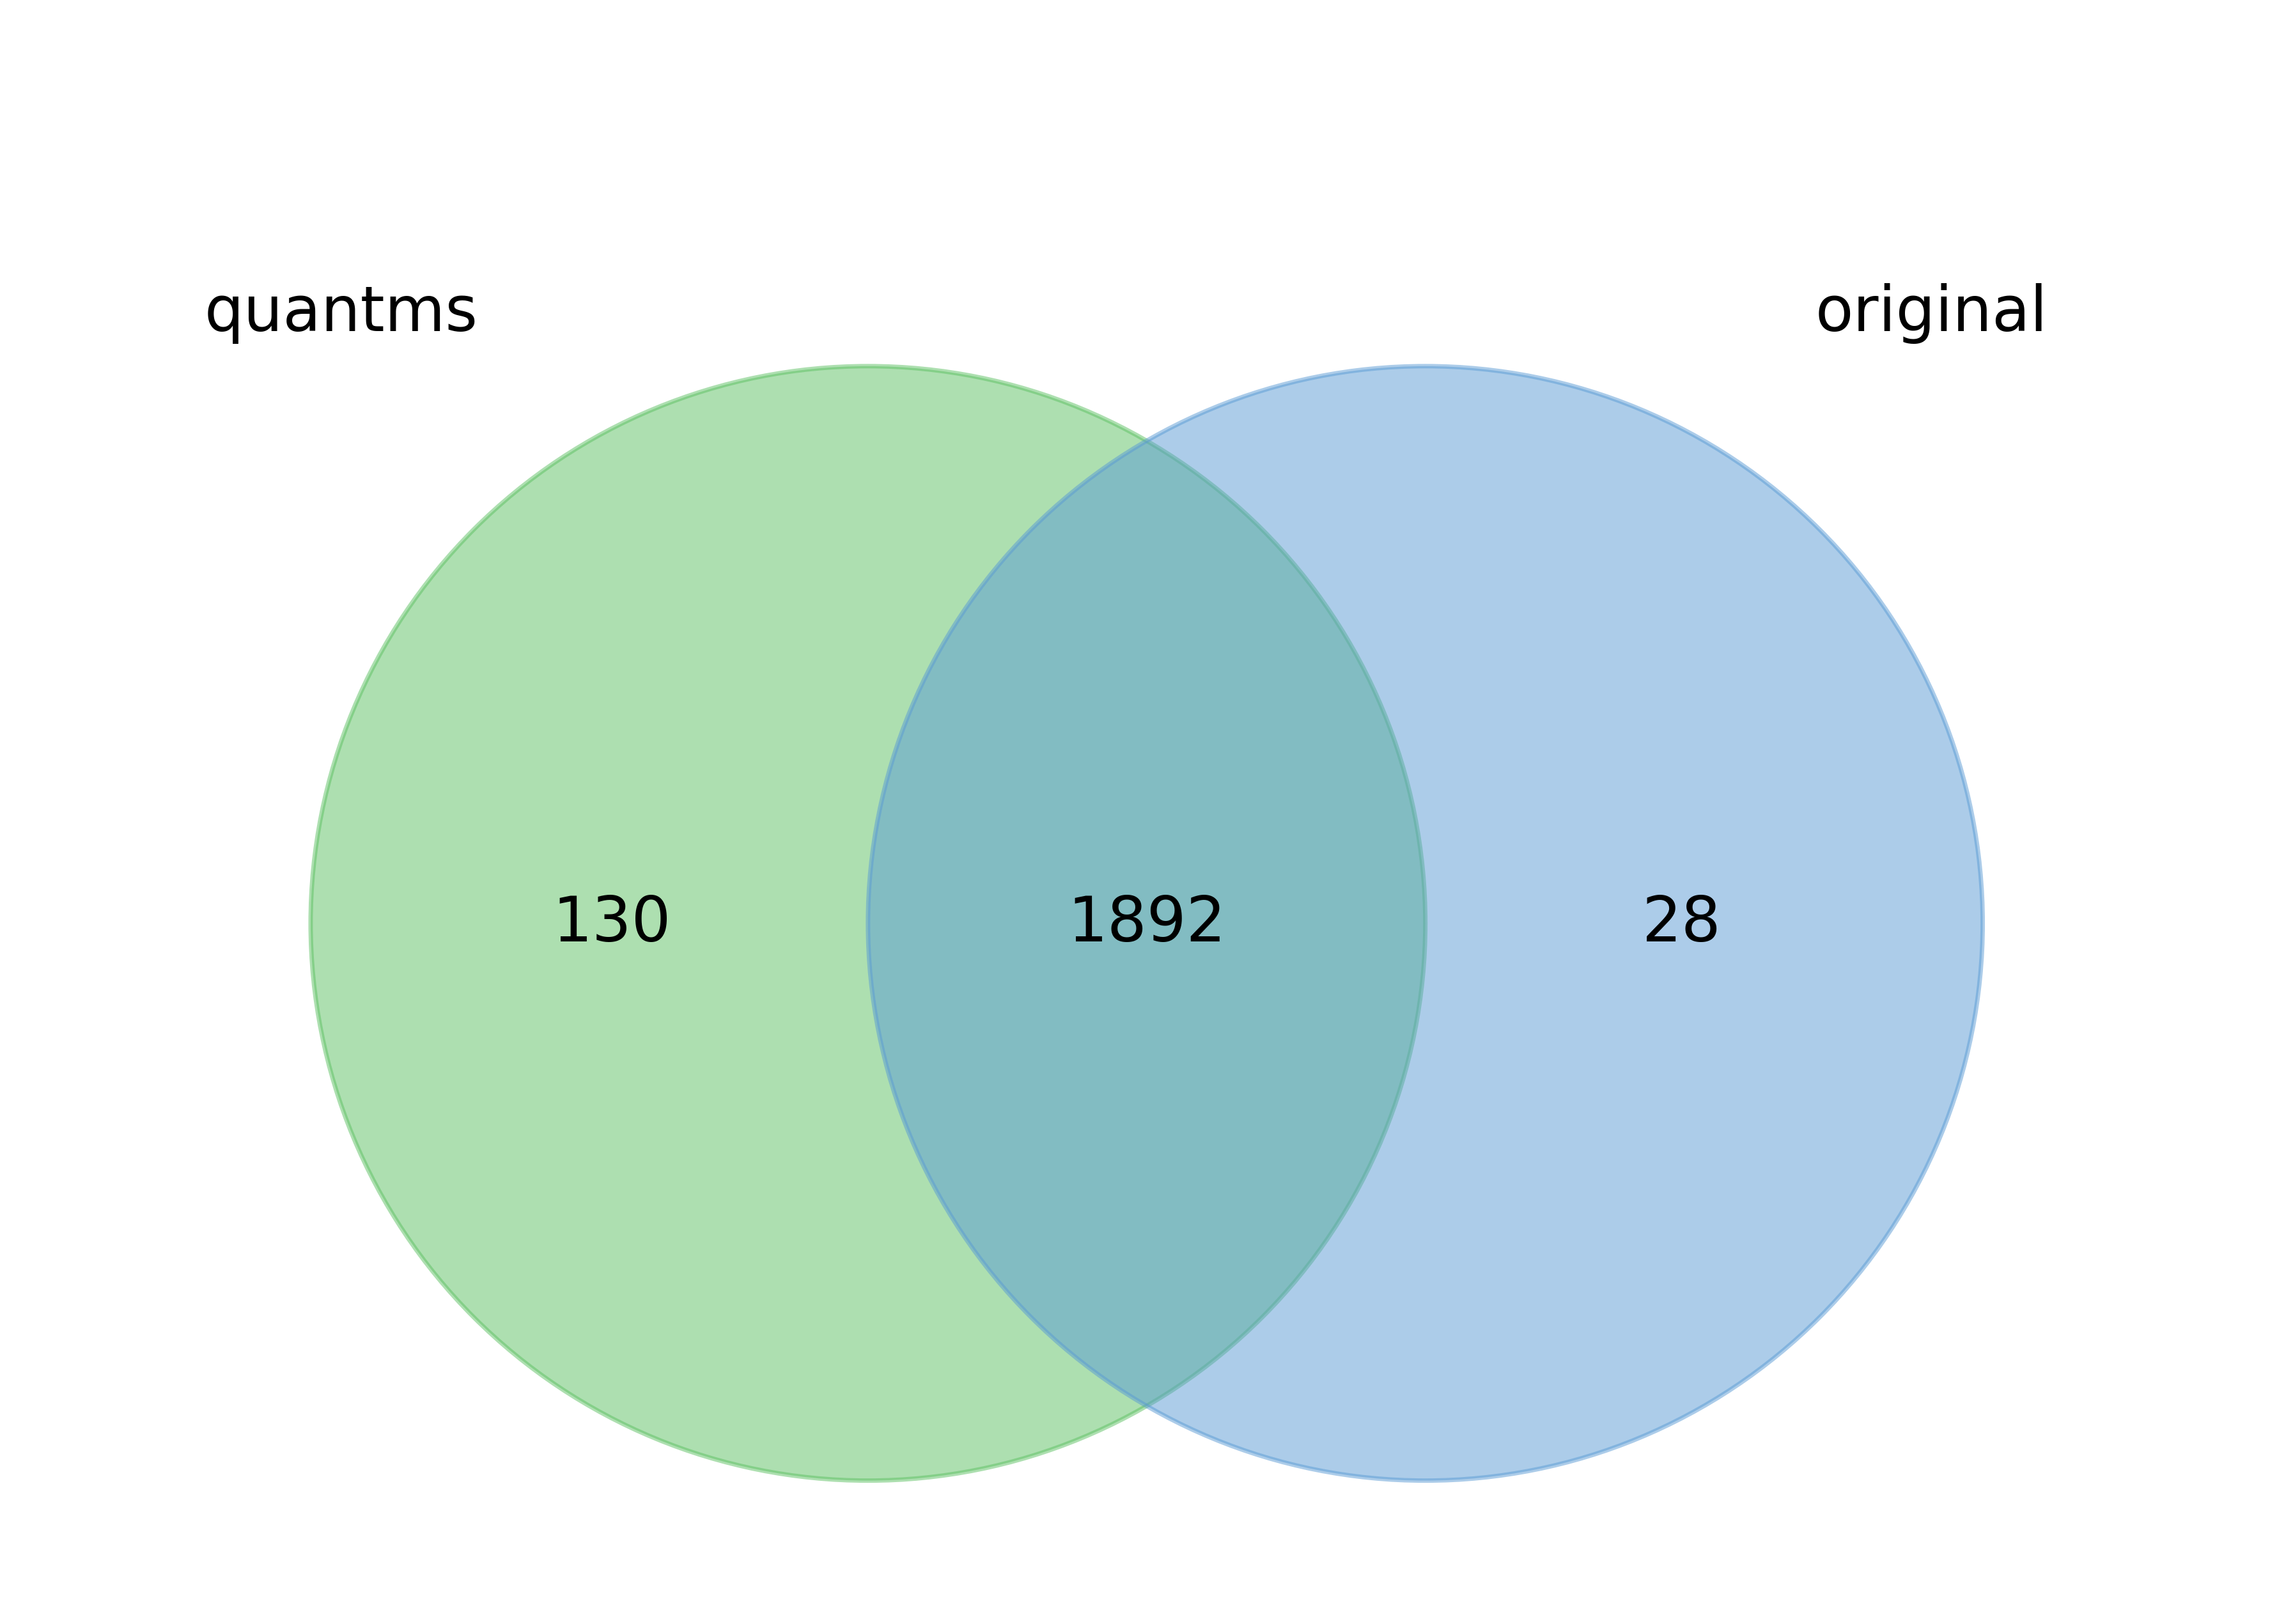

In [6]:
from pyvenn import venn

quantms_MBR["ProteinEntry"] = quantms_MBR.apply(lambda x: ";".join(sorted(x.ProteinName.split(";"))), axis=1)
MaxquantMBR['Protein IDs'] = MaxquantMBR.apply(lambda x: ";".join(sorted(x['Protein IDs'].split(";"))), axis=1)

quantms_MBR_ecoli = quantms_MBR[quantms_MBR['ProteinName'].str.contains("ECOLI")]
MaxquantMBR_ecoli = MaxquantMBR[MaxquantMBR['Fasta headers'].str.contains("ECOLI")]
labels = venn.get_labels([set(quantms_MBR_ecoli["ProteinEntry"]), set(MaxquantMBR_ecoli['Protein IDs'])], fill=['number'])
fig, ax = venn.venn2(labels, names=['quantms', 'original'], dpi=500)
ax.get_legend().remove()
plt.show()


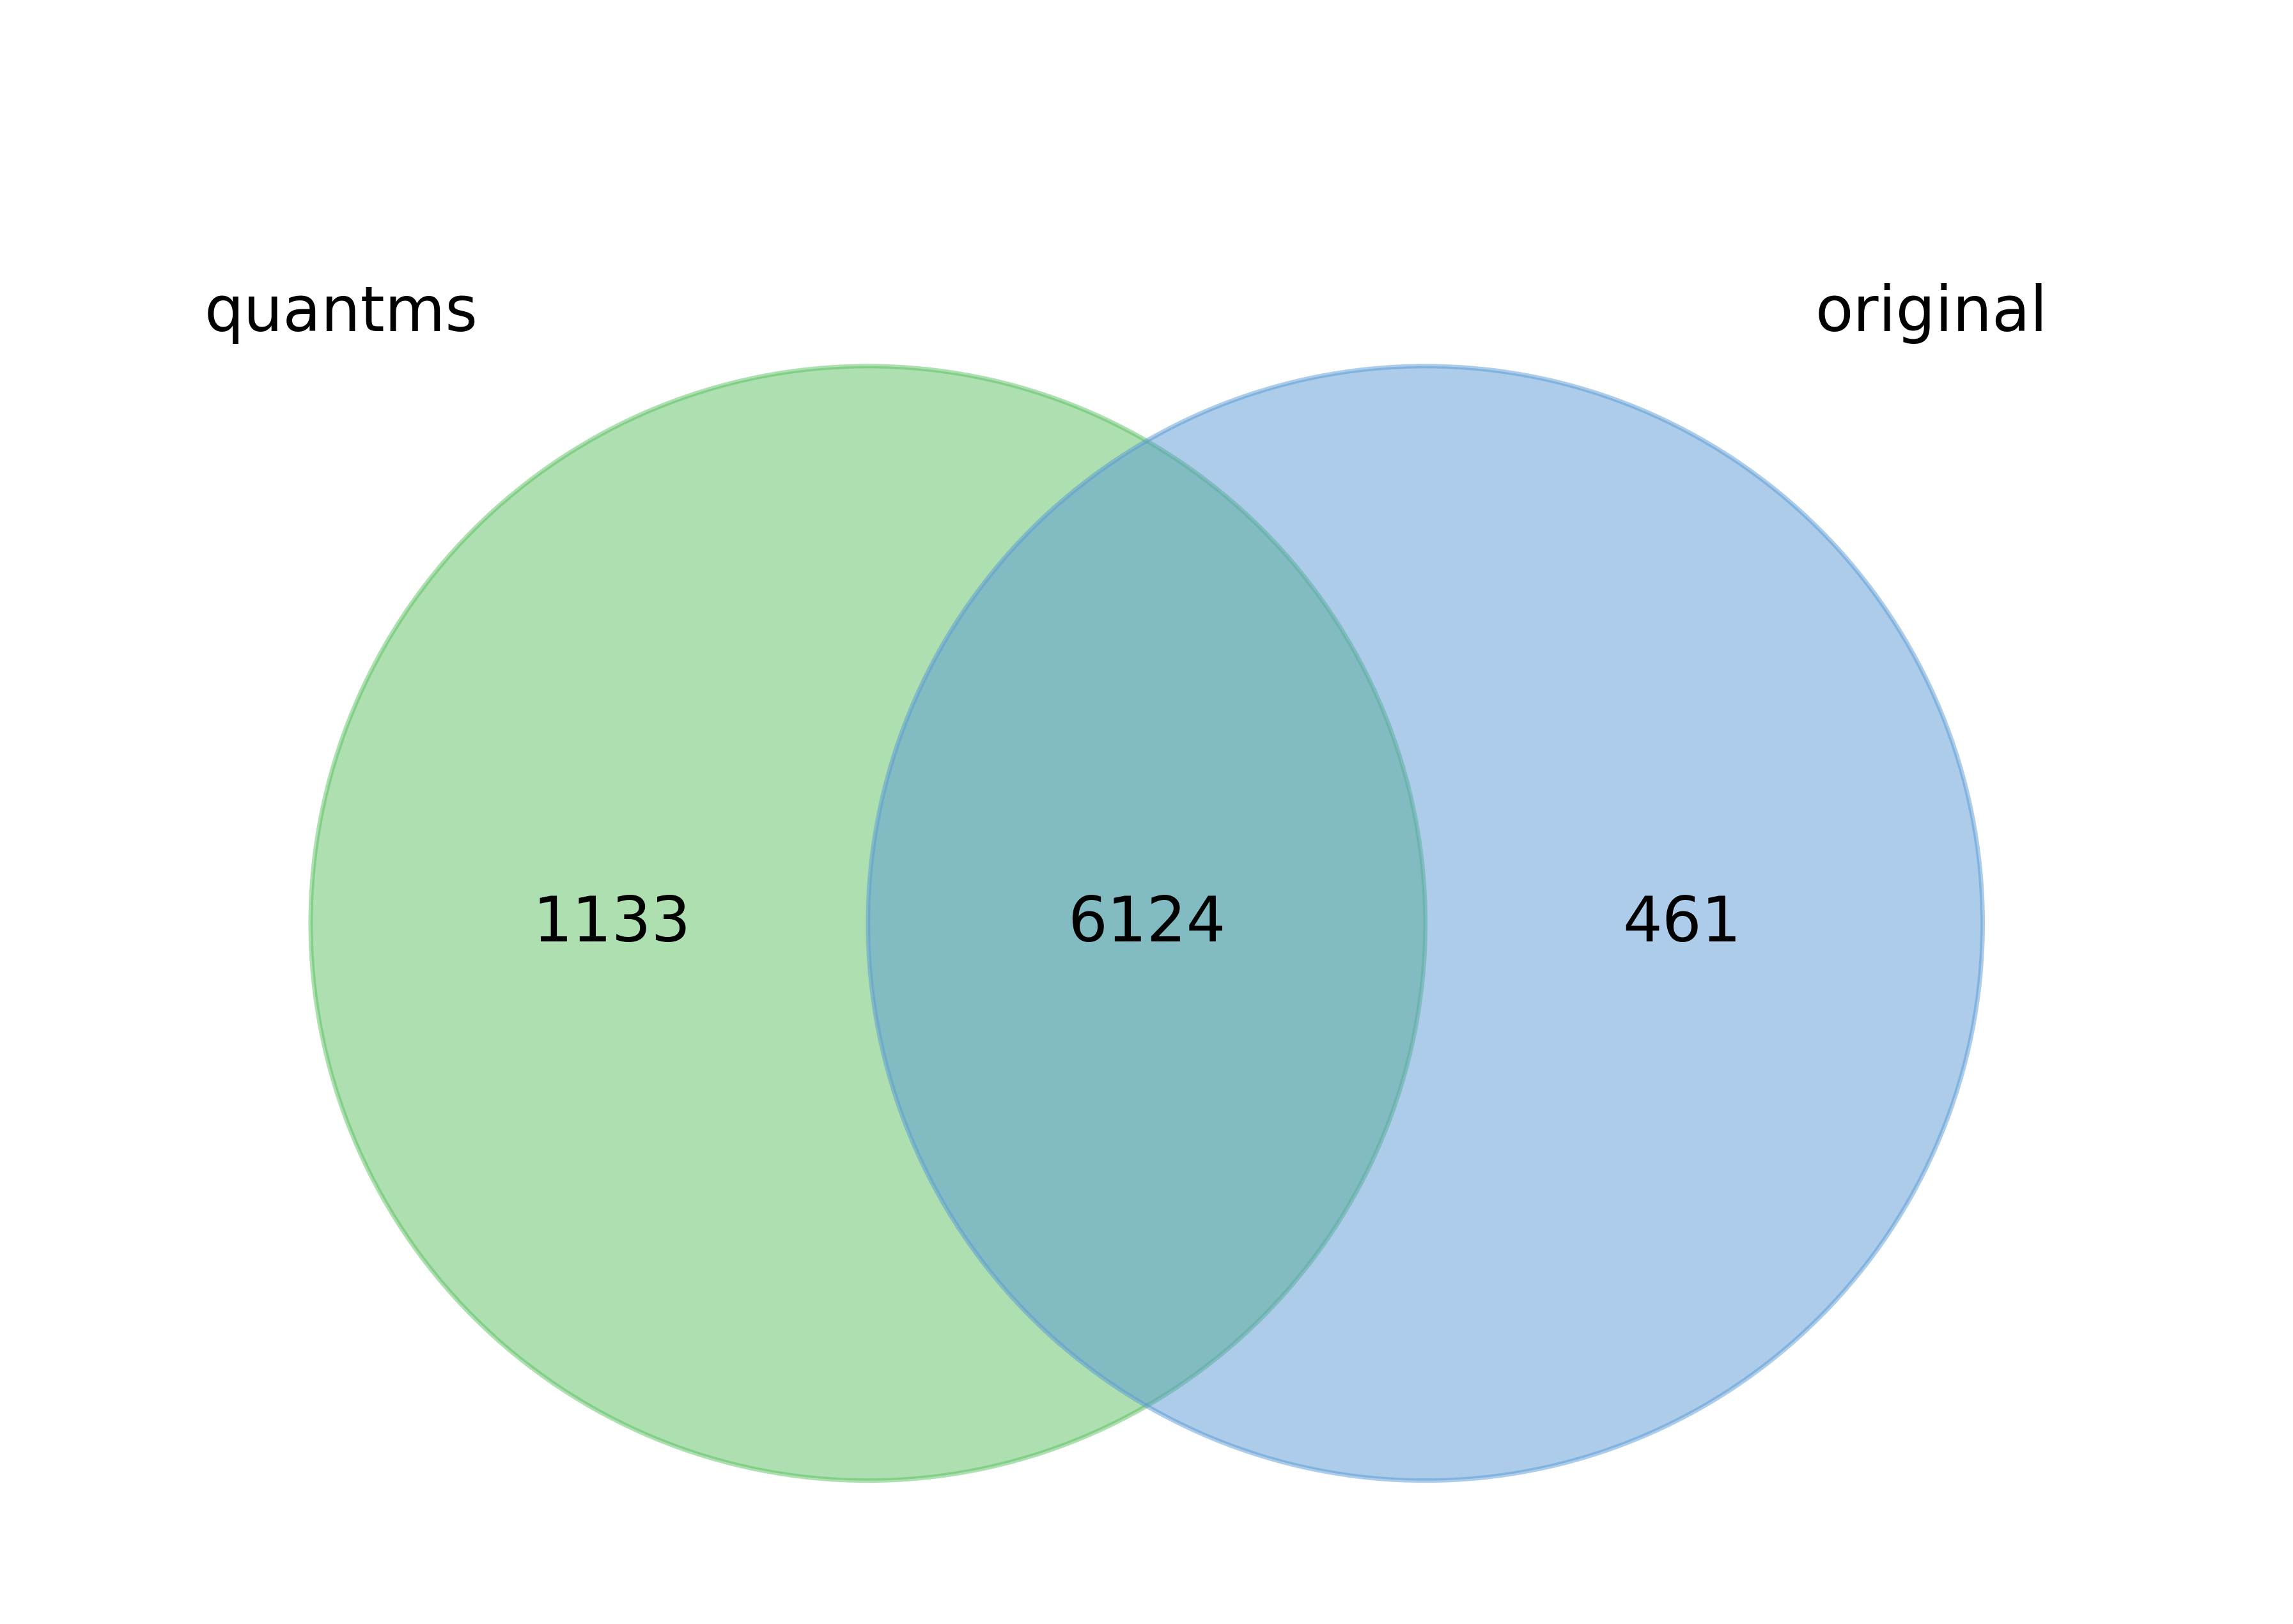

In [7]:
labels = venn.get_labels([set(quantms_MBR["ProteinEntry"]), set(MaxquantMBR['Protein IDs'])], fill=['number'])
fig, ax = venn.venn2(labels, names=['quantms', 'original'], dpi=500)
ax.get_legend().remove()
plt.show()

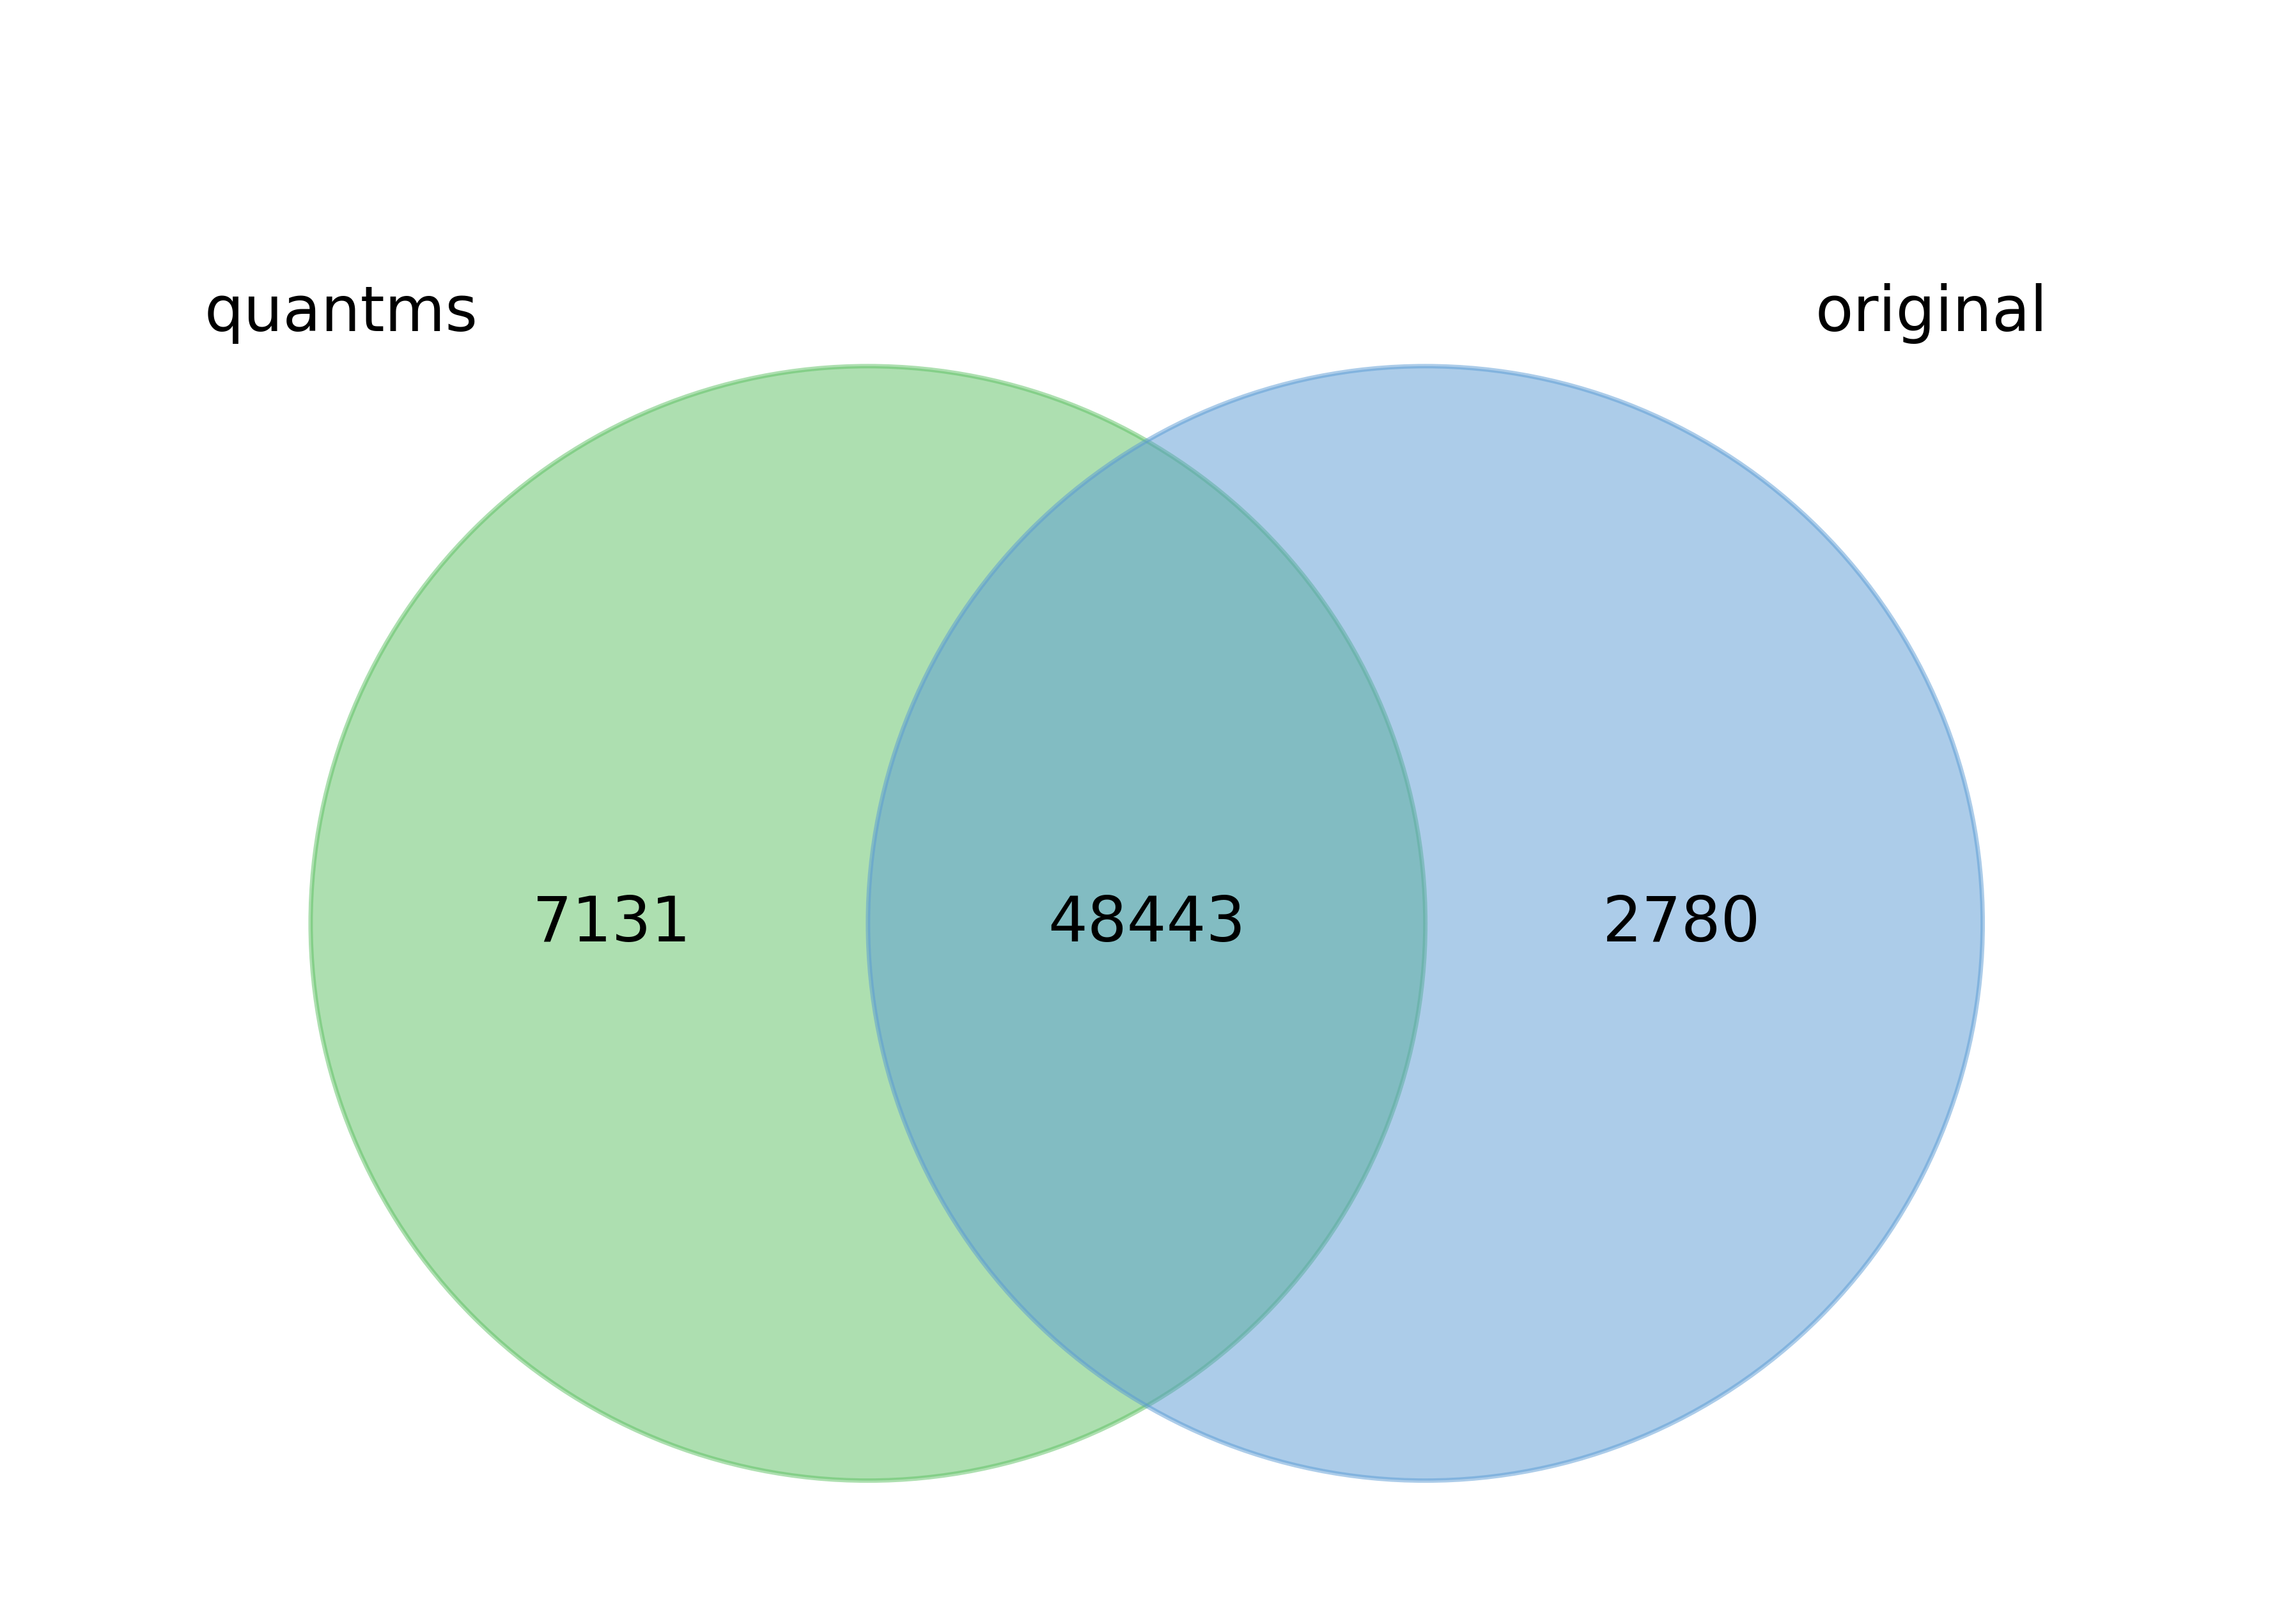

In [8]:
from pyteomics import mztab
MaxquantMBR_peptides = pd.read_csv("./MaxquantMBR/peptides.txt", sep='\t', header=0)
MaxquantMBR_peptides =MaxquantMBR_peptides[(MaxquantMBR_peptides['Reverse'] != "+") & (MaxquantMBR_peptides['Potential contaminant'] != "+")]

quantms_MBR_mztab = mztab.MzTab("./UniprotSwiss-MBR/out.mzTab")
quantms_MBR_pep =quantms_MBR_mztab.peptide_table
quantms_MBR_pep = quantms_MBR_pep[quantms_MBR_pep['opt_global_cv_MS:1002217_decoy_peptide'] != 1]
labels = venn.get_labels([set(quantms_MBR_pep['sequence']), set(MaxquantMBR_peptides['Sequence'])], fill=['number'])
fig, ax = venn.venn2(labels, names=['quantms', 'original'], dpi=500)
ax.get_legend().remove()
plt.show()


In [9]:
set(MaxquantMBR['Protein IDs']) - set(quantms_MBR["ProteinEntry"])

{'sp|A0A075B759|PAL4E_HUMAN;sp|A0A075B767|PAL4H_HUMAN;sp|A0A0B4J2A2|PAL4C_HUMAN;sp|F5H284|PAL4D_HUMAN;sp|P0DN26|PAL4F_HUMAN;sp|P0DN37|PAL4G_HUMAN;sp|P62937|PPIA_HUMAN;sp|Q9Y536|PAL4A_HUMAN',
 'sp|A0A1B0GTU1|ZC11B_HUMAN;sp|O75152|ZC11A_HUMAN',
 'sp|A0A1B0GUS4|UB2L5_HUMAN;sp|P68036|UB2L3_HUMAN',
 'sp|A0A1B0GVH7|IQCM_HUMAN',
 'sp|A0A2R8Y619|H2BE1_HUMAN;sp|O60814|H2B1K_HUMAN;sp|P57053|H2BFS_HUMAN;sp|P58876|H2B1D_HUMAN;sp|P62807|H2B1C_HUMAN;sp|Q5QNW6|H2B2F_HUMAN;sp|Q93079|H2B1H_HUMAN;sp|Q96A08|H2B1A_HUMAN;sp|Q99877|H2B1N_HUMAN;sp|Q99879|H2B1M_HUMAN;sp|Q99880|H2B1L_HUMAN',
 'sp|A0AV96|RBM47_HUMAN;sp|Q8TBY0|RBM46_HUMAN;sp|Q9NQ94|A1CF_HUMAN',
 'sp|A2RTX5|SYTC2_HUMAN;sp|P26639|SYTC_HUMAN',
 'sp|A3KN83|SBNO1_HUMAN;sp|Q9Y2G9|SBNO2_HUMAN',
 'sp|A4D2H0|CTGEF_HUMAN;sp|A4FU28|CTGE9_HUMAN;sp|P0CG41|CTGE8_HUMAN;sp|Q86UF2|CTGE6_HUMAN;sp|Q8IX94|CTGE4_HUMAN;sp|Q8IX95|CTGE3_HUMAN;sp|Q96PC5|MIA2_HUMAN',
 'sp|A5A3E0|POTEF_HUMAN;sp|P0CG38|POTEI_HUMAN;sp|P0CG39|POTEJ_HUMAN;sp|P60709|ACTB_HUMAN;sp|Q6S8J3|POTEE_

### Reproducibility between Analytical Replicate before msstats process

#### CV Within E Coli Proteins

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


26.531411319021522
27.88353771116391
27.746206325448032
23.648137089193874
32.11216264947738
32.33928569865863
33.97153055373934
29.62433503313264


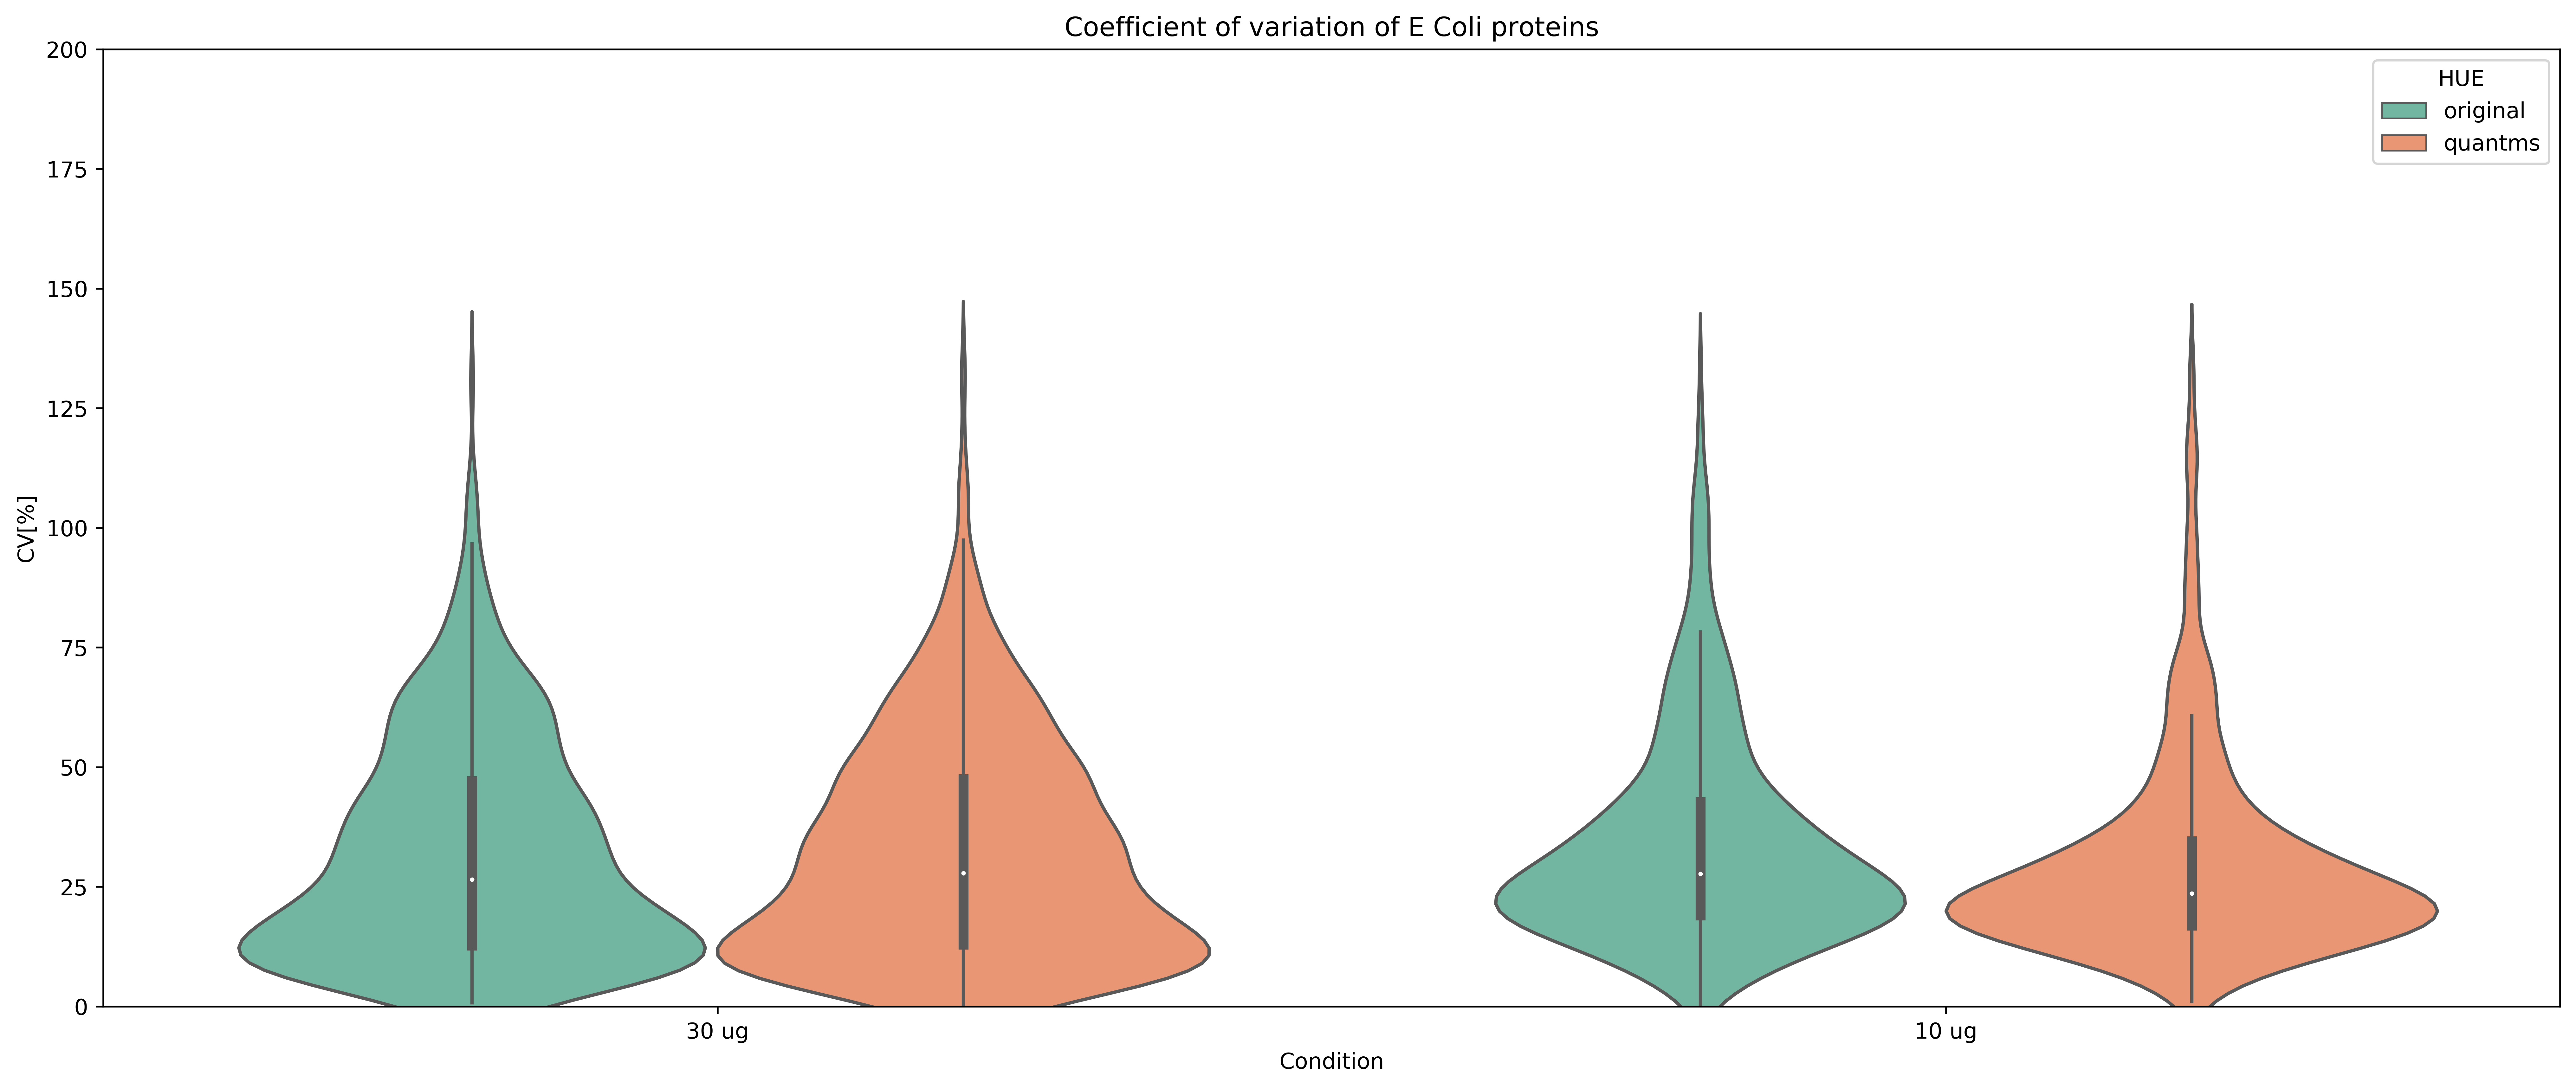

In [22]:
MaxquantMBR_ecoli = MaxquantMBR[-MaxquantMBR['Fasta headers'].str.contains("HUMAN")]
MaxquantMBR_cv = MaxquantMBR_ecoli[['Protein IDs','Intensity H1', 'Intensity H2', 'Intensity H3']]
MaxquantMBR_cv.columns = ['ProteinName','TechRep1','TechRep2', 'TechRep3']
MaxquantMBR_cv = MaxquantMBR_cv.copy()
MaxquantMBR_cv['Condition'] = "30 ug"

temp = MaxquantMBR_ecoli[['Protein IDs','Intensity L1', 'Intensity L2', 'Intensity L3']]
temp.columns = ['ProteinName','TechRep1','TechRep2', 'TechRep3']
temp = temp.copy()
temp['Condition'] = "10 ug"
MaxquantMBR_cv = MaxquantMBR_cv.append(temp)
MaxquantMBR_cv['HUE'] = "original"
MaxquantMBR_cv = MaxquantMBR_cv[(MaxquantMBR_cv.T != 0).any()]
MaxquantMBR_cv['CV[%]'] = MaxquantMBR_cv.apply(lambda x: np.std(x[1:4]) / np.mean(x[1:4]) * 100, axis=1)

n_data = pd.DataFrame(None,columns = ['ProteinName','TechRep1','TechRep2', 'TechRep3', 'Condition', "CV[%]", "HUE"])
quantms_MBR_ecoli = quantms_MBR[-quantms_MBR['ProteinName'].str.contains("HUMAN")]

for condition in np.unique(quantms_MBR_ecoli['Condition']):
    quantms_MBR_condition = quantms_MBR_ecoli[quantms_MBR_ecoli['Condition'] == condition]

    for protein in np.unique(quantms_MBR_condition['ProteinName']):
        t = quantms_MBR_condition[quantms_MBR_condition['ProteinName'] == protein]
        
        # sum intensity across fraction
        if condition == "10 ug":
            TechRep1 = np.sum(t[t['Run'].isin([i for i in range(1,25)])]['Intensity'])
            TechRep2 = np.sum(t[t['Run'].isin([i for i in range(25,49)])]['Intensity'])
            TechRep3 = np.sum(t[t['Run'].isin([i for i in range(49,73)])]['Intensity'])
        else:
            TechRep1 = np.sum(t[t['Run'].isin([i for i in range(73,97)])]['Intensity'])
            TechRep2 = np.sum(t[t['Run'].isin([i for i in range(97,121)])]['Intensity'])
            TechRep3 = np.sum(t[t['Run'].isin([i for i in range(121,145)])]['Intensity'])
            
        mean = np.mean([TechRep1, TechRep2, TechRep3])
        std = np.std([TechRep1, TechRep2, TechRep3])
        n_data = n_data.append({'ProteinName': protein,'TechRep1':TechRep1, 
                       'TechRep2': TechRep2, 'TechRep3': TechRep3, 
                       'Condition': condition, "CV[%]": 100 * (std / mean), "HUE": "quantms"}, ignore_index=True)
        
cv_data = MaxquantMBR_cv.append(n_data)
cv_data = cv_data[(cv_data['TechRep1'] !=0.0) & (cv_data['TechRep2'] !=0.0) &
                 (cv_data['TechRep3'] !=0.0)]

print(np.median(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))

print(np.mean(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.mean(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.mean(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))
print(np.mean(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))

plt.figure(figsize=(20,8), dpi=500)
plt.ylim(0, 200)
plt.title("Coefficient of variation of E Coli proteins")
sns.violinplot(x = "Condition", y="CV[%]", data=cv_data, scale= "count", palette="Set2", hue="HUE")

plt.show()

# # calcualte average CV in UPS1 proteins without missing value
# cvs = []
# xticks = []
# plt.figure(figsize=(8,6), dpi=500)


# conditions = np.unique(n_data["Condition"])
# conditions = sorted(conditions, key= lambda x: float(x.replace(" ug", "")))
# for condition in conditions:
#     cvs.append(np.mean(n_data[n_data['Condition'] == condition]["CV[%]"]))
#     xticks.append(condition)
    
# plt.plot(range(2), cvs, linewidth=3, color='r', marker='o',markerfacecolor='blue', markersize=12)
# plt.xticks(range(2), xticks)
# for i in range(2):
#     plt.text(i-0.1, cvs[i], round(cvs[i], 2))
# plt.ylabel('CV[%]')
# plt.title('Coefficient of variation of E Coli proteins')
# plt.show()

#### Calcaulate CV of HUMAN Proteins

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


39.26549252407118
36.418506481207096
26.913742978098814
24.567178676250514
41.284100326677176
39.751571777252295
32.65359855030534
30.798531125148337


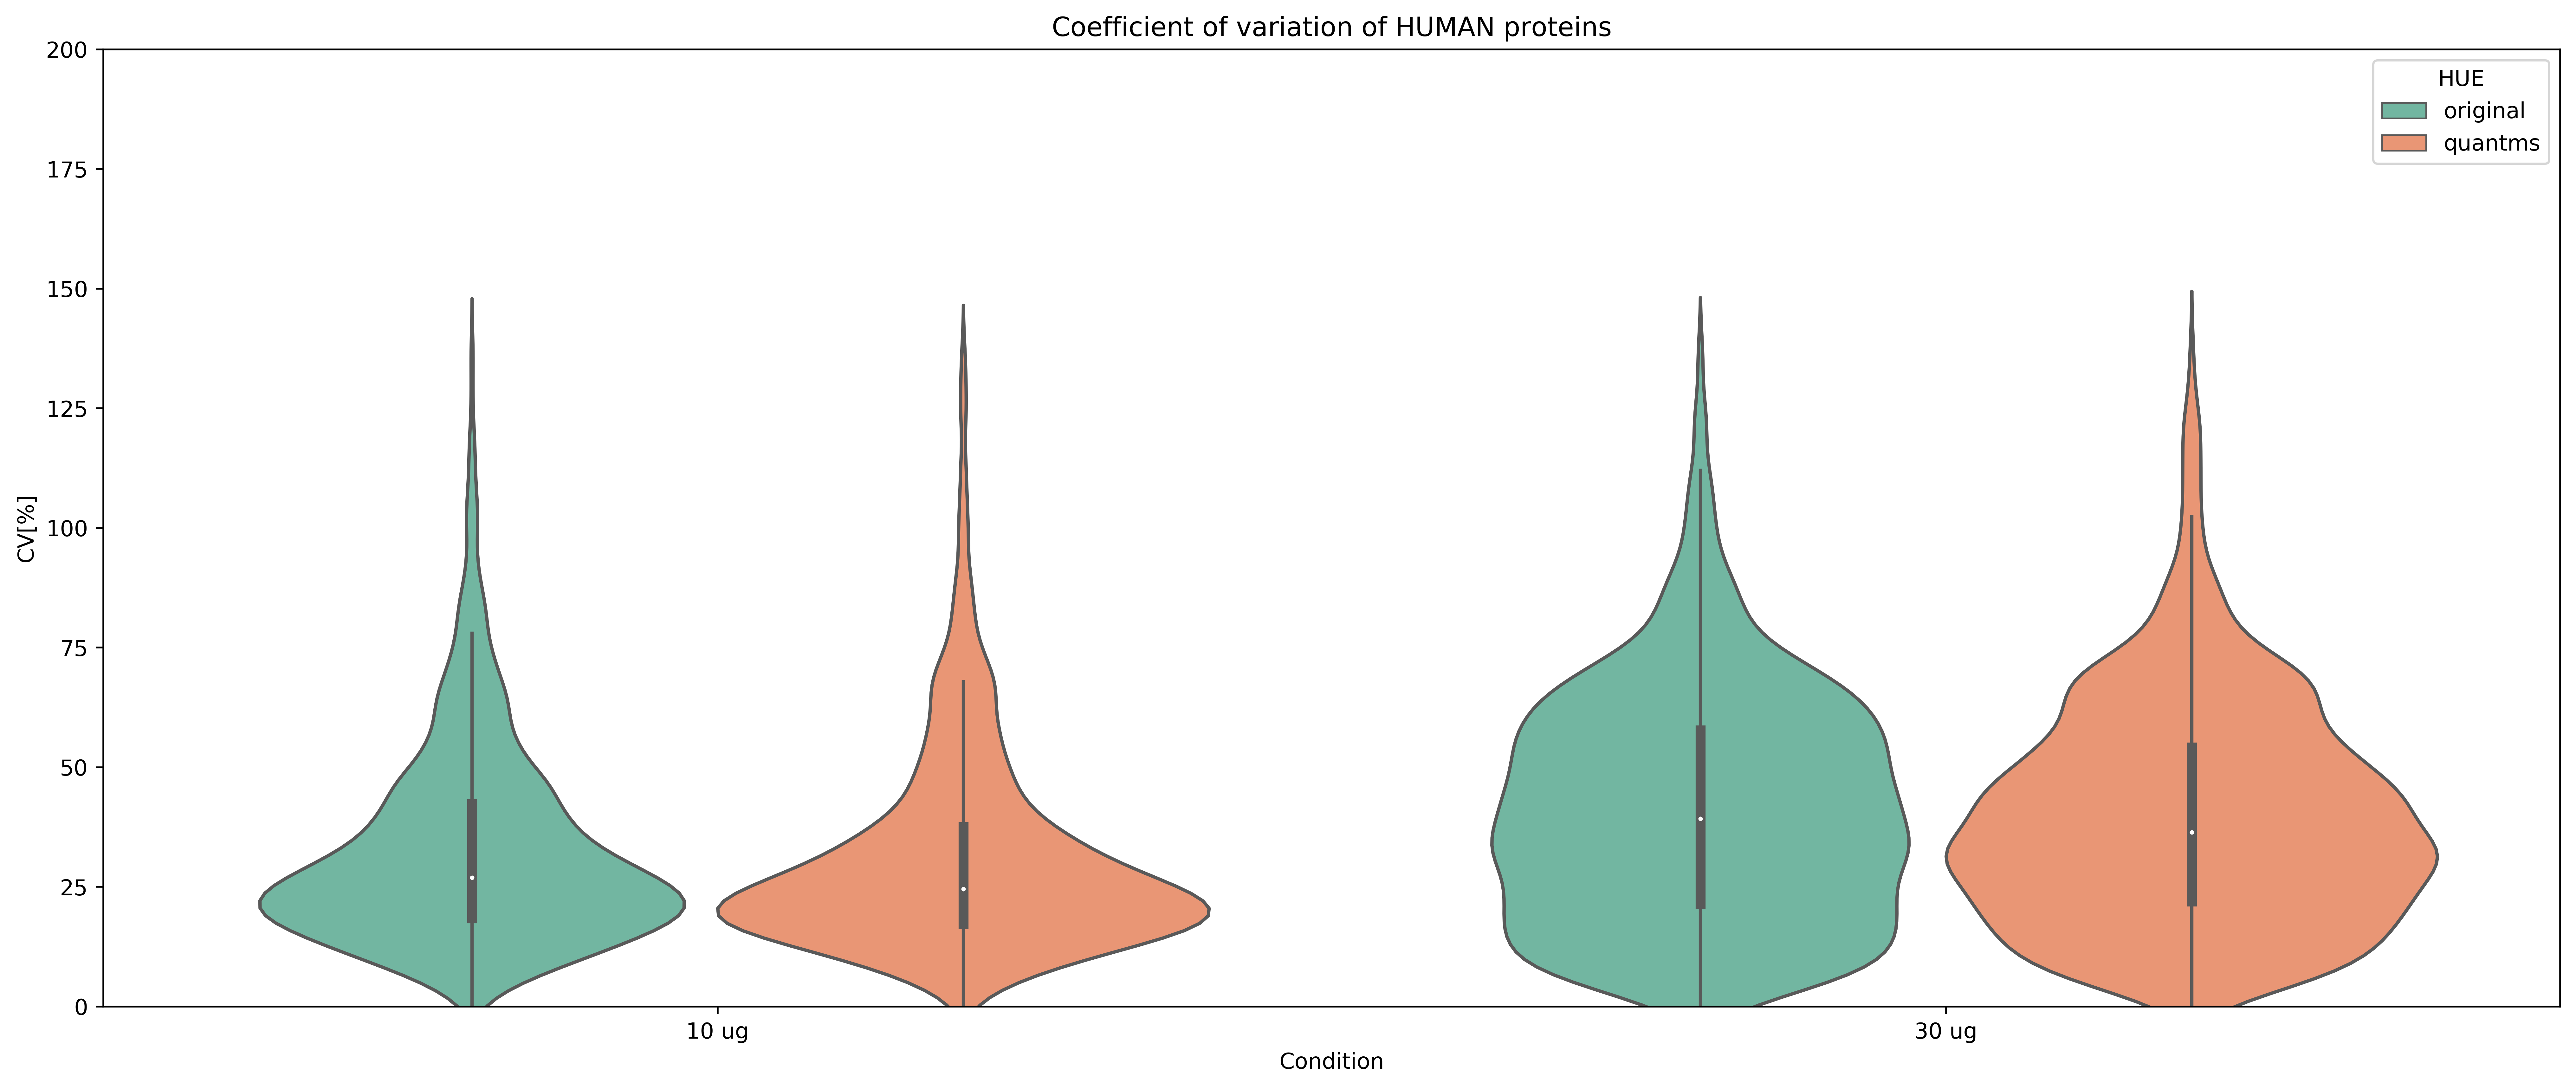

In [23]:
MaxquantMBR_human = MaxquantMBR[-MaxquantMBR['Fasta headers'].str.contains("ECOLI")]
MaxquantMBRHuman_cv = MaxquantMBR_human[['Protein IDs','Intensity H1', 'Intensity H2', 'Intensity H3']]
MaxquantMBRHuman_cv.columns = ['ProteinName','TechRep1','TechRep2', 'TechRep3']
MaxquantMBRHuman_cv = MaxquantMBRHuman_cv.copy()
MaxquantMBRHuman_cv['Condition'] = "30 ug"

temp = MaxquantMBR_human[['Protein IDs','Intensity L1', 'Intensity L2', 'Intensity L3']]
temp.columns = ['ProteinName','TechRep1','TechRep2', 'TechRep3']
temp = temp.copy()
temp['Condition'] = "10 ug"
MaxquantMBRHuman_cv = MaxquantMBRHuman_cv.append(temp)
MaxquantMBRHuman_cv['HUE'] = "original"
MaxquantMBRHuman_cv = MaxquantMBRHuman_cv[(MaxquantMBRHuman_cv.T != 0).any()]
MaxquantMBRHuman_cv['CV[%]'] = MaxquantMBRHuman_cv.apply(lambda x: np.std(x[1:4]) / np.mean(x[1:4]) * 100, axis=1)


b_data = pd.DataFrame(None,columns = ['ProteinName','TechRep1','TechRep2', 'TechRep3', 'Condition', "CV[%]", "HUE"])
quantms_MBR_background = quantms_MBR[-quantms_MBR['ProteinName'].str.contains("ECOLI")]

for condition in np.unique(quantms_MBR_background['Condition']):
    quantms_MBR_background_condition =quantms_MBR_background.loc[quantms_MBR_background['Condition'] == condition]
        
    for protein in np.unique(quantms_MBR_background_condition['ProteinName']):
        t = quantms_MBR_background_condition[quantms_MBR_background_condition['ProteinName'] == protein]
        
        # sum intensity across fraction
        if condition == "10 ug":
            TechRep1 = np.sum(t[t['Run'].isin([i for i in range(1,25)])]['Intensity'])
            TechRep2 = np.sum(t[t['Run'].isin([i for i in range(25,49)])]['Intensity'])
            TechRep3 = np.sum(t[t['Run'].isin([i for i in range(49,73)])]['Intensity'])
        else:
            TechRep1 = np.sum(t[t['Run'].isin([i for i in range(73,97)])]['Intensity'])
            TechRep2 = np.sum(t[t['Run'].isin([i for i in range(97,121)])]['Intensity'])
            TechRep3 = np.sum(t[t['Run'].isin([i for i in range(121,145)])]['Intensity'])
            
        mean = np.mean([TechRep1, TechRep2, TechRep3])
        std = np.std([TechRep1, TechRep2, TechRep3])
        
        b_data = b_data.append({'ProteinName': protein,'TechRep1':TechRep1, 
                       'TechRep2': TechRep2, 'TechRep3': TechRep3, 
                       'Condition': condition, "CV[%]": 100 * (std / mean), "HUE": "quantms"}, ignore_index=True)
cv_data = MaxquantMBRHuman_cv.append(b_data)
cv_data = cv_data[(cv_data['TechRep1'] !=0.0) & (cv_data['TechRep2'] !=0.0) &
                 (cv_data['TechRep3'] !=0.0)]

print(np.median(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))

print(np.mean(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.mean(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.mean(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))
print(np.mean(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))

plt.figure(figsize=(20,8), dpi=500)
plt.ylim(0, 200)
plt.title("Coefficient of variation of HUMAN proteins")
sns.violinplot(x = "Condition", y="CV[%]", data=cv_data, scale= "count", palette="Set2", hue="HUE",
               order=['10 ug', '30 ug'])

plt.show()

### Quantification results for the benchmark dataset: quantms

In [88]:
quantms = pd.read_csv("./UniprotSwiss-MBR/out_msstats.csv", sep=',', header=0)
quantms['TechReplicate'] = quantms['Reference'].str[-6]
quantms = quantms[-(quantms['ProteinName'].str.contains("DECOY_") | (quantms['ProteinName'].str.contains("CONTAMINANT")))]
quantms.to_csv("./UniprotSwiss-MBR/out_msstats_tech.csv", sep=",", index=False)

In [35]:
n_data.to_csv("ndata.csv", sep=',', header=0)

In [111]:
quantmsMBR_ECOLI_pic = pd.DataFrame(None, columns=["ProteinName", "Log2(ratio)", "Log10(summed intensity)", "Species"])
for prot, group in n_data.groupby("ProteinName"):
    if len(group["ProteinName"]) == 2:
        t10 = group[group['Condition'] == "10 ug"][["TechRep1", "TechRep2", "TechRep3"]]
        t30 = group[group['Condition'] == "30 ug"][["TechRep1", "TechRep2", "TechRep3"]]
        if np.median(t10, axis=1)[0] == 0.0 or np.median(t30, axis=1)[0] == 0.0:
            continue
        Log10summed_intensity = np.log10(np.mean(t10, axis=1).values[0])
        log2ratio = np.log2(np.mean(t30, axis=1).values[0] / np.mean(t10, axis=1).values[0])
        quantmsMBR_ECOLI_pic = quantmsMBR_ECOLI_pic.append({"ProteinName":prot, "Log2(ratio)": log2ratio, "Log10(summed intensity)": Log10summed_intensity,
                                                           "Species": "E.coli"}, ignore_index=True)

In [112]:
for prot, group in b_data.groupby("ProteinName"):
    if len(group["ProteinName"]) == 2:
        t10 = group[group['Condition'] == "10 ug"][["TechRep1", "TechRep2", "TechRep3"]]
        t30 = group[group['Condition'] == "30 ug"][["TechRep1", "TechRep2", "TechRep3"]]
        if np.median(t10, axis=1)[0] == 0.0 or np.median(t30, axis=1)[0] == 0.0:
            continue
        Log10summed_intensity = np.log10(np.mean(t10, axis=1).values[0])
        log2ratio = np.log2(np.mean(t30, axis=1).values[0] / np.mean(t10, axis=1).values[0])
        quantmsMBR_ECOLI_pic = quantmsMBR_ECOLI_pic.append({"ProteinName":prot, "Log2(ratio)": log2ratio, "Log10(summed intensity)": Log10summed_intensity,
                                                           "Species": "Human"}, ignore_index=True)

In [113]:
quantmsMBR_ECOLI_pic

                ProteinName  Log2(ratio)  Log10(summed intensity) Species
0      sp|P00350|6PGD_ECOLI     2.145615                 9.636928  E.coli
1      sp|P00363|FRDA_ECOLI     1.517241                 9.435964  E.coli
2      sp|P00370|DHE4_ECOLI     2.053354                 8.447101  E.coli
3       sp|P00393|NDH_ECOLI     2.391885                 8.456035  E.coli
4      sp|P00448|SODM_ECOLI     2.230709                 9.355674  E.coli
...                     ...          ...                      ...     ...
6597   sp|Q9Y6W3|CAN7_HUMAN    -0.497563                 6.955800   Human
6598   sp|Q9Y6X3|SCC4_HUMAN     2.929242                 7.898337   Human
6599  sp|Q9Y6X9|MORC2_HUMAN     0.329562                 8.442314   Human
6600  sp|Q9Y6Y0|NS1BP_HUMAN    -0.217335                 7.407441   Human
6601  sp|Q9Y6Y8|S23IP_HUMAN     2.359199                 7.255534   Human

[6602 rows x 4 columns]

In [82]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600  # 图形分辨率


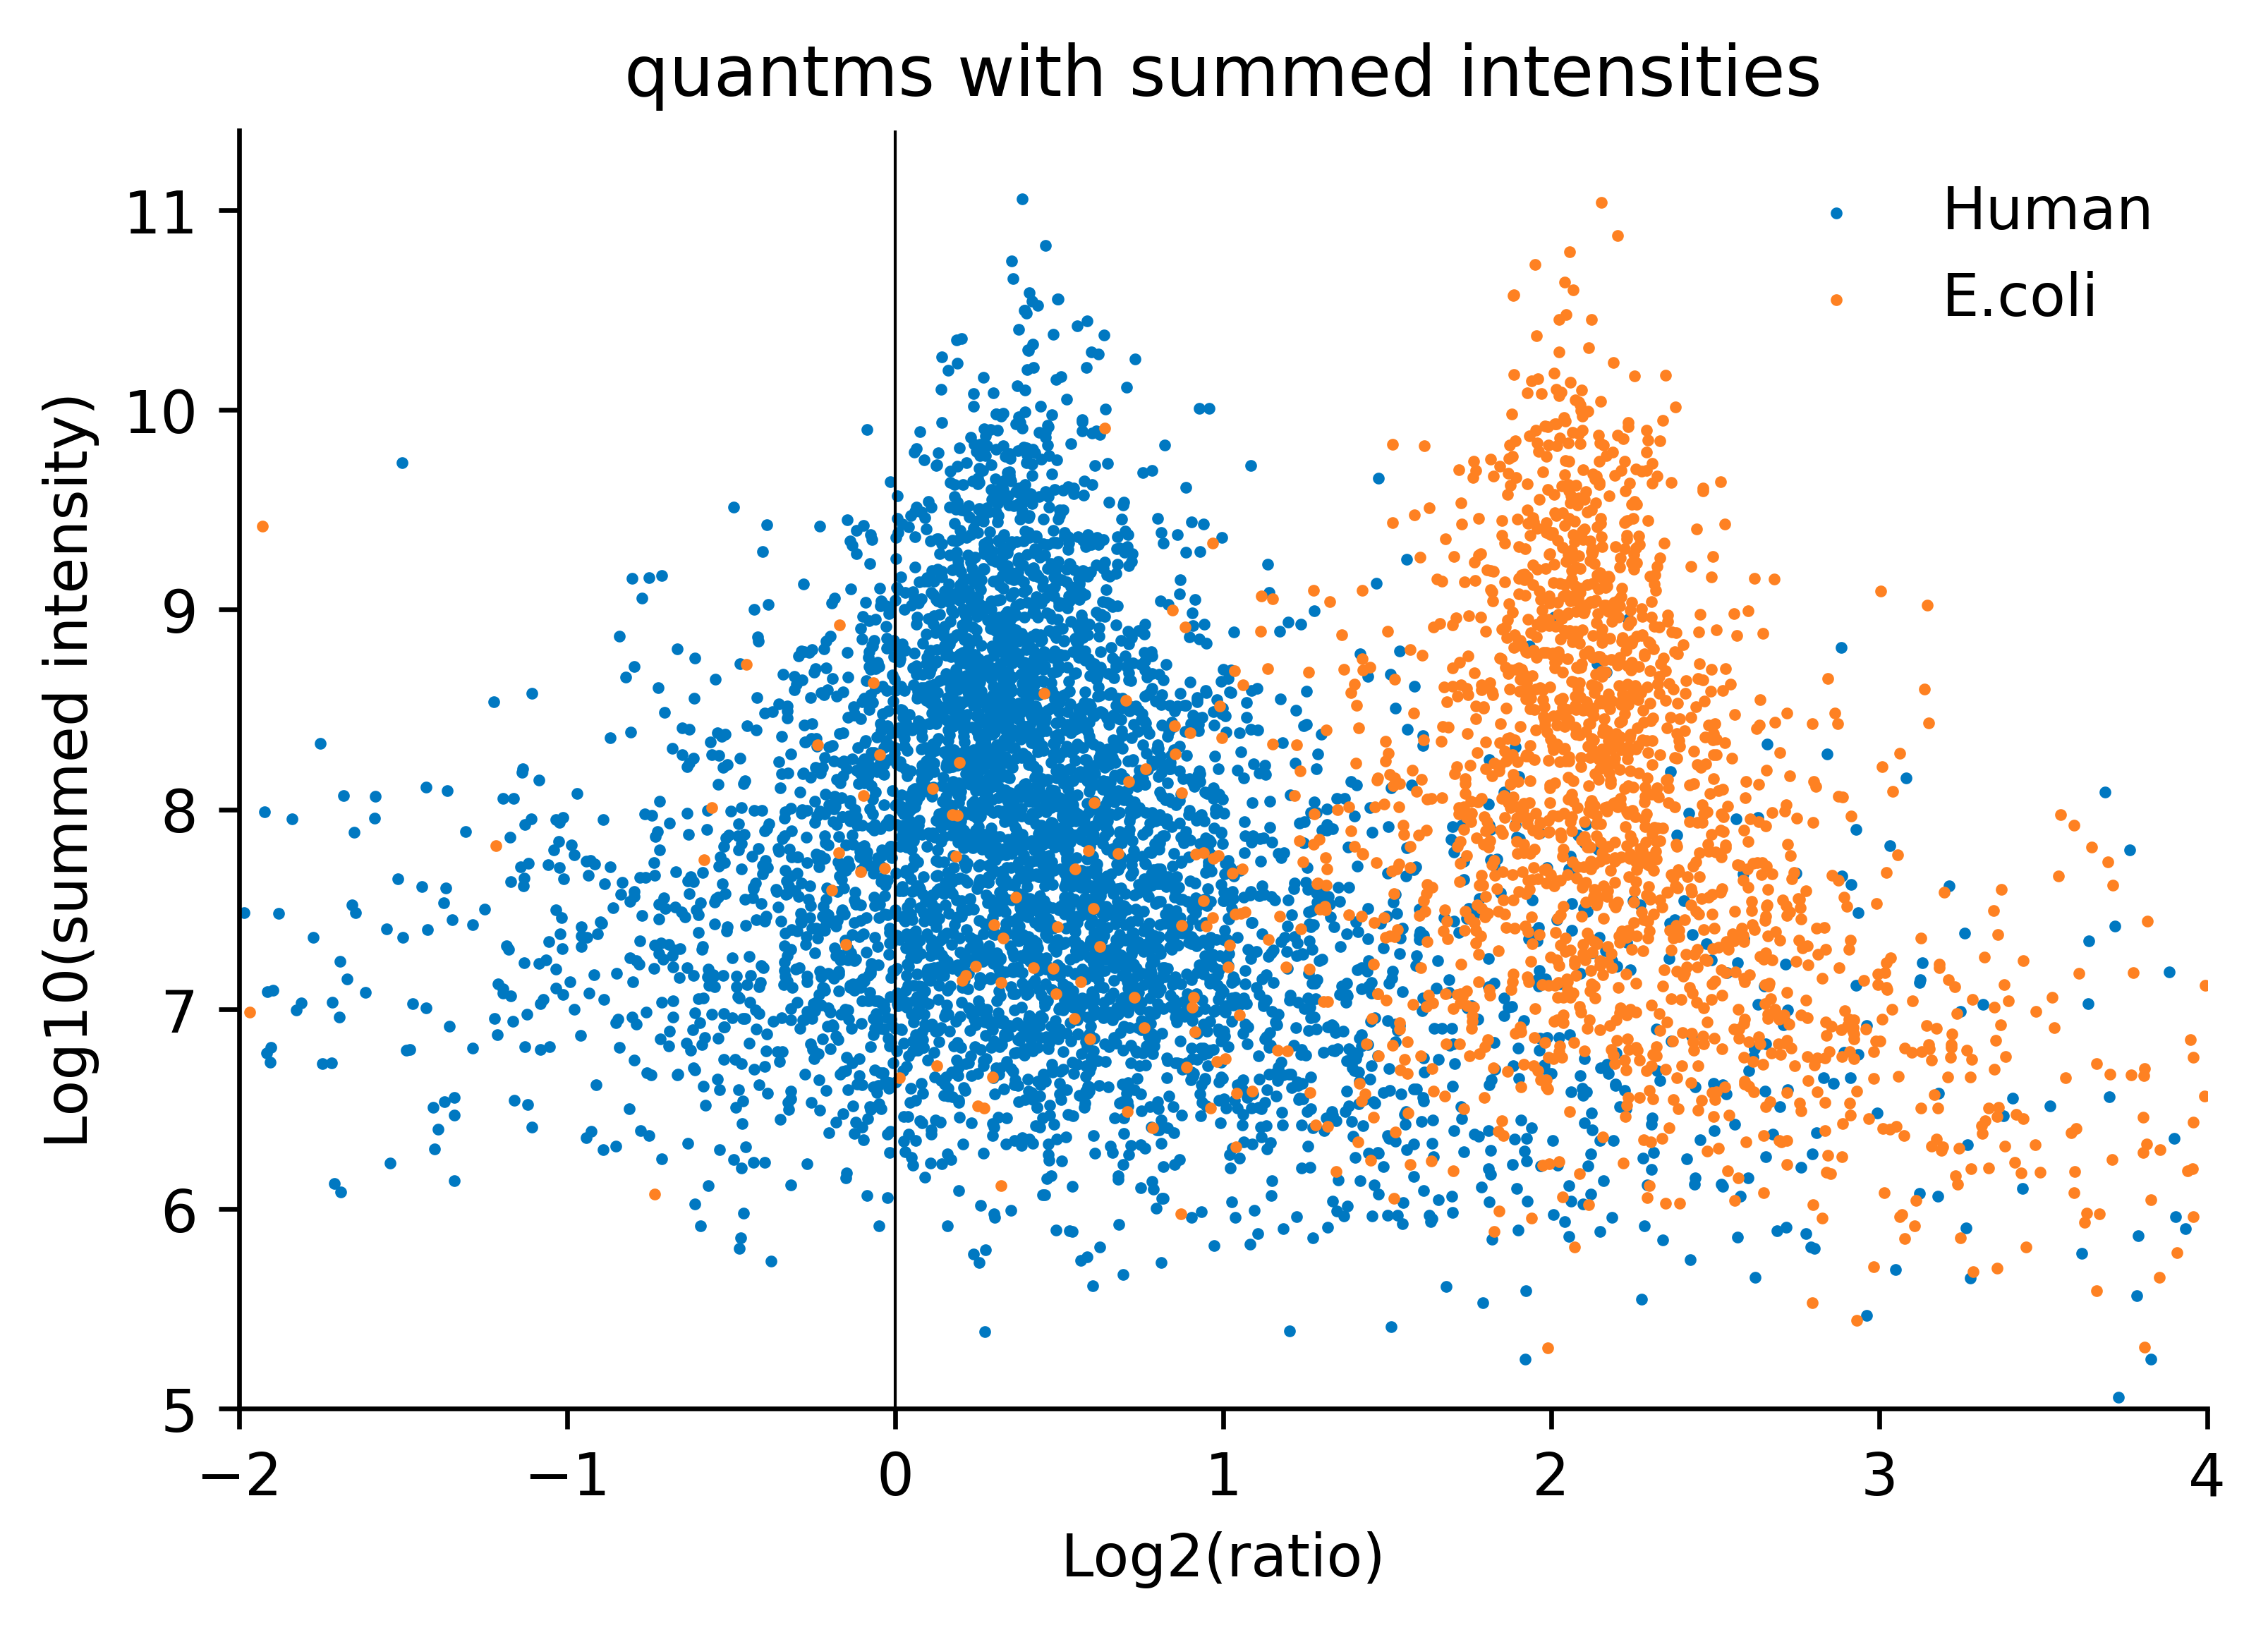

In [162]:
fig, ax = plt.subplots()

line1 = ax.scatter(quantmsMBR_ECOLI_pic[quantmsMBR_ECOLI_pic['Species'] == "Human"]["Log2(ratio)"], y=quantmsMBR_ECOLI_pic[quantmsMBR_ECOLI_pic['Species'] == "Human"]['Log10(summed intensity)'], c="#0078C1", s=1)

line2 = ax.scatter(quantmsMBR_ECOLI_pic[quantmsMBR_ECOLI_pic['Species'] == "E.coli"]["Log2(ratio)"], y=quantmsMBR_ECOLI_pic[quantmsMBR_ECOLI_pic['Species'] == "E.coli"]['Log10(summed intensity)'], c="#FE8122", s=1)

ax.axvline(x=0, c="black", linewidth=0.5)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend(handles=[line1, line2], labels=['Human', 'E.coli'], loc="best", frameon=False)

plt.title("quantms with summed intensities")
plt.xlim(-2,4)
plt.ylim(5)
plt.xlabel("Log2(ratio)")
plt.ylabel("Log10(summed intensity)")
plt.show()

0.4535230331817283
0.7162177059552721
2.196554024114771
0.5950505679246544


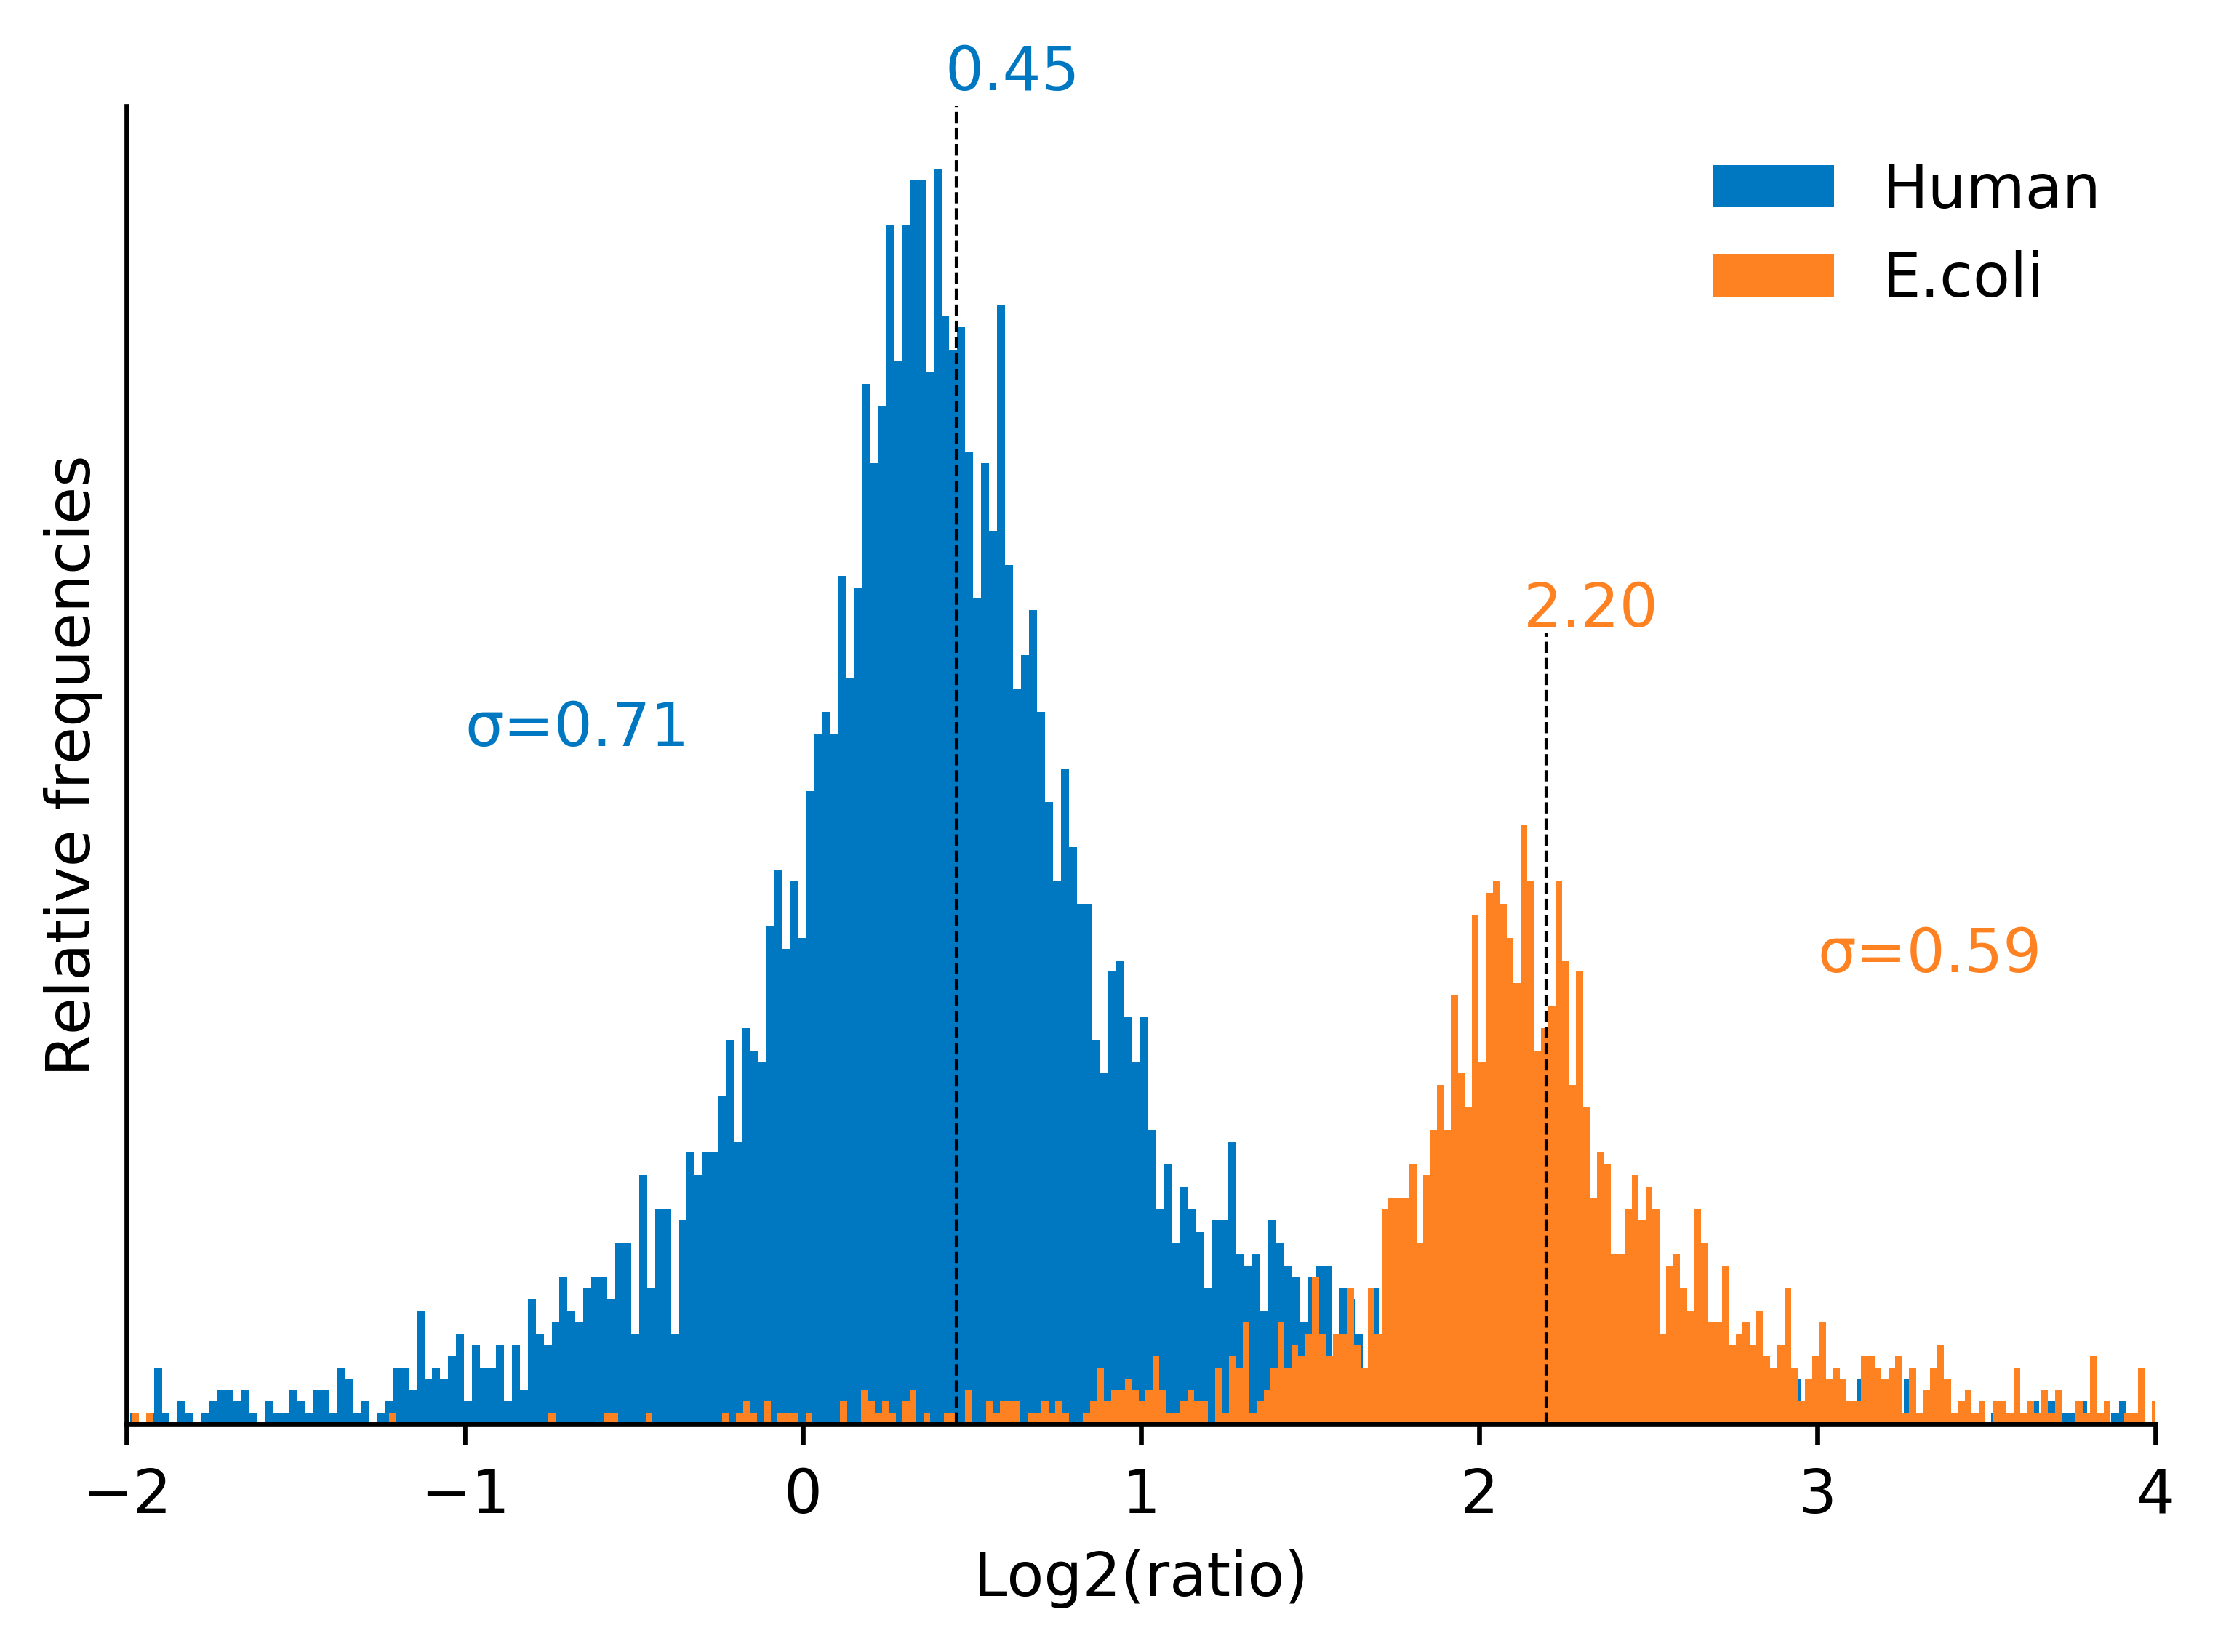

In [230]:
fig, ax = plt.subplots()

ax.hist(quantmsMBR_ECOLI_pic[quantmsMBR_ECOLI_pic['Species'] == "Human"]["Log2(ratio)"], bins=600, color="#0078C1")
u2 = np.mean(quantmsMBR_ECOLI_pic[quantmsMBR_ECOLI_pic['Species'] == "Human"]["Log2(ratio)"])
var2 = np.var(quantmsMBR_ECOLI_pic[quantmsMBR_ECOLI_pic['Species'] == "Human"]["Log2(ratio)"])
print(u2)
print(var2)

ax.hist(quantmsMBR_ECOLI_pic[quantmsMBR_ECOLI_pic['Species'] == "E.coli"]["Log2(ratio)"], bins=600, color="#FE8122")
u1 = np.mean(quantmsMBR_ECOLI_pic[quantmsMBR_ECOLI_pic['Species'] == "E.coli"]["Log2(ratio)"])
var1 = np.var(quantmsMBR_ECOLI_pic[quantmsMBR_ECOLI_pic['Species'] == "E.coli"]["Log2(ratio)"])
print(u1)
print(var1)

ax.legend(labels=['Human', 'E.coli'], loc="best", frameon=False)

ax.axvline(x=2.196554024114771, ymax=0.6, c="black", linewidth=0.5, ls="--")
ax.axvline(x=0.4535230331817283, c="black", linewidth=0.5, ls="--")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.text(0.42,118,"0.45", color="#0078C1")
plt.text(2.13,70.5,"2.20", color="#FE8122")

plt.text(-1,60,"σ=0.71", color="#0078C1")
plt.text(3,40,"σ=0.59", color="#FE8122")
plt.yticks([])
plt.xlabel("Log2(ratio)")
plt.ylabel("Relative frequencies")
plt.xlim(-2,4)
plt.show()

### Runing with Proteus+quantms

In [185]:
import re
from collections import Counter

def clean_PeptideSequence(pep_seq):
    pattern = re.compile(r"\(.*?\)")
    pep_seq = pep_seq.replace(".", "")
    return pattern.sub("", pep_seq)

def modified_PeptideSequence(pep_seq):
    pattern = re.compile(r"\(.*?\)")
    t_pep_seq = pep_seq.replace(".", "").replace("Acetyl", "ac").replace("Carbamidomethyl", "ca").replace("Oxidation", "ox")
    t_pep_seq = "_" + t_pep_seq + "_"

def get_modifications(pep_seq):
    pattern = re.compile(r"\(.*?\)")
    t = ""
    modifications = re.findall(pattern, pep_seq)
    if len(modifications) == 0:
        return "Unmodified"
    c = Counter(modifications)
    for key, value in c.items():
        if value == 1:
            c[key] = ""
        else:
            c[key] = str(c[key]) + " "
    modifications = ",".join(set(modifications))
    if "(Acetyl)" in c:
        modifications = modifications.replace("(Acetyl)", c["(Acetyl)"] + "Acetyl (Protein N-term)")
    if "(Carbamidomethyl)" in c:
        modifications = modifications.replace("(Carbamidomethyl)", c["(Carbamidomethyl)"] + "Carbamidomethyl (C)")
    if "(Oxidation)" in c:
        modifications = modifications.replace("(Oxidation)", c["(Oxidation)"] + "Oxidation (M)")
        
    return modifications

def get_experiment(row):
    if "Ecoli10" in row['Reference']:
        return "L" + str(row['Reference'][-6])
    else:
        return "H" + str(row['Reference'][-6])
    
    

evi = pd.DataFrame(None, columns=['sequence', 'modified_sequence', 'modifications', 'protein_group', 
                                  'protein', 'experiment', 'charge', 'reverse', 'contaminant', 'intensity'])

quantms = pd.read_csv("./UniprotSwiss-MBR/out_msstats.csv", sep=',', header=0)
quantms['TechReplicate'] = quantms['Reference'].str[-6]
quantms = quantms[-(quantms['ProteinName'].str.contains("DECOY_") | (quantms['ProteinName'].str.contains("CONTAMINANT")))]

evi['sequence'] = quantms.apply(lambda x: clean_PeptideSequence(x['PeptideSequence']), axis=1)
evi['modified_sequence'] = quantms.apply(lambda x: modified_PeptideSequence(x['PeptideSequence']), axis=1)
evi['modifications'] = quantms.apply(lambda x: get_modifications(x['PeptideSequence']), axis=1)
evi['protein_group'] = quantms['ProteinName']
evi['protein'] = quantms['ProteinName']
evi['experiment'] = quantms.apply(lambda x: get_experiment(x), axis=1)
evi['charge'] = quantms['PrecursorCharge']
evi['intensity'] = quantms['Intensity']
evi.to_csv("./UniprotSwiss-MBR/evi.txt", sep='\t', index=False)

metadata = pd.DataFrame(None, columns=['experiment', 'measure', 'sample', 'condition', 'replicate'])
metadata['experiment'] = ['L1', 'L2', 'L3','H1', 'H2', 'H3']
metadata['measure'] = ['Intensity'] * 6
metadata['sample'] = ['L1', 'L2', 'L3','H1', 'H2', 'H3']

metadata['condition'] = ["10 ug"]*3 + ["30 ug"]*3
metadata['replicate'] = [1, 2, 3] * 2
metadata.to_csv("./UniprotSwiss-MBR/metadata.txt", sep="\t", index=False)

In [186]:
%%R
library(proteus)

evi = read.csv("./UniprotSwiss-MBR/evi.txt", sep="\t", header=TRUE)
meta = read.csv("./UniprotSwiss-MBR/metadata.txt", sep="\t", header=TRUE)
pepdat <- makePeptideTable(evi, meta)
summary(pepdat)


*** Basic statistics ***

  content = peptide
  experiment type = label-free
  number of samples = 6
  number of conditions = 2
  number of peptides = 52609
  samples = L1, L2, L3, H1, H2, H3
  conditions = 10 ug, 30 ug

*** Data processing ***

  evidence columns used = Intensity
  sequence = 'Sequence'
  protein = 'Leading razor protein'
  normalization = identity


In [187]:
%%R

prodat <- makeProteinTable(pepdat)
head(prodat$tab)

                                                                                                  L1
sp|A0A024RBG1|NUD4B_HUMAN;sp|Q8NFP7|NUD10_HUMAN;sp|Q96G61|NUD11_HUMAN;sp|Q9NZJ9|NUDT4_HUMAN       NA
sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN                                             31669306
sp|A0AV96|RBM47_HUMAN                                                                       31263181
sp|A0AVT1|UBA6_HUMAN                                                                        36102717
sp|A0FGR8|ESYT2_HUMAN                                                                       22870692
sp|A0JLT2|MED19_HUMAN                                                                        9838662
                                                                                                  L2
sp|A0A024RBG1|NUD4B_HUMAN;sp|Q8NFP7|NUD10_HUMAN;sp|Q96G61|NUD11_HUMAN;sp|Q9NZJ9|NUDT4_HUMAN       NA
sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN                                            

In [189]:
%%R
write.csv(prodat$tab, "./UniprotSwiss-MBR/proteus_prodat.csv")

In [249]:
%%R
prodat.med <- normalizeData(prodat)
write.csv(prodat.med$tab, "./UniprotSwiss-MBR/proteus_prodat_med.csv")

In [195]:
proteus_quantms_prot = pd.read_csv("./UniprotSwiss-MBR/proteus_prodat.csv", header=0, sep=',')
proteus_quantms_prot = proteus_quantms_prot.dropna(axis=0, thresh=3)

In [203]:
proteus_quantmsmbr_pic = pd.DataFrame(None, columns=["ProteinName", "Log2(ratio)", "Log10(summed intensity)", "Species"])
for _, row in proteus_quantms_prot.iterrows():
    t10 = row[["L1", "L2", "L3"]]
    t30 = row[["H1", "H2", "H3"]]
    if np.median(t10, axis=0)== 0.0 or np.median(t30, axis=0) == 0.0:
        continue
    Log10summed_intensity = np.log10(np.mean(t10, axis=0))
    log2ratio = np.log2(np.mean(t30, axis=0) / np.mean(t10, axis=0))
    if "ECOLI" not in row['ProteinName']:
        species = "Human"
    elif "Human" not in row['ProteinName']:
        species = "E.coli"
    else:
        continue
    proteus_quantmsmbr_pic = proteus_quantmsmbr_pic.append({"ProteinName":row['ProteinName'], "Log2(ratio)": log2ratio, "Log10(summed intensity)": Log10summed_intensity,
                                                   "Species": species}, ignore_index=True)

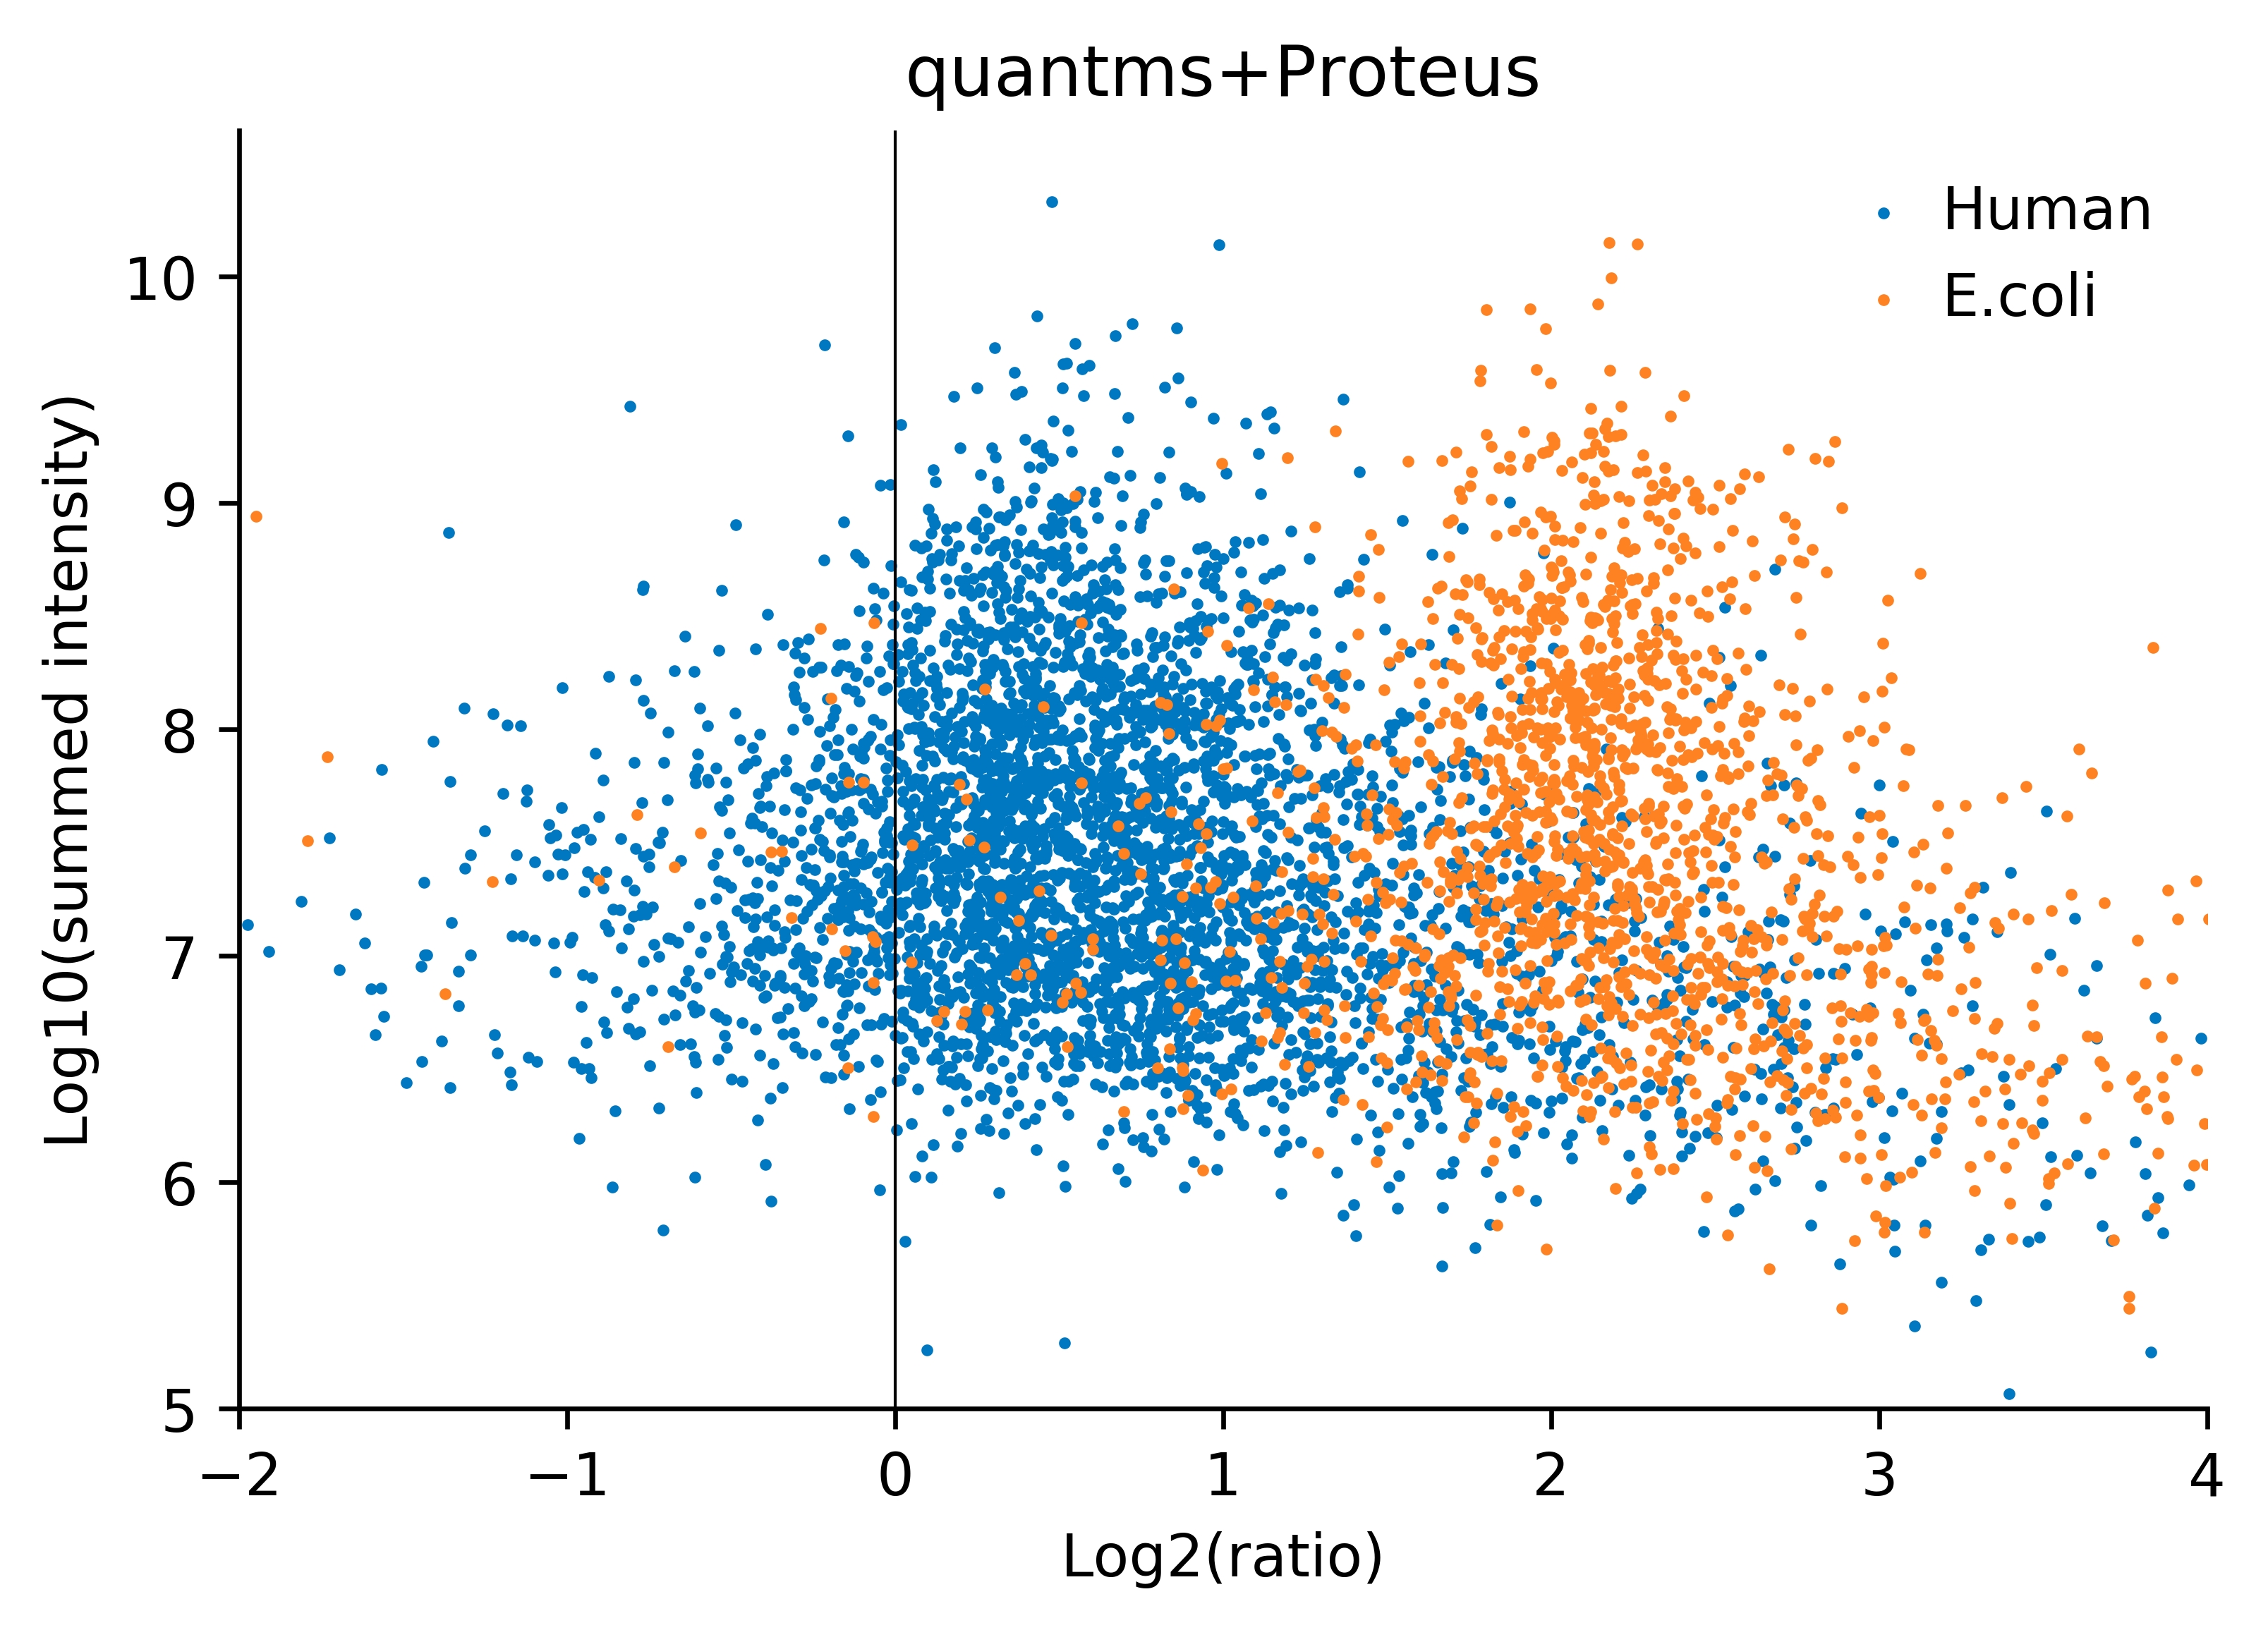

In [243]:
fig, ax = plt.subplots()

line1 = ax.scatter(proteus_quantmsmbr_pic[proteus_quantmsmbr_pic['Species'] == "Human"]["Log2(ratio)"], y=proteus_quantmsmbr_pic[proteus_quantmsmbr_pic['Species'] == "Human"]['Log10(summed intensity)'], c="#0078C1", s=1)

line2 = ax.scatter(proteus_quantmsmbr_pic[proteus_quantmsmbr_pic['Species'] == "E.coli"]["Log2(ratio)"], y=proteus_quantmsmbr_pic[proteus_quantmsmbr_pic['Species'] == "E.coli"]['Log10(summed intensity)'], c="#FE8122", s=1)

ax.axvline(x=0, c="black", linewidth=0.5, )
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend(handles=[line1, line2], labels=['Human', 'E.coli'], loc="best", frameon=False, handletextpad=0)

plt.title("quantms+Proteus")
plt.xlim(-2,4)
plt.ylim(5)
plt.xlabel("Log2(ratio)")
plt.ylabel("Log10(summed intensity)")
plt.show()

0.7244343447446794
1.0291850181432185
2.2088694461587477
0.742066414207848


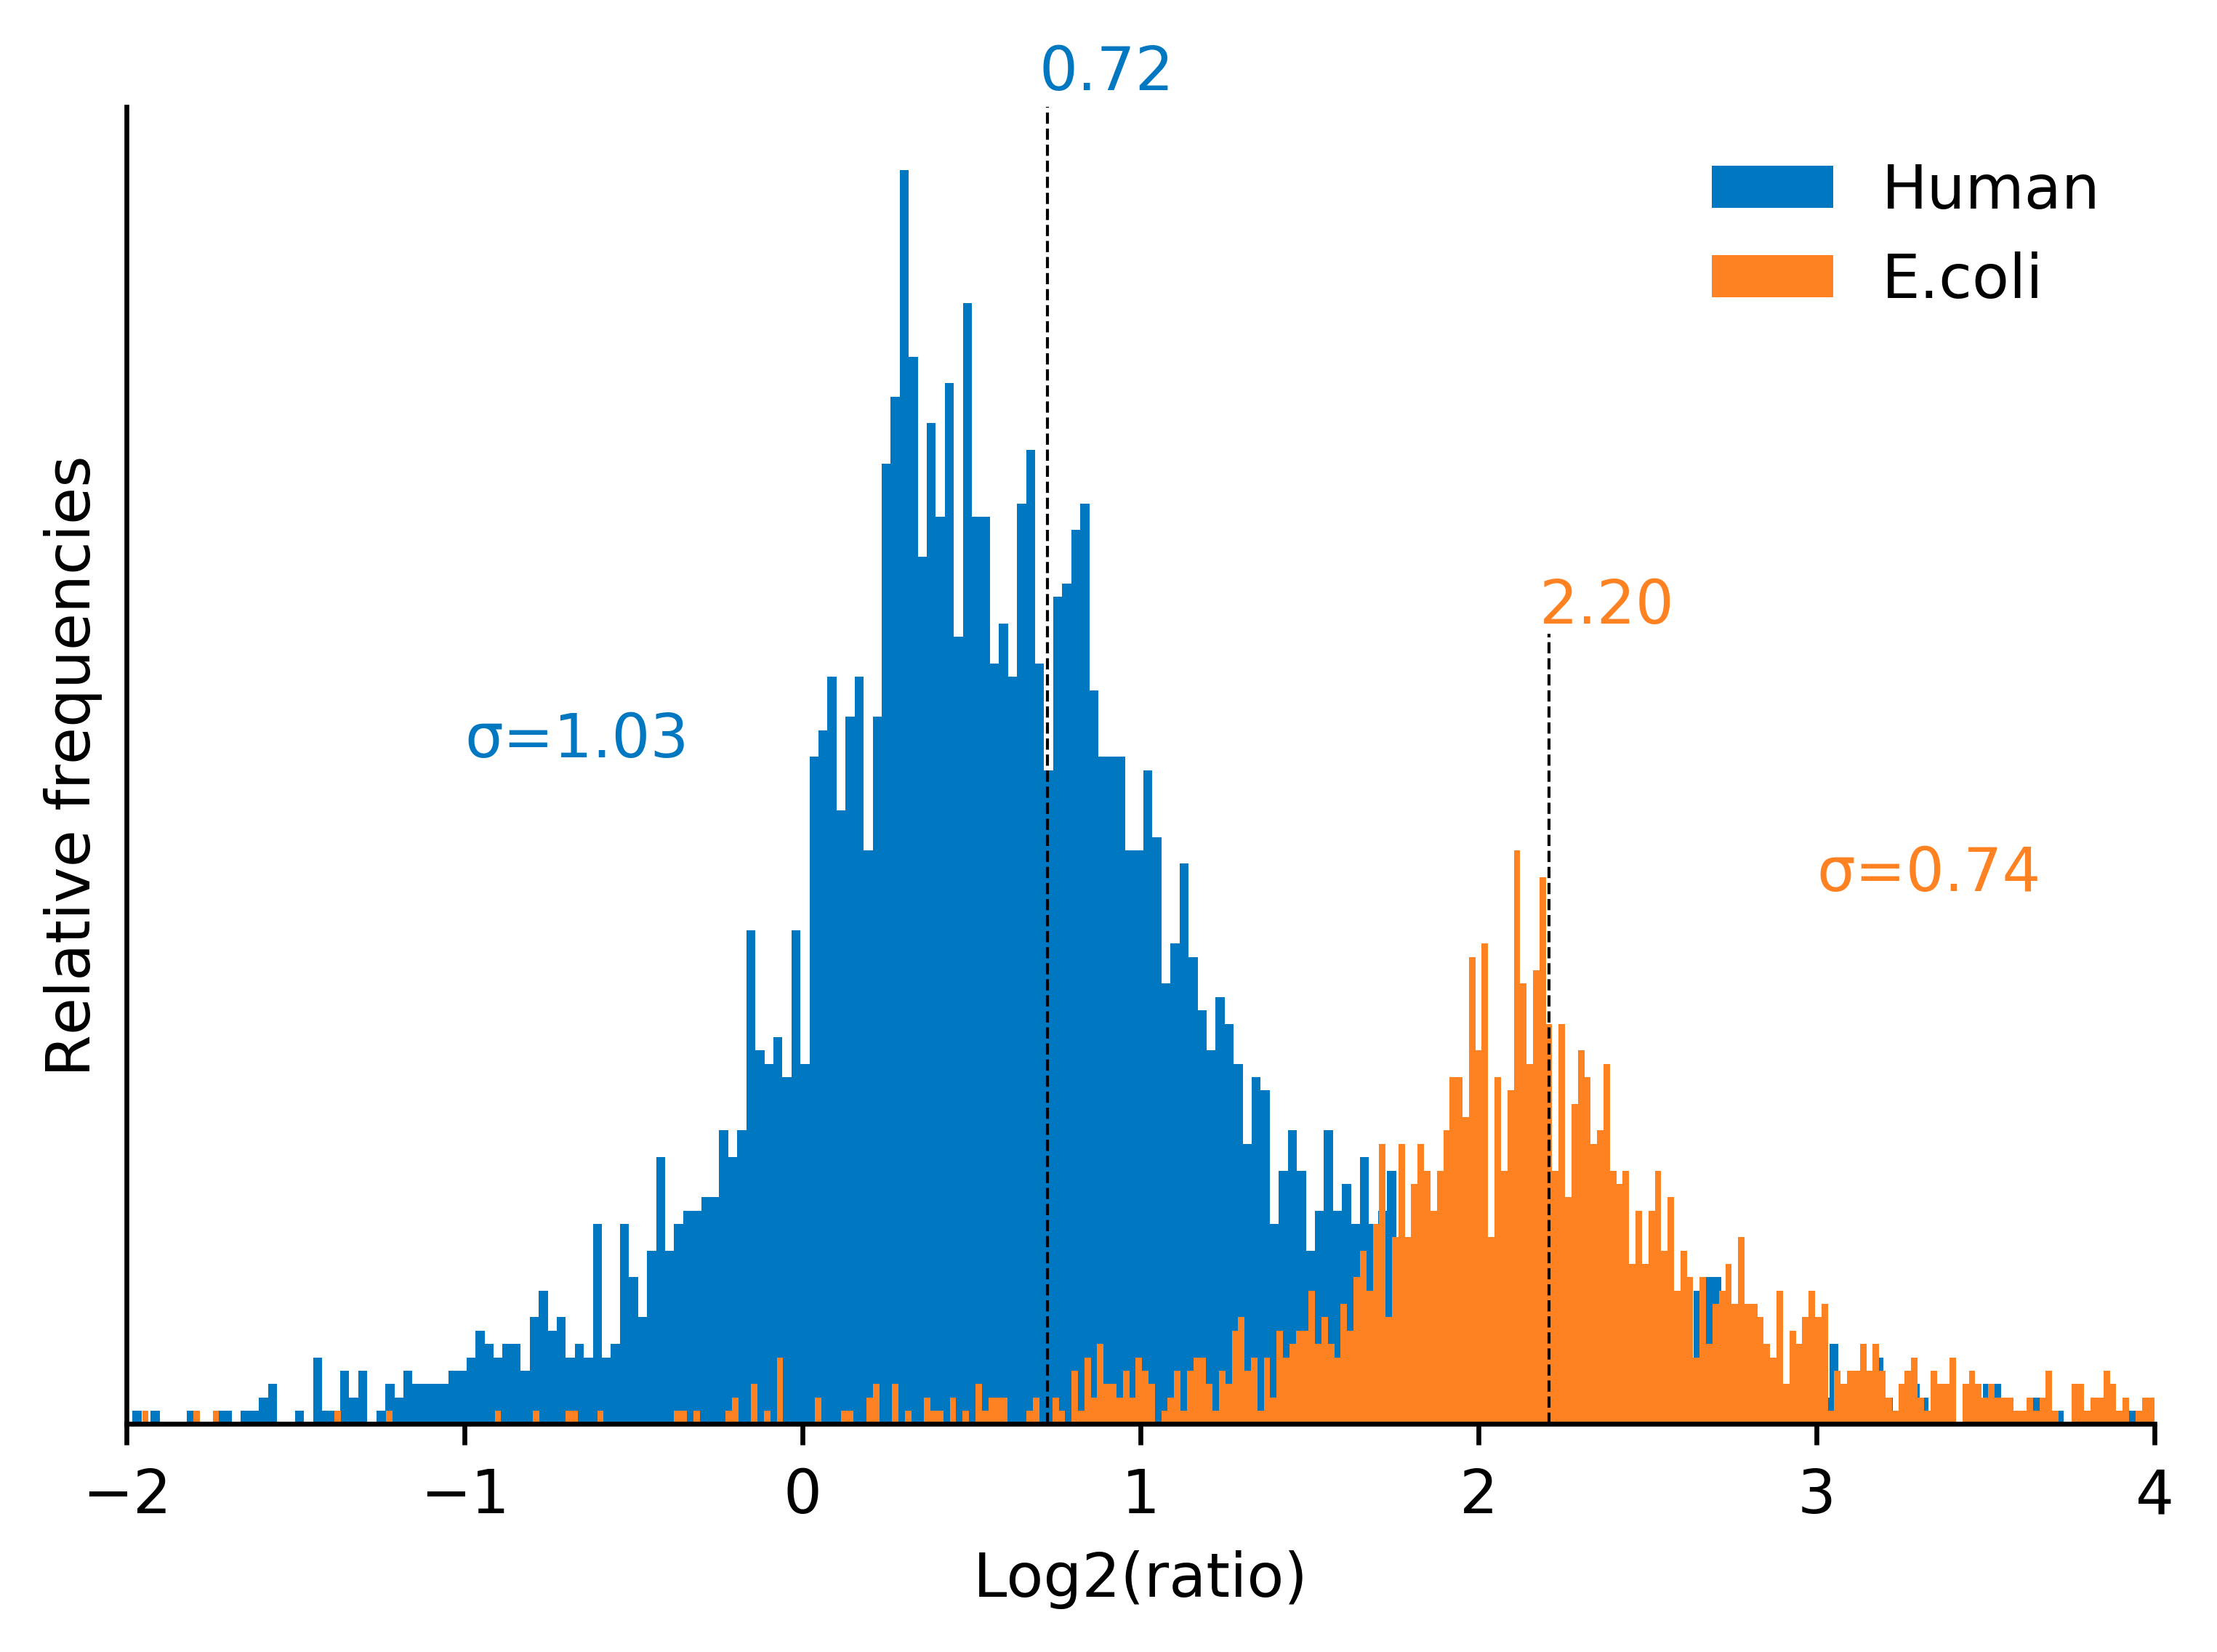

In [253]:
fig, ax = plt.subplots()

ax.hist(proteus_quantmsmbr_pic[proteus_quantmsmbr_pic['Species'] == "Human"]["Log2(ratio)"], bins=600, color="#0078C1")
u2 = np.mean(proteus_quantmsmbr_pic[proteus_quantmsmbr_pic['Species'] == "Human"]["Log2(ratio)"])
var2 = np.var(proteus_quantmsmbr_pic[proteus_quantmsmbr_pic['Species'] == "Human"]["Log2(ratio)"])
print(u2)
print(var2)

ax.hist(proteus_quantmsmbr_pic[proteus_quantmsmbr_pic['Species'] == "E.coli"]["Log2(ratio)"], bins=600, color="#FE8122")
u1 = np.mean(proteus_quantmsmbr_pic[proteus_quantmsmbr_pic['Species'] == "E.coli"]["Log2(ratio)"])
var1 = np.var(proteus_quantmsmbr_pic[proteus_quantmsmbr_pic['Species'] == "E.coli"]["Log2(ratio)"])
print(u1)
print(var1)

ax.legend(labels=['Human', 'E.coli'], loc="best", frameon=False)

ax.axvline(x=2.2088694461587477, ymax=0.6, c="black", linewidth=0.5, ls="--")
ax.axvline(x=0.7244343447446794, c="black", linewidth=0.5, ls="--")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.text(0.70,100,"0.72", color="#0078C1")
plt.text(2.18,60,"2.20", color="#FE8122")

plt.text(-1,50,"σ=1.03", color="#0078C1")
plt.text(3,40,"σ=0.74", color="#FE8122")
plt.yticks([])
plt.xlabel("Log2(ratio)")
plt.ylabel("Relative frequencies")
plt.xlim(-2,4)
plt.show()

### Running with quantms+proteus and normalization

In [250]:
proteusmed_quantms_prot = pd.read_csv("./UniprotSwiss-MBR/proteus_prodat_med.csv", header=0, sep=',')
proteusmed_quantms_prot = proteus_quantms_prot.dropna(axis=0, thresh=3)
proteusmed_quantmsmbr_pic = pd.DataFrame(None, columns=["ProteinName", "Log2(ratio)", "Log10(summed intensity)", "Species"])
for _, row in proteusmed_quantms_prot.iterrows():
    t10 = row[["L1", "L2", "L3"]]
    t30 = row[["H1", "H2", "H3"]]
    if np.median(t10, axis=0)== 0.0 or np.median(t30, axis=0) == 0.0:
        continue
    Log10summed_intensity = np.log10(np.mean(t10, axis=0))
    log2ratio = np.log2(np.mean(t30, axis=0) / np.mean(t10, axis=0))
    if "ECOLI" not in row['ProteinName']:
        species = "Human"
    elif "Human" not in row['ProteinName']:
        species = "E.coli"
    else:
        continue
    proteusmed_quantmsmbr_pic = proteusmed_quantmsmbr_pic.append({"ProteinName":row['ProteinName'], "Log2(ratio)": log2ratio, "Log10(summed intensity)": Log10summed_intensity,
                                                   "Species": species}, ignore_index=True)

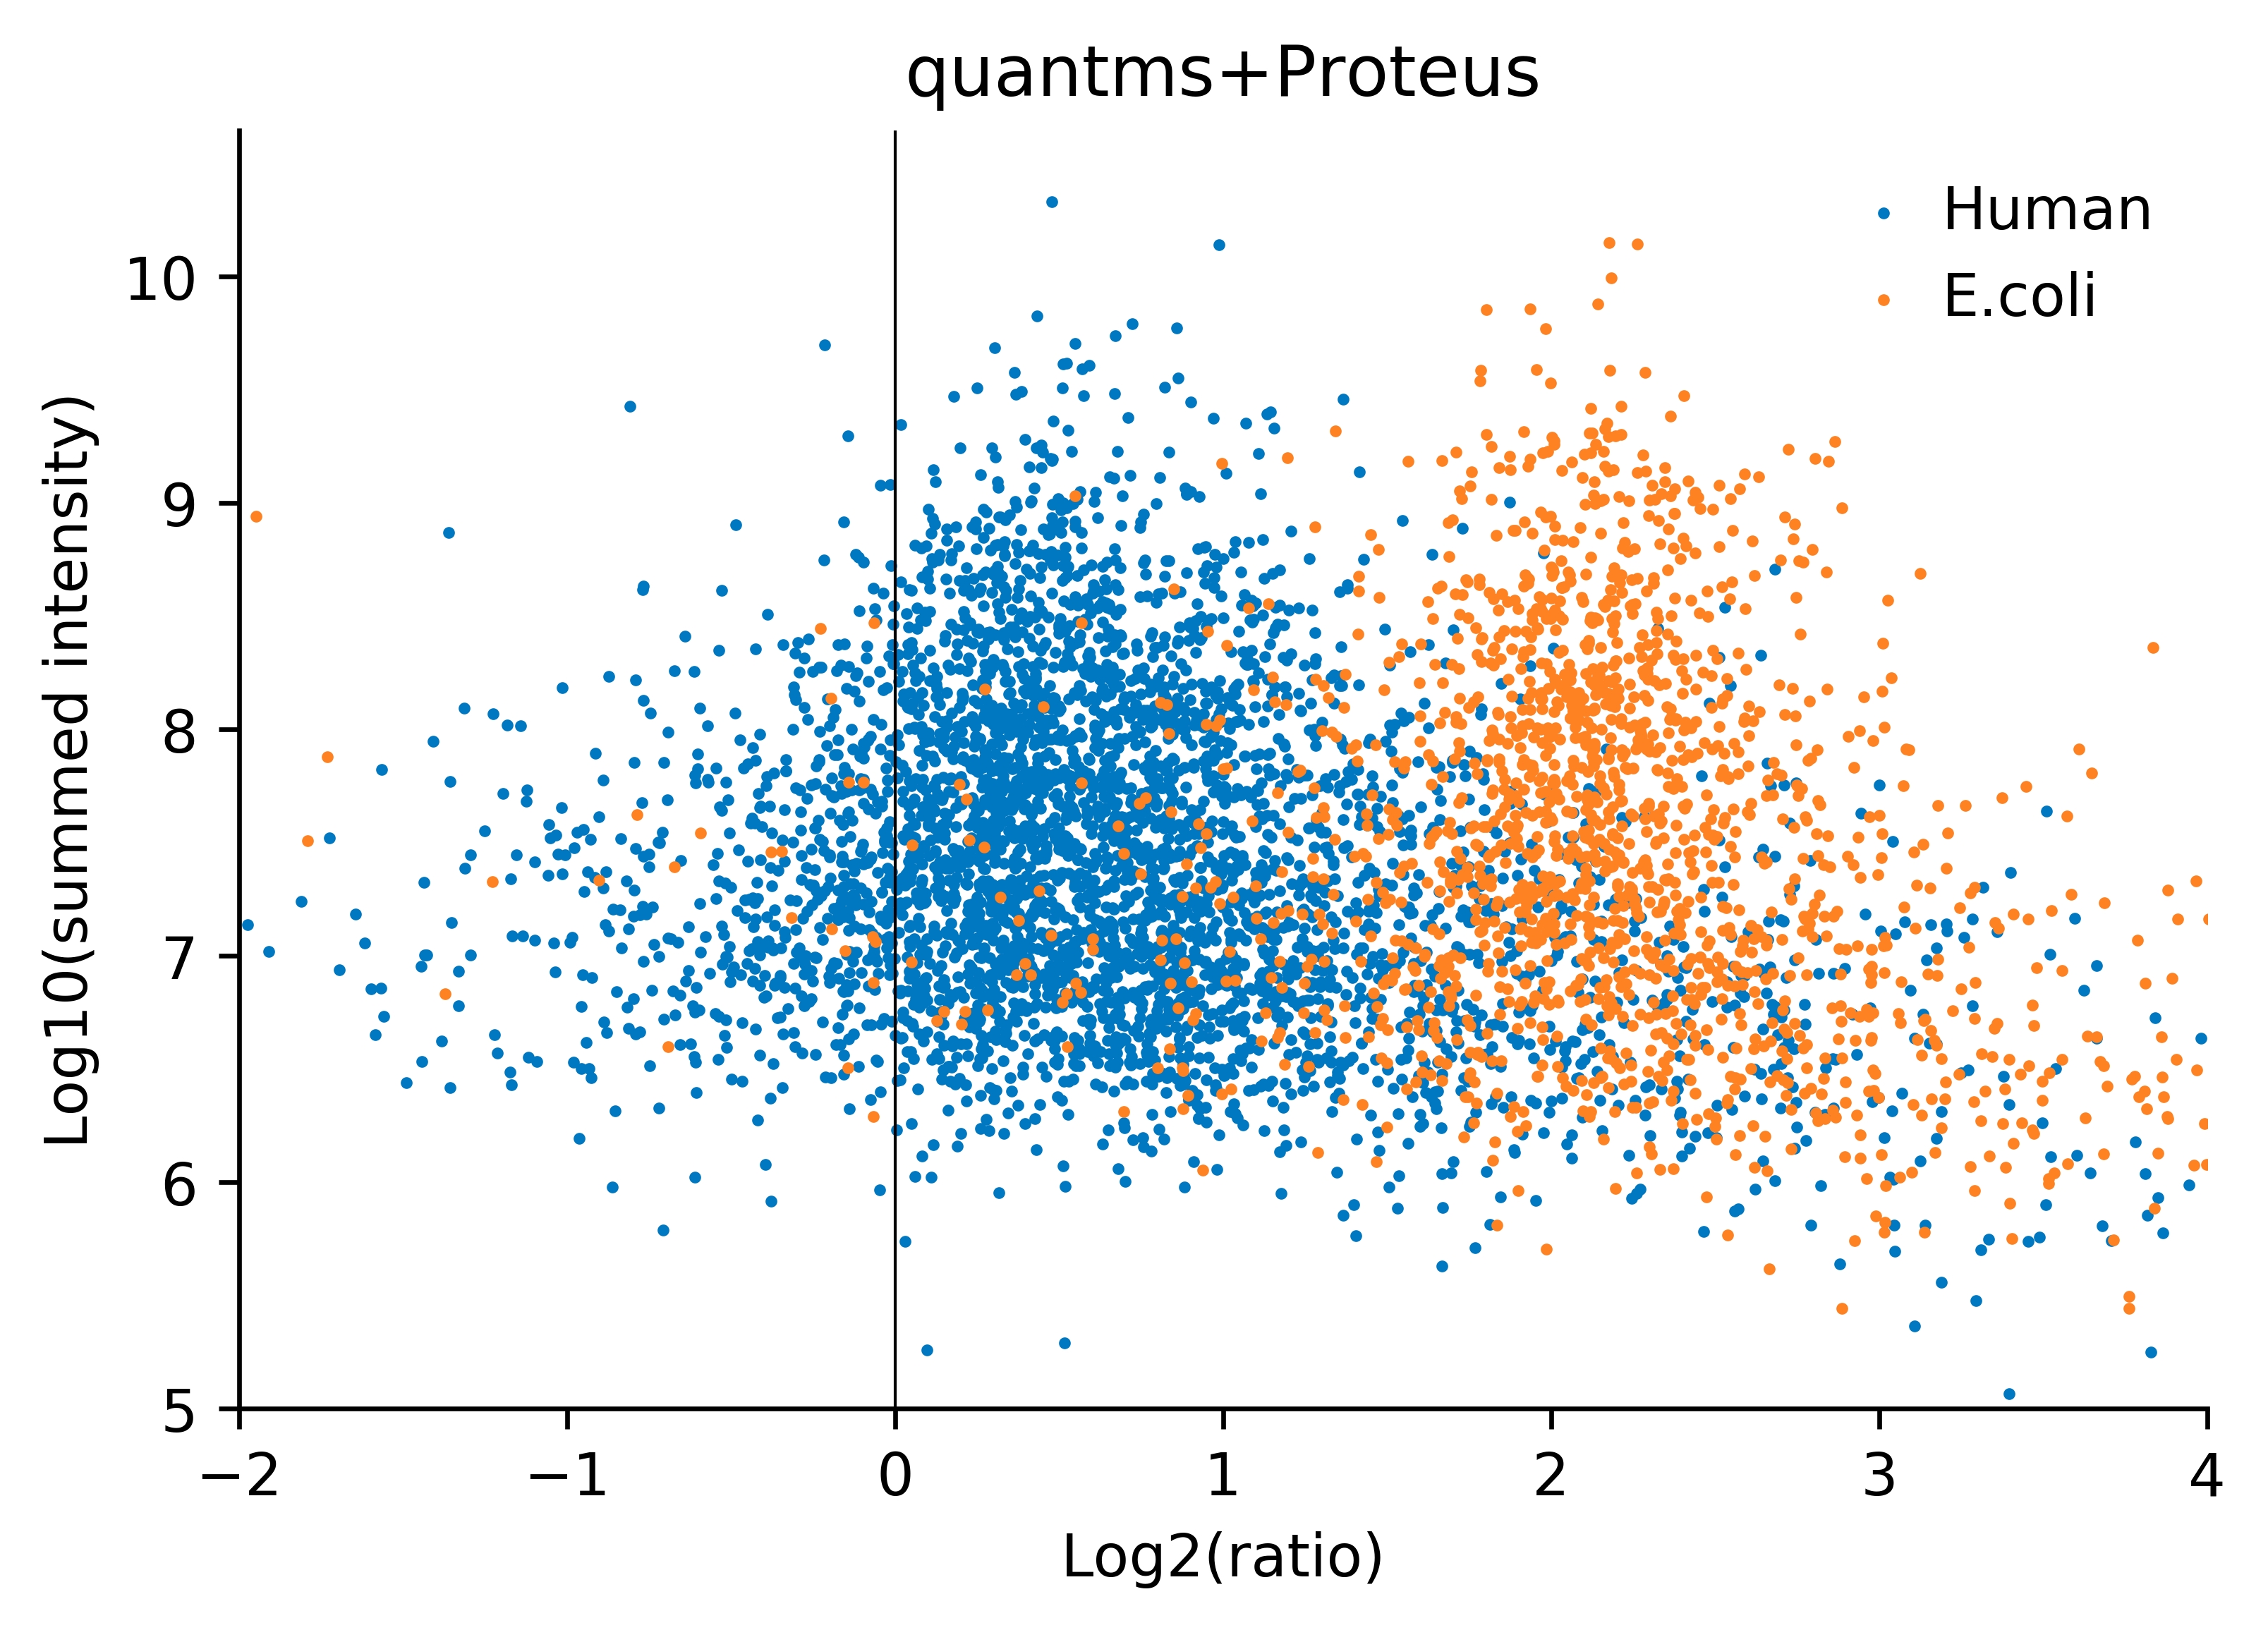

In [251]:
fig, ax = plt.subplots()

line1 = ax.scatter(proteusmed_quantmsmbr_pic[proteusmed_quantmsmbr_pic['Species'] == "Human"]["Log2(ratio)"], y=proteusmed_quantmsmbr_pic[proteusmed_quantmsmbr_pic['Species'] == "Human"]['Log10(summed intensity)'], c="#0078C1", s=1)

line2 = ax.scatter(proteusmed_quantmsmbr_pic[proteusmed_quantmsmbr_pic['Species'] == "E.coli"]["Log2(ratio)"], y=proteusmed_quantmsmbr_pic[proteusmed_quantmsmbr_pic['Species'] == "E.coli"]['Log10(summed intensity)'], c="#FE8122", s=1)

ax.axvline(x=0, c="black", linewidth=0.5, )
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend(handles=[line1, line2], labels=['Human', 'E.coli'], loc="best", frameon=False, handletextpad=0)

plt.title("quantms+Proteus")
plt.xlim(-2,4)
plt.ylim(5)
plt.xlabel("Log2(ratio)")
plt.ylabel("Log10(summed intensity)")
plt.show()

0.7244343447446794
1.0291850181432185
2.2088694461587477
0.742066414207848


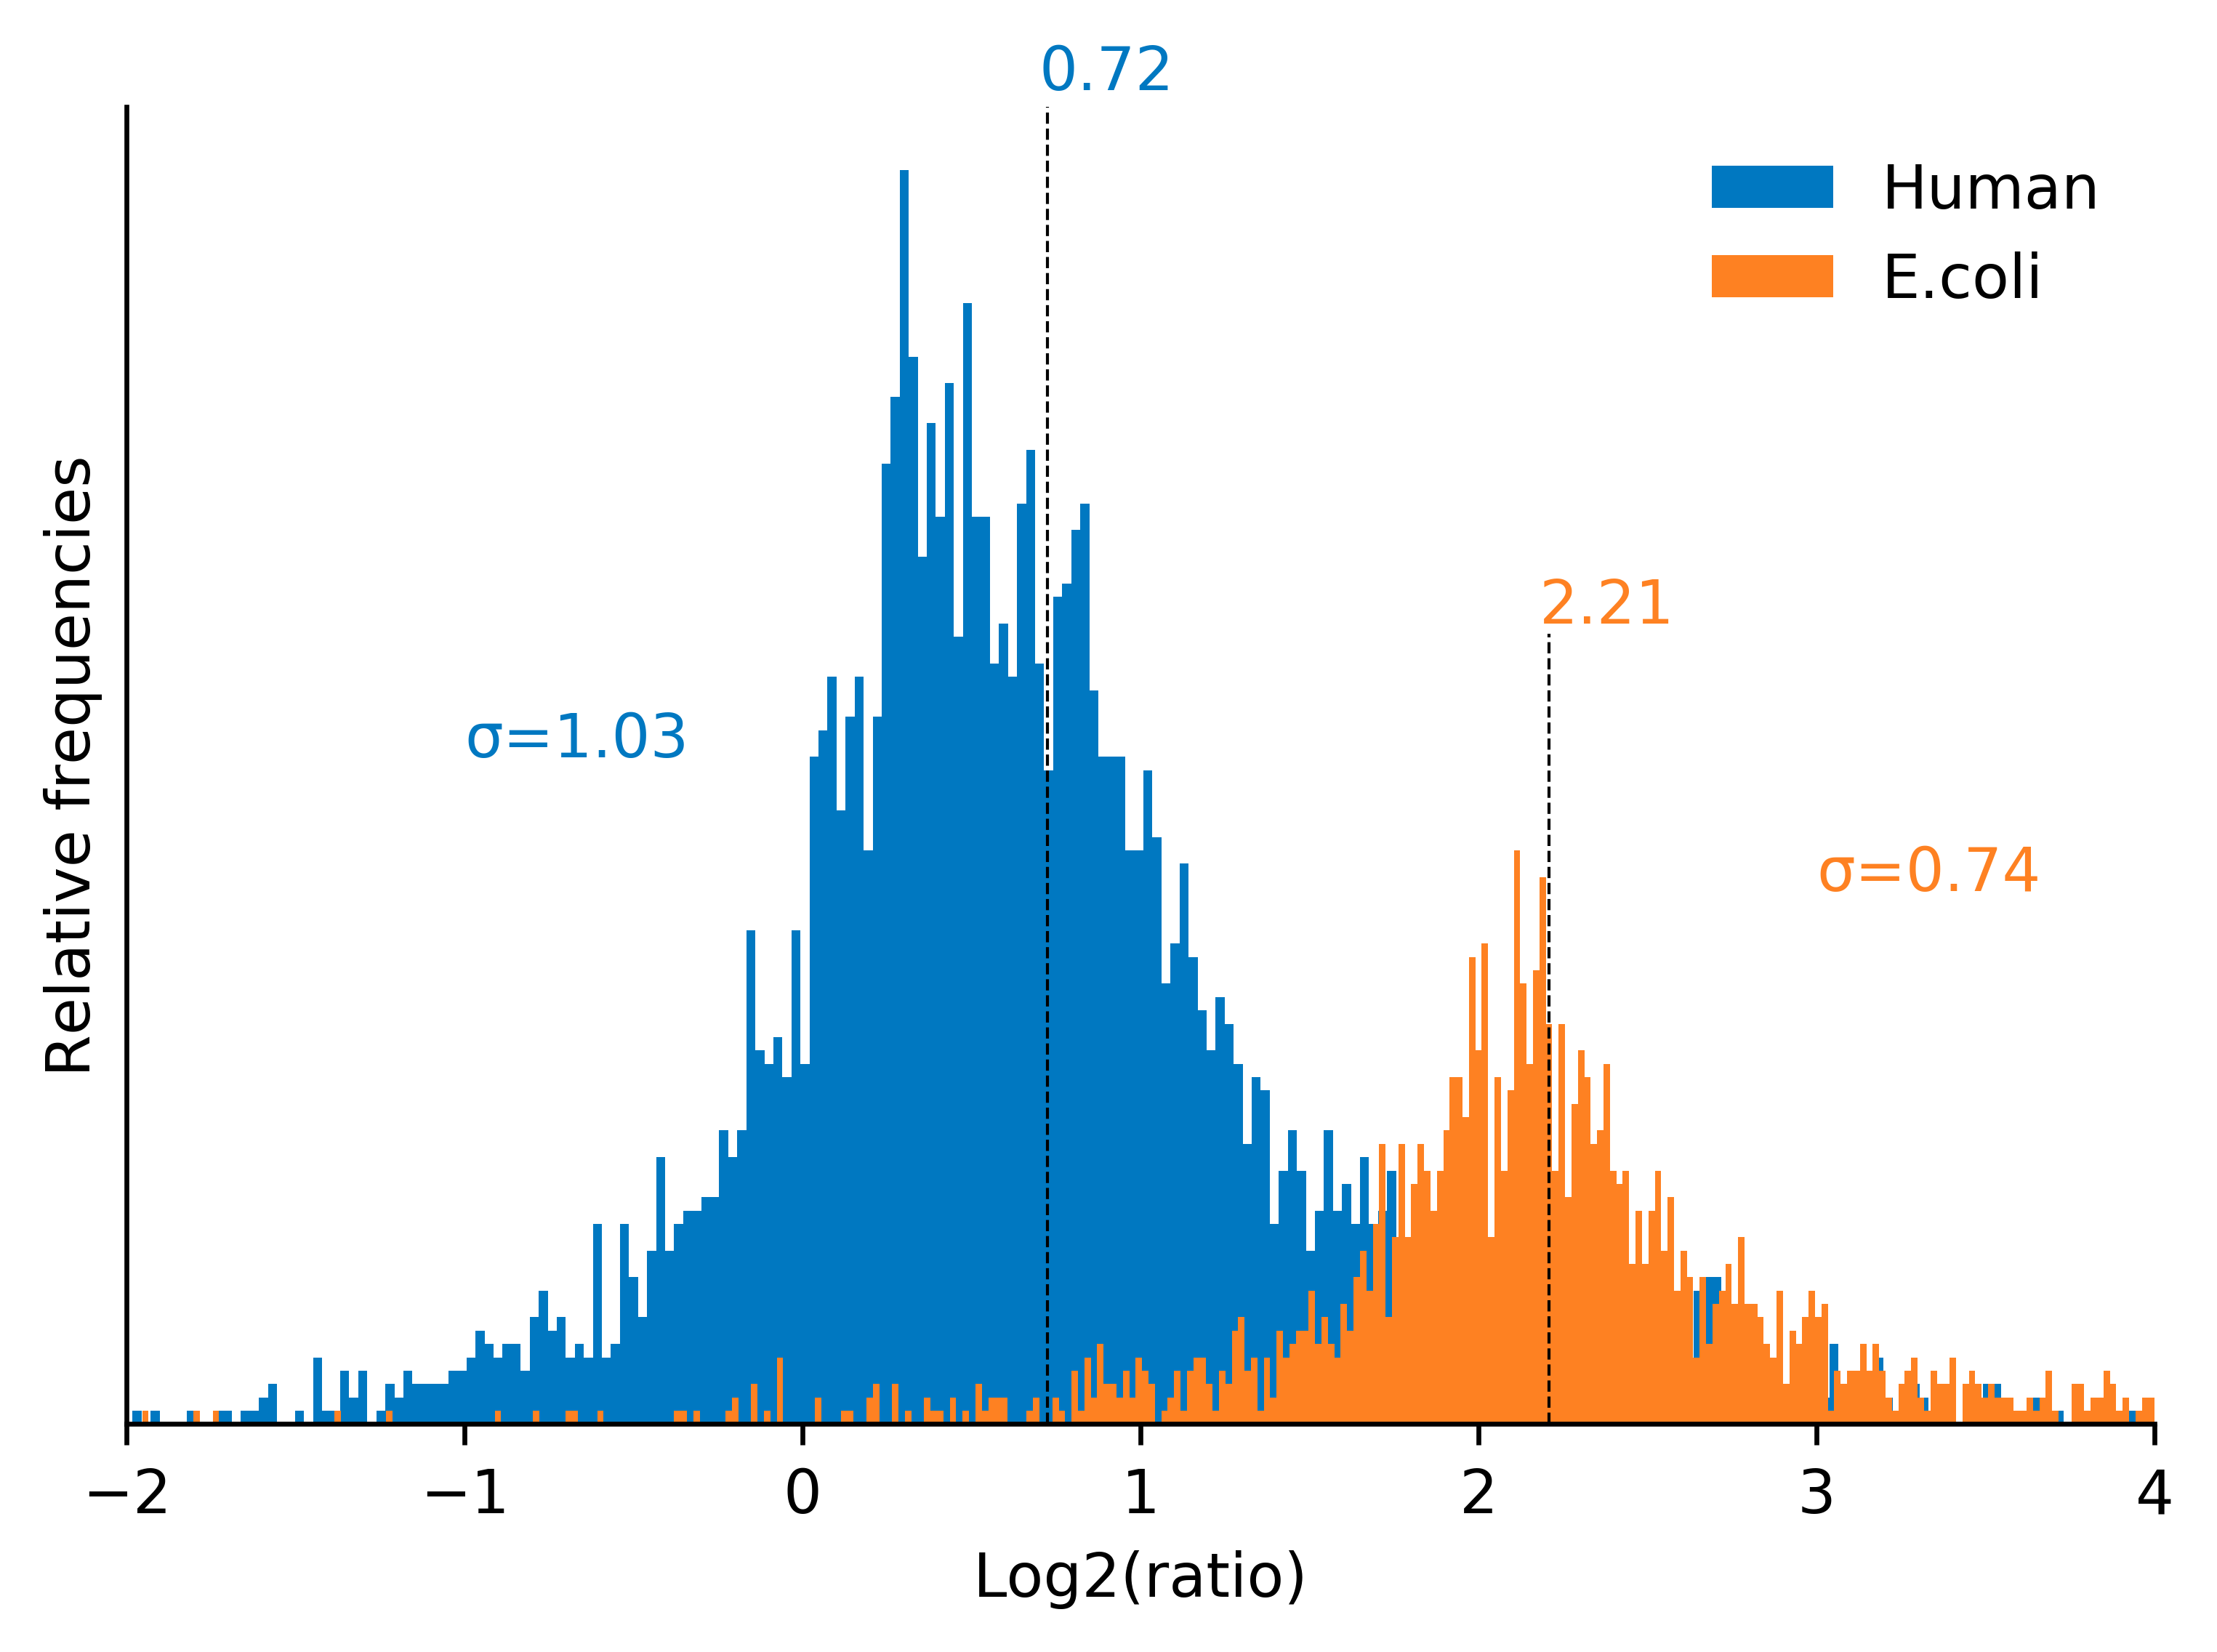

In [252]:
fig, ax = plt.subplots()

ax.hist(proteusmed_quantmsmbr_pic[proteusmed_quantmsmbr_pic['Species'] == "Human"]["Log2(ratio)"], bins=600, color="#0078C1")
u2 = np.mean(proteusmed_quantmsmbr_pic[proteusmed_quantmsmbr_pic['Species'] == "Human"]["Log2(ratio)"])
var2 = np.var(proteusmed_quantmsmbr_pic[proteusmed_quantmsmbr_pic['Species'] == "Human"]["Log2(ratio)"])
print(u2)
print(var2)

ax.hist(proteusmed_quantmsmbr_pic[proteusmed_quantmsmbr_pic['Species'] == "E.coli"]["Log2(ratio)"], bins=600, color="#FE8122")
u1 = np.mean(proteusmed_quantmsmbr_pic[proteusmed_quantmsmbr_pic['Species'] == "E.coli"]["Log2(ratio)"])
var1 = np.var(proteusmed_quantmsmbr_pic[proteusmed_quantmsmbr_pic['Species'] == "E.coli"]["Log2(ratio)"])
print(u1)
print(var1)

ax.legend(labels=['Human', 'E.coli'], loc="best", frameon=False)

ax.axvline(x=2.2088694461587477, ymax=0.6, c="black", linewidth=0.5, ls="--")
ax.axvline(x=0.7244343447446794, c="black", linewidth=0.5, ls="--")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.text(0.70,100,"0.72", color="#0078C1")
plt.text(2.18,60,"2.21", color="#FE8122")

plt.text(-1,50,"σ=1.03", color="#0078C1")
plt.text(3,40,"σ=0.74", color="#FE8122")
plt.yticks([])
plt.xlabel("Log2(ratio)")
plt.ylabel("Relative frequencies")
plt.xlim(-2,4)
plt.show()

In [254]:
proteusmed_quantmsmbr_pic

                                          ProteinName  Log2(ratio)  \
0     sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN     0.203227   
1                               sp|A0AV96|RBM47_HUMAN     1.352078   
2                                sp|A0AVT1|UBA6_HUMAN     0.388429   
3                               sp|A0FGR8|ESYT2_HUMAN     0.866102   
4                               sp|A0JLT2|MED19_HUMAN     0.090511   
...                                               ...          ...   
5864                             sp|Q9Y6W3|CAN7_HUMAN     0.233359   
5865                             sp|Q9Y6X3|SCC4_HUMAN     3.317001   
5866                            sp|Q9Y6X9|MORC2_HUMAN     0.452194   
5867                            sp|Q9Y6Y0|NS1BP_HUMAN     0.426732   
5868                            sp|Q9Y6Y8|S23IP_HUMAN     2.556260   

      Log10(summed intensity) Species  
0                    7.670492   Human  
1                    7.724396   Human  
2                    7.516338   Human  

### Running with quantms+MSstats

In [257]:
quantms = pd.read_csv("./UniprotSwiss-MBR/out_msstats.csv", sep=',', header=0)
quantms = quantms[-(quantms['ProteinName'].str.contains("DECOY_") | (quantms['ProteinName'].str.contains("CONTAMINANT")))]
quantms['TechReplicate'] = quantms['Reference'].str[-6]
quantms.to_csv("./UniprotSwiss-MBR/out_msstats_tech.csv", sep=",", index=False)

In [261]:
%%R -w 800 -h 600

library('MSstats', warn.conflicts = F, quietly = T, verbose = F)
protein_expression = './UniprotSwiss-MBR/protein_expression.csv'

raw.om <- read.csv('./UniprotSwiss-MBR/out_msstats_tech.csv', header = TRUE, sep = ',')
raw.om <- raw.om[!grepl("DECOY", raw.om$ProteinName),]

quantms.proposed <- MSstats::dataProcess(raw = raw.om,
                                           logTrans=10,
                                           normalization = 'equalizeMedians',
                                           summaryMethod = 'linear',
                                           censoredInt = "NA",
                                           MBimpute = TRUE)


head(quantms.proposed$ProteinLevelData)
Protein.Expression <- quantms.proposed$ProteinLevelData
head(Protein.Expression)
write.csv(Protein.Expression, file=protein_expression, row.names=FALSE)

INFO  [2022-01-16 21:34:37] ** Multiple fractionations exist: 24 fractionations per MS replicate.
INFO  [2022-01-16 21:37:00] ** Features with one or two measurements across runs are removed.
INFO  [2022-01-16 21:37:00] ** Fractionation handled.
INFO  [2022-01-16 21:37:01] ** Updated quantification data to make balanced design. Missing values are marked by NA


R[write to console]: Aggregate function missing, defaulting to 'length'



INFO  [2022-01-16 21:37:04] ** Use all features that the dataset originally has.
INFO  [2022-01-16 21:37:06] 
 # proteins: 6662
 # peptides per protein: 1-271
 # features per peptide: 1-1
INFO  [2022-01-16 21:37:06] Some proteins have only one feature: 
 sp|Q9NR48|ASH1L_HUMAN,
 sp|P13637|AT1A3_HUMAN,
 sp|Q4LEZ3|AARD_HUMAN,
 sp|Q9H082|RB33B_HUMAN,
 sp|O75830|SPI2_HUMAN ...
INFO  [2022-01-16 21:37:06] 
                    10 ug 30 ug
             # runs     1     1
    # bioreplicates     1     1
 # tech. replicates     0     0
INFO  [2022-01-16 21:37:06] Some features are completely missing in at least one condition:  
 GLNVMQNLLTAHPDVQAVFAQNDEM(Oxidation)ALGALR_4_NA_0,
 HDIAFVEFDNEVQAGAAR_2_NA_0,
 AMLQDIATLTGGTVISEEIGM(Oxidation)ELEK_2_NA_0,
 GINESDMVLMPDASTAVIDPFFADSTLIIR_3_NA_0,
 TC(Carbamidomethyl)GVLSEDDTFGTITIAEPIGIIC(Carbamidomethyl)GIVPTTNPTSTAIFK_3_NA_0 ...
INFO  [2022-01-16 21:37:06]  == Start the summarization per subplot...
  |==                                              

In [278]:
quantms_msstats = pd.read_csv("./UniprotSwiss-MBR/protein_expression.csv", sep=',', index_col=None)
quantms_msstats_pic = pd.DataFrame(None, columns=["ProteinName", "Log2(ratio)", "Log10(summed intensity)", "Species"])
for prot, group in quantms_msstats.groupby("Protein"):
    if len(group["Protein"]) == 2:
        t10 = group[group['GROUP'] == "10 ug"]['LogIntensities'].values[0]
        t30 = group[group['GROUP'] == "30 ug"]['LogIntensities'].values[0]

        if "ECOLI" not in prot:
            species = "Human"
        elif "Human" not in prot:
            species = "E.coli"
        else:
            continue
        log2ratio = np.log2(10**t30 / 10**t10)
        quantms_msstats_pic = quantms_msstats_pic.append({"ProteinName":prot, "Log2(ratio)": log2ratio, "Log10(summed intensity)": t10,
                                                           "Species": species}, ignore_index=True)

In [279]:
quantms_msstats_pic

                                          ProteinName  Log2(ratio)  \
0     sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN    -1.479114   
1                               sp|A0AV96|RBM47_HUMAN    -0.454854   
2                                sp|A0AVT1|UBA6_HUMAN    -0.712615   
3                               sp|A0FGR8|ESYT2_HUMAN    -0.405045   
4                               sp|A0JLT2|MED19_HUMAN     0.014640   
...                                               ...          ...   
6648                             sp|Q9Y6W3|CAN7_HUMAN    -0.904333   
6649                             sp|Q9Y6X3|SCC4_HUMAN     0.451294   
6650                            sp|Q9Y6X9|MORC2_HUMAN    -0.002661   
6651                            sp|Q9Y6Y0|NS1BP_HUMAN    -1.090718   
6652                            sp|Q9Y6Y8|S23IP_HUMAN     2.424245   

      Log10(summed intensity) Species  
0                    7.160185   Human  
1                    6.874409   Human  
2                    6.667591   Human  

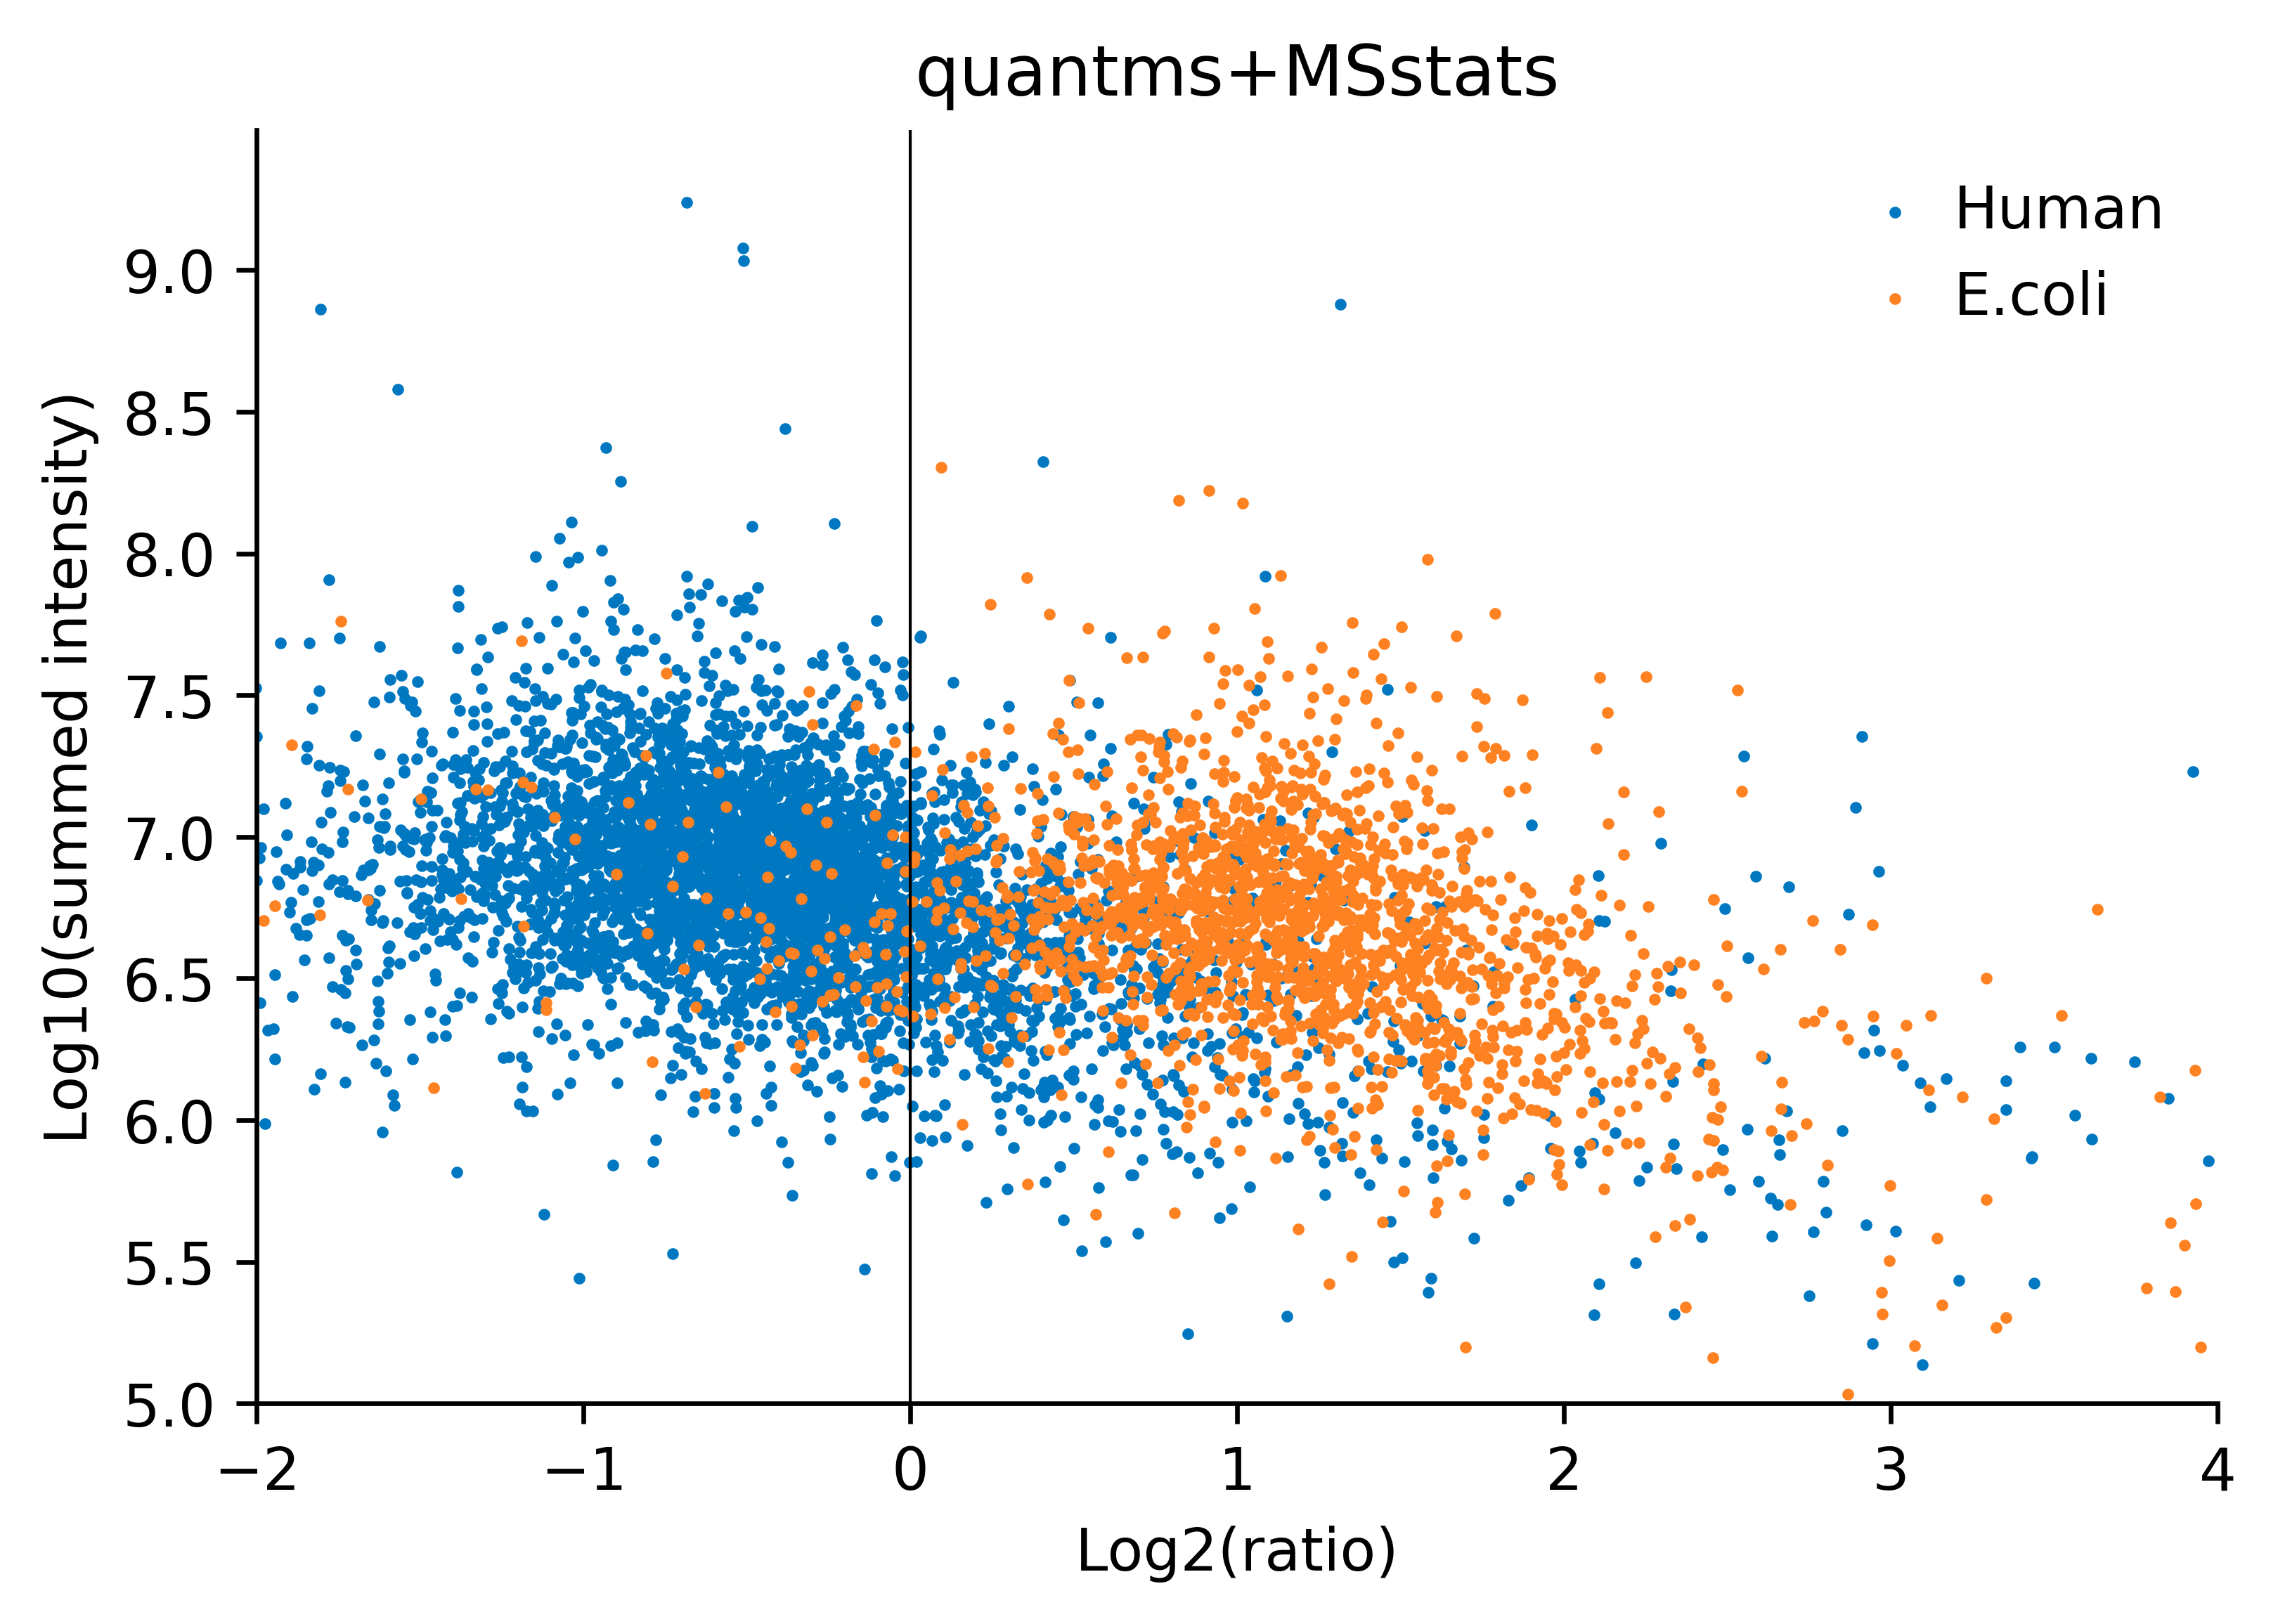

In [280]:
fig, ax = plt.subplots()

line1 = ax.scatter(quantms_msstats_pic[quantms_msstats_pic['Species'] == "Human"]["Log2(ratio)"], y=quantms_msstats_pic[quantms_msstats_pic['Species'] == "Human"]['Log10(summed intensity)'], c="#0078C1", s=1)

line2 = ax.scatter(quantms_msstats_pic[quantms_msstats_pic['Species'] == "E.coli"]["Log2(ratio)"], y=quantms_msstats_pic[quantms_msstats_pic['Species'] == "E.coli"]['Log10(summed intensity)'], c="#FE8122", s=1)

ax.axvline(x=0, c="black", linewidth=0.5, )
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend(handles=[line1, line2], labels=['Human', 'E.coli'], loc="best", frameon=False, handletextpad=0)

plt.title("quantms+MSstats")
plt.xlim(-2,4)
plt.ylim(5)
plt.xlabel("Log2(ratio)")
plt.ylabel("Log10(summed intensity)")
plt.show()

-0.4086482182668257
0.8195998731806482
1.1333100807277576
0.6282617902016582


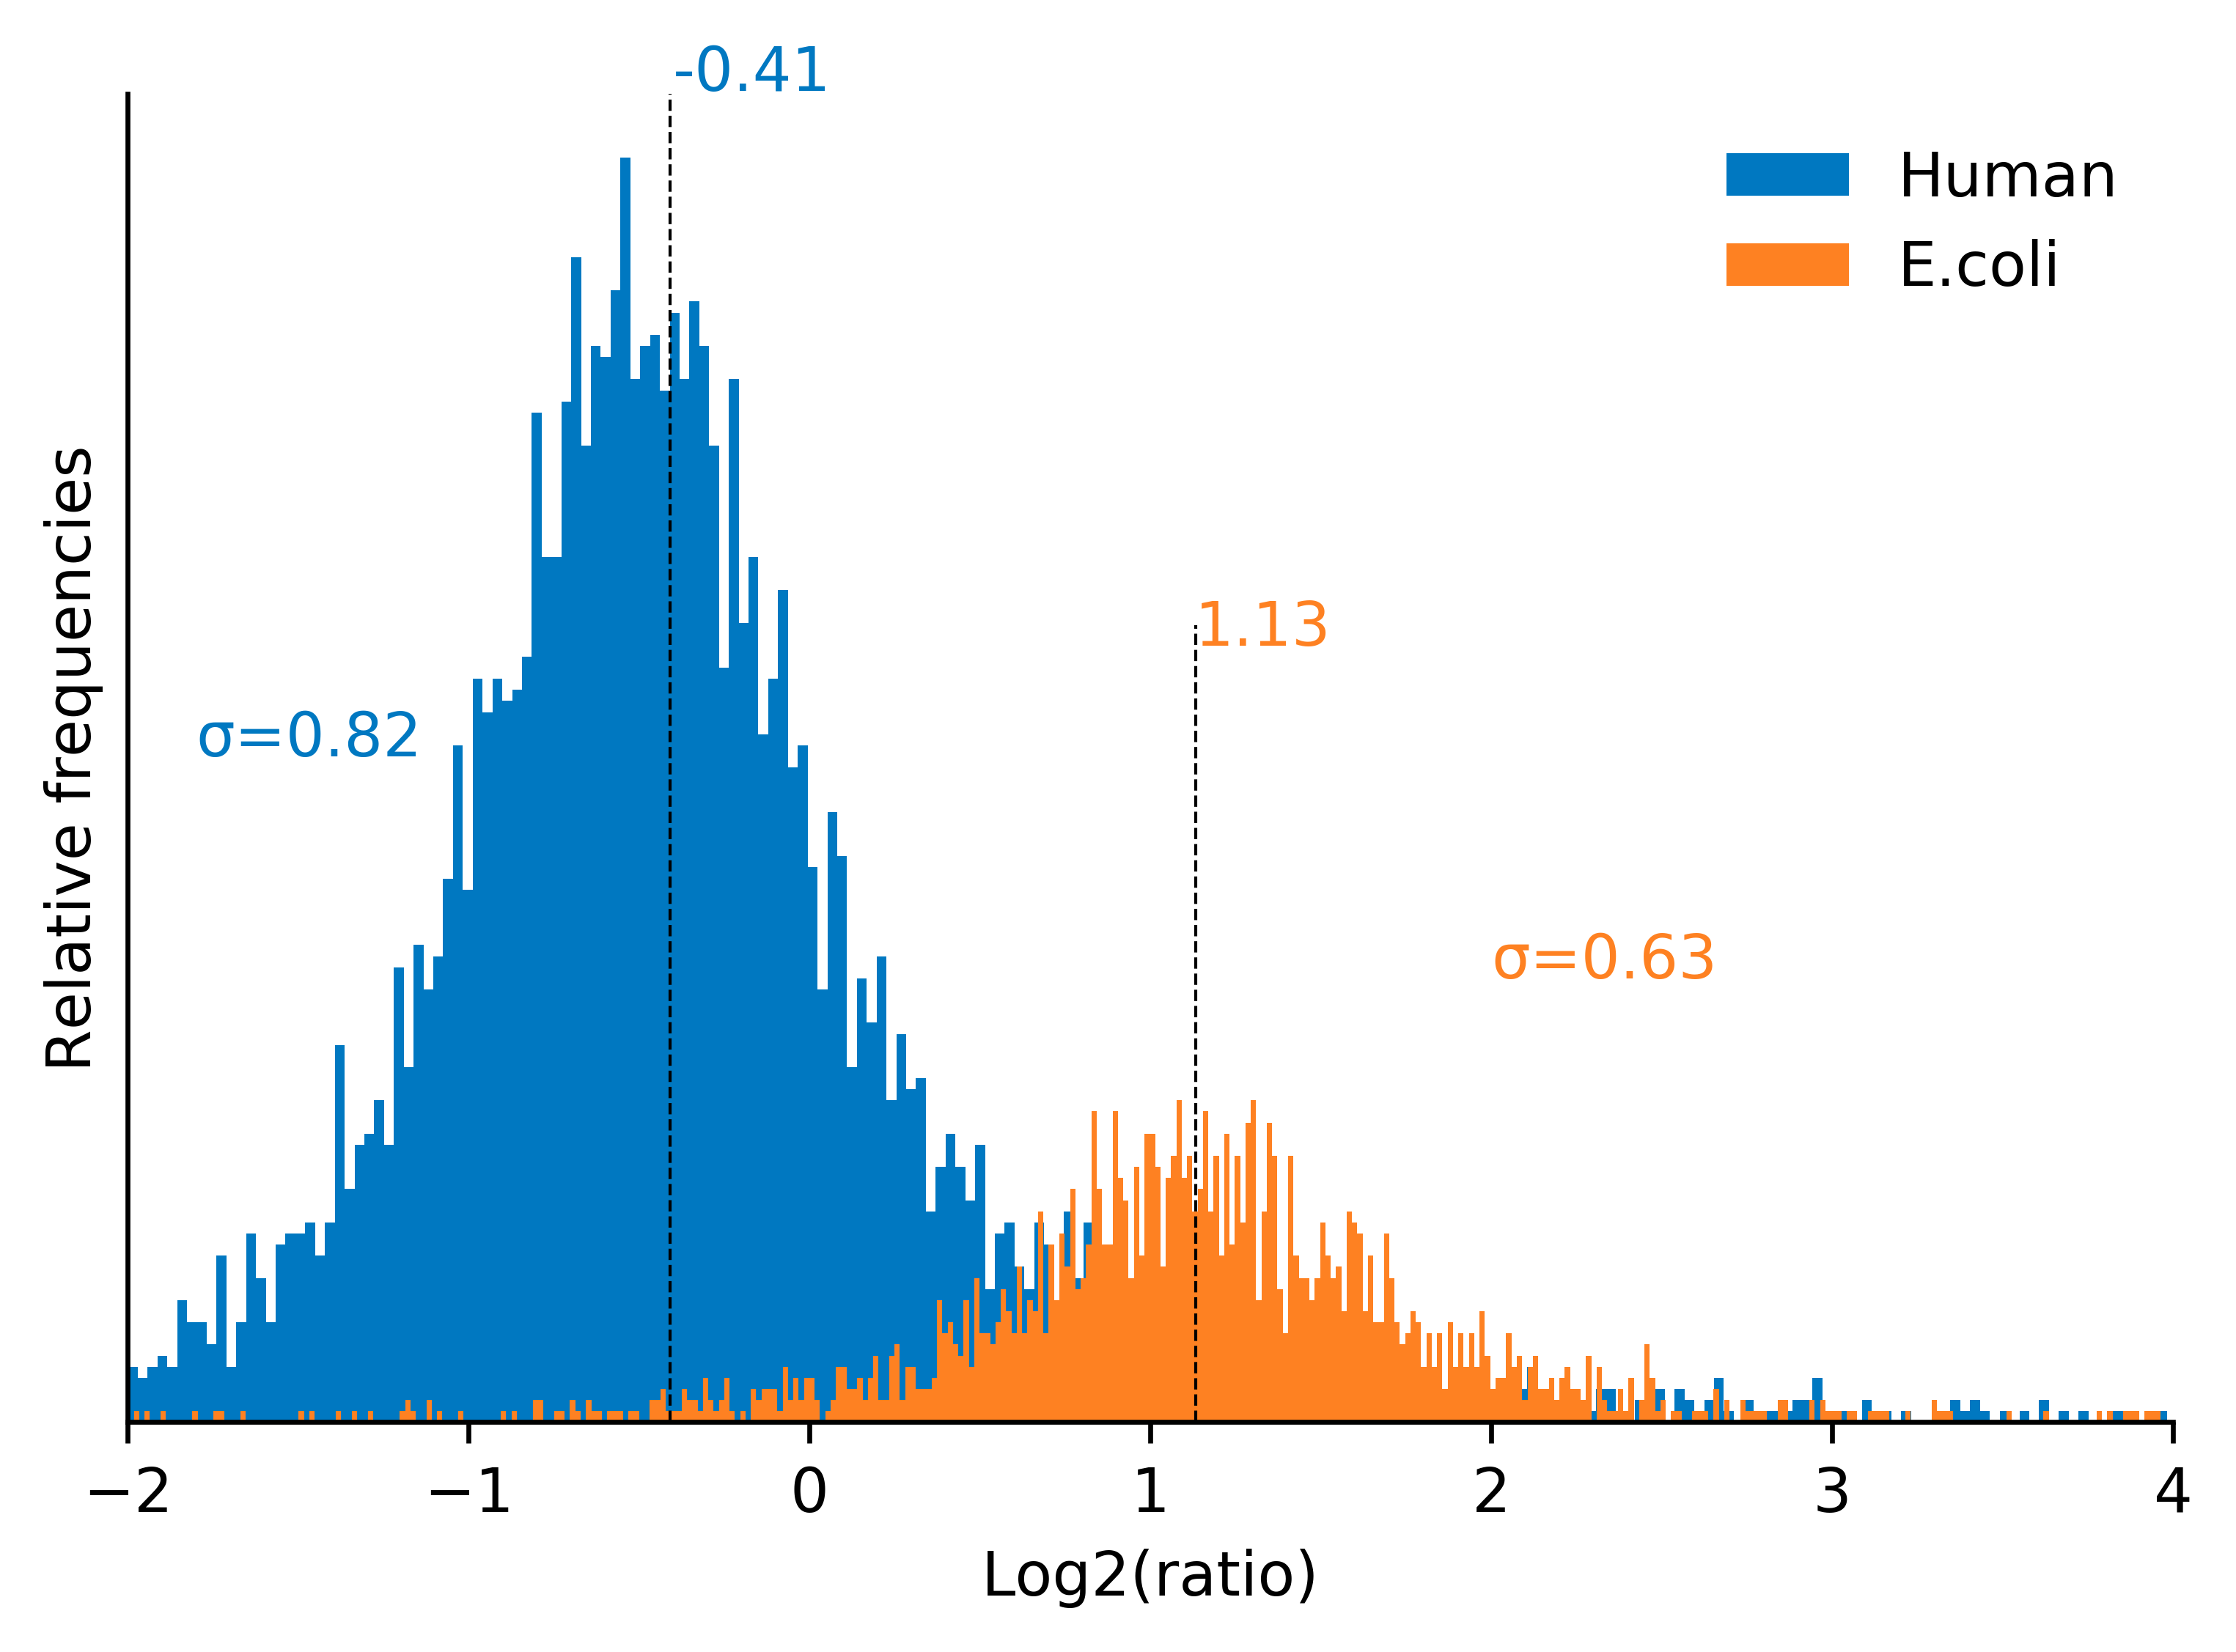

In [285]:
fig, ax = plt.subplots()

ax.hist(quantms_msstats_pic[quantms_msstats_pic['Species'] == "Human"]["Log2(ratio)"], bins=600, color="#0078C1")
u2 = np.mean(quantms_msstats_pic[quantms_msstats_pic['Species'] == "Human"]["Log2(ratio)"])
var2 = np.var(quantms_msstats_pic[quantms_msstats_pic['Species'] == "Human"]["Log2(ratio)"])
print(u2)
print(var2)

ax.hist(quantms_msstats_pic[quantms_msstats_pic['Species'] == "E.coli"]["Log2(ratio)"], bins=600, color="#FE8122")
u1 = np.mean(quantms_msstats_pic[quantms_msstats_pic['Species'] == "E.coli"]["Log2(ratio)"])
var1 = np.var(quantms_msstats_pic[quantms_msstats_pic['Species'] == "E.coli"]["Log2(ratio)"])
print(u1)
print(var1)

ax.legend(labels=['Human', 'E.coli'], loc="best", frameon=False)

ax.axvline(x=-0.4086482182668257, c="black", linewidth=0.5, ls="--")
ax.axvline(x=1.1333100807277576, c="black", linewidth=0.5, ls="--", ymax=0.6)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.text(-0.40,120,"-0.41", color="#0078C1")
plt.text(1.13,70,"1.13", color="#FE8122")

plt.text(-1.8,60,"σ=0.82", color="#0078C1")
plt.text(2,40,"σ=0.63", color="#FE8122")
plt.yticks([])
plt.xlabel("Log2(ratio)")
plt.ylabel("Relative frequencies")
plt.xlim(-2,4)
plt.show()

### Running with MaxQuant

In [168]:
MaxquantMBR_ECOLI_pic = pd.DataFrame(None, columns=["ProteinName", "Log2(ratio)", "Log10(summed intensity)", "Species"])
for prot, group in MaxquantMBR_cv.groupby("ProteinName"):
    if len(group["ProteinName"]) == 2:
        t10 = group[group['Condition'] == "10 ug"][["TechRep1", "TechRep2", "TechRep3"]]
        t30 = group[group['Condition'] == "30 ug"][["TechRep1", "TechRep2", "TechRep3"]]
        if np.median(t10, axis=1)[0] == 0.0 or np.median(t30, axis=1)[0] == 0.0:
            continue
        Log10summed_intensity = np.log10(np.mean(t10, axis=1).values[0])
        log2ratio = np.log2(np.mean(t30, axis=1).values[0] / np.mean(t10, axis=1).values[0])
        MaxquantMBR_ECOLI_pic = MaxquantMBR_ECOLI_pic.append({"ProteinName":prot, "Log2(ratio)": log2ratio, "Log10(summed intensity)": Log10summed_intensity,
                                                           "Species": "E.coli"}, ignore_index=True)

In [169]:
for prot, group in MaxquantMBRHuman_cv.groupby("ProteinName"):
    if len(group["ProteinName"]) == 2:
        t10 = group[group['Condition'] == "10 ug"][["TechRep1", "TechRep2", "TechRep3"]]
        t30 = group[group['Condition'] == "30 ug"][["TechRep1", "TechRep2", "TechRep3"]]
        if np.median(t10, axis=1)[0] == 0.0 or np.median(t30, axis=1)[0] == 0.0:
            continue
        Log10summed_intensity = np.log10(np.mean(t10, axis=1).values[0])
        log2ratio = np.log2(np.mean(t30, axis=1).values[0] / np.mean(t10, axis=1).values[0])
        MaxquantMBR_ECOLI_pic = MaxquantMBR_ECOLI_pic.append({"ProteinName":prot, "Log2(ratio)": log2ratio, "Log10(summed intensity)": Log10summed_intensity,
                                                           "Species": "Human"}, ignore_index=True)

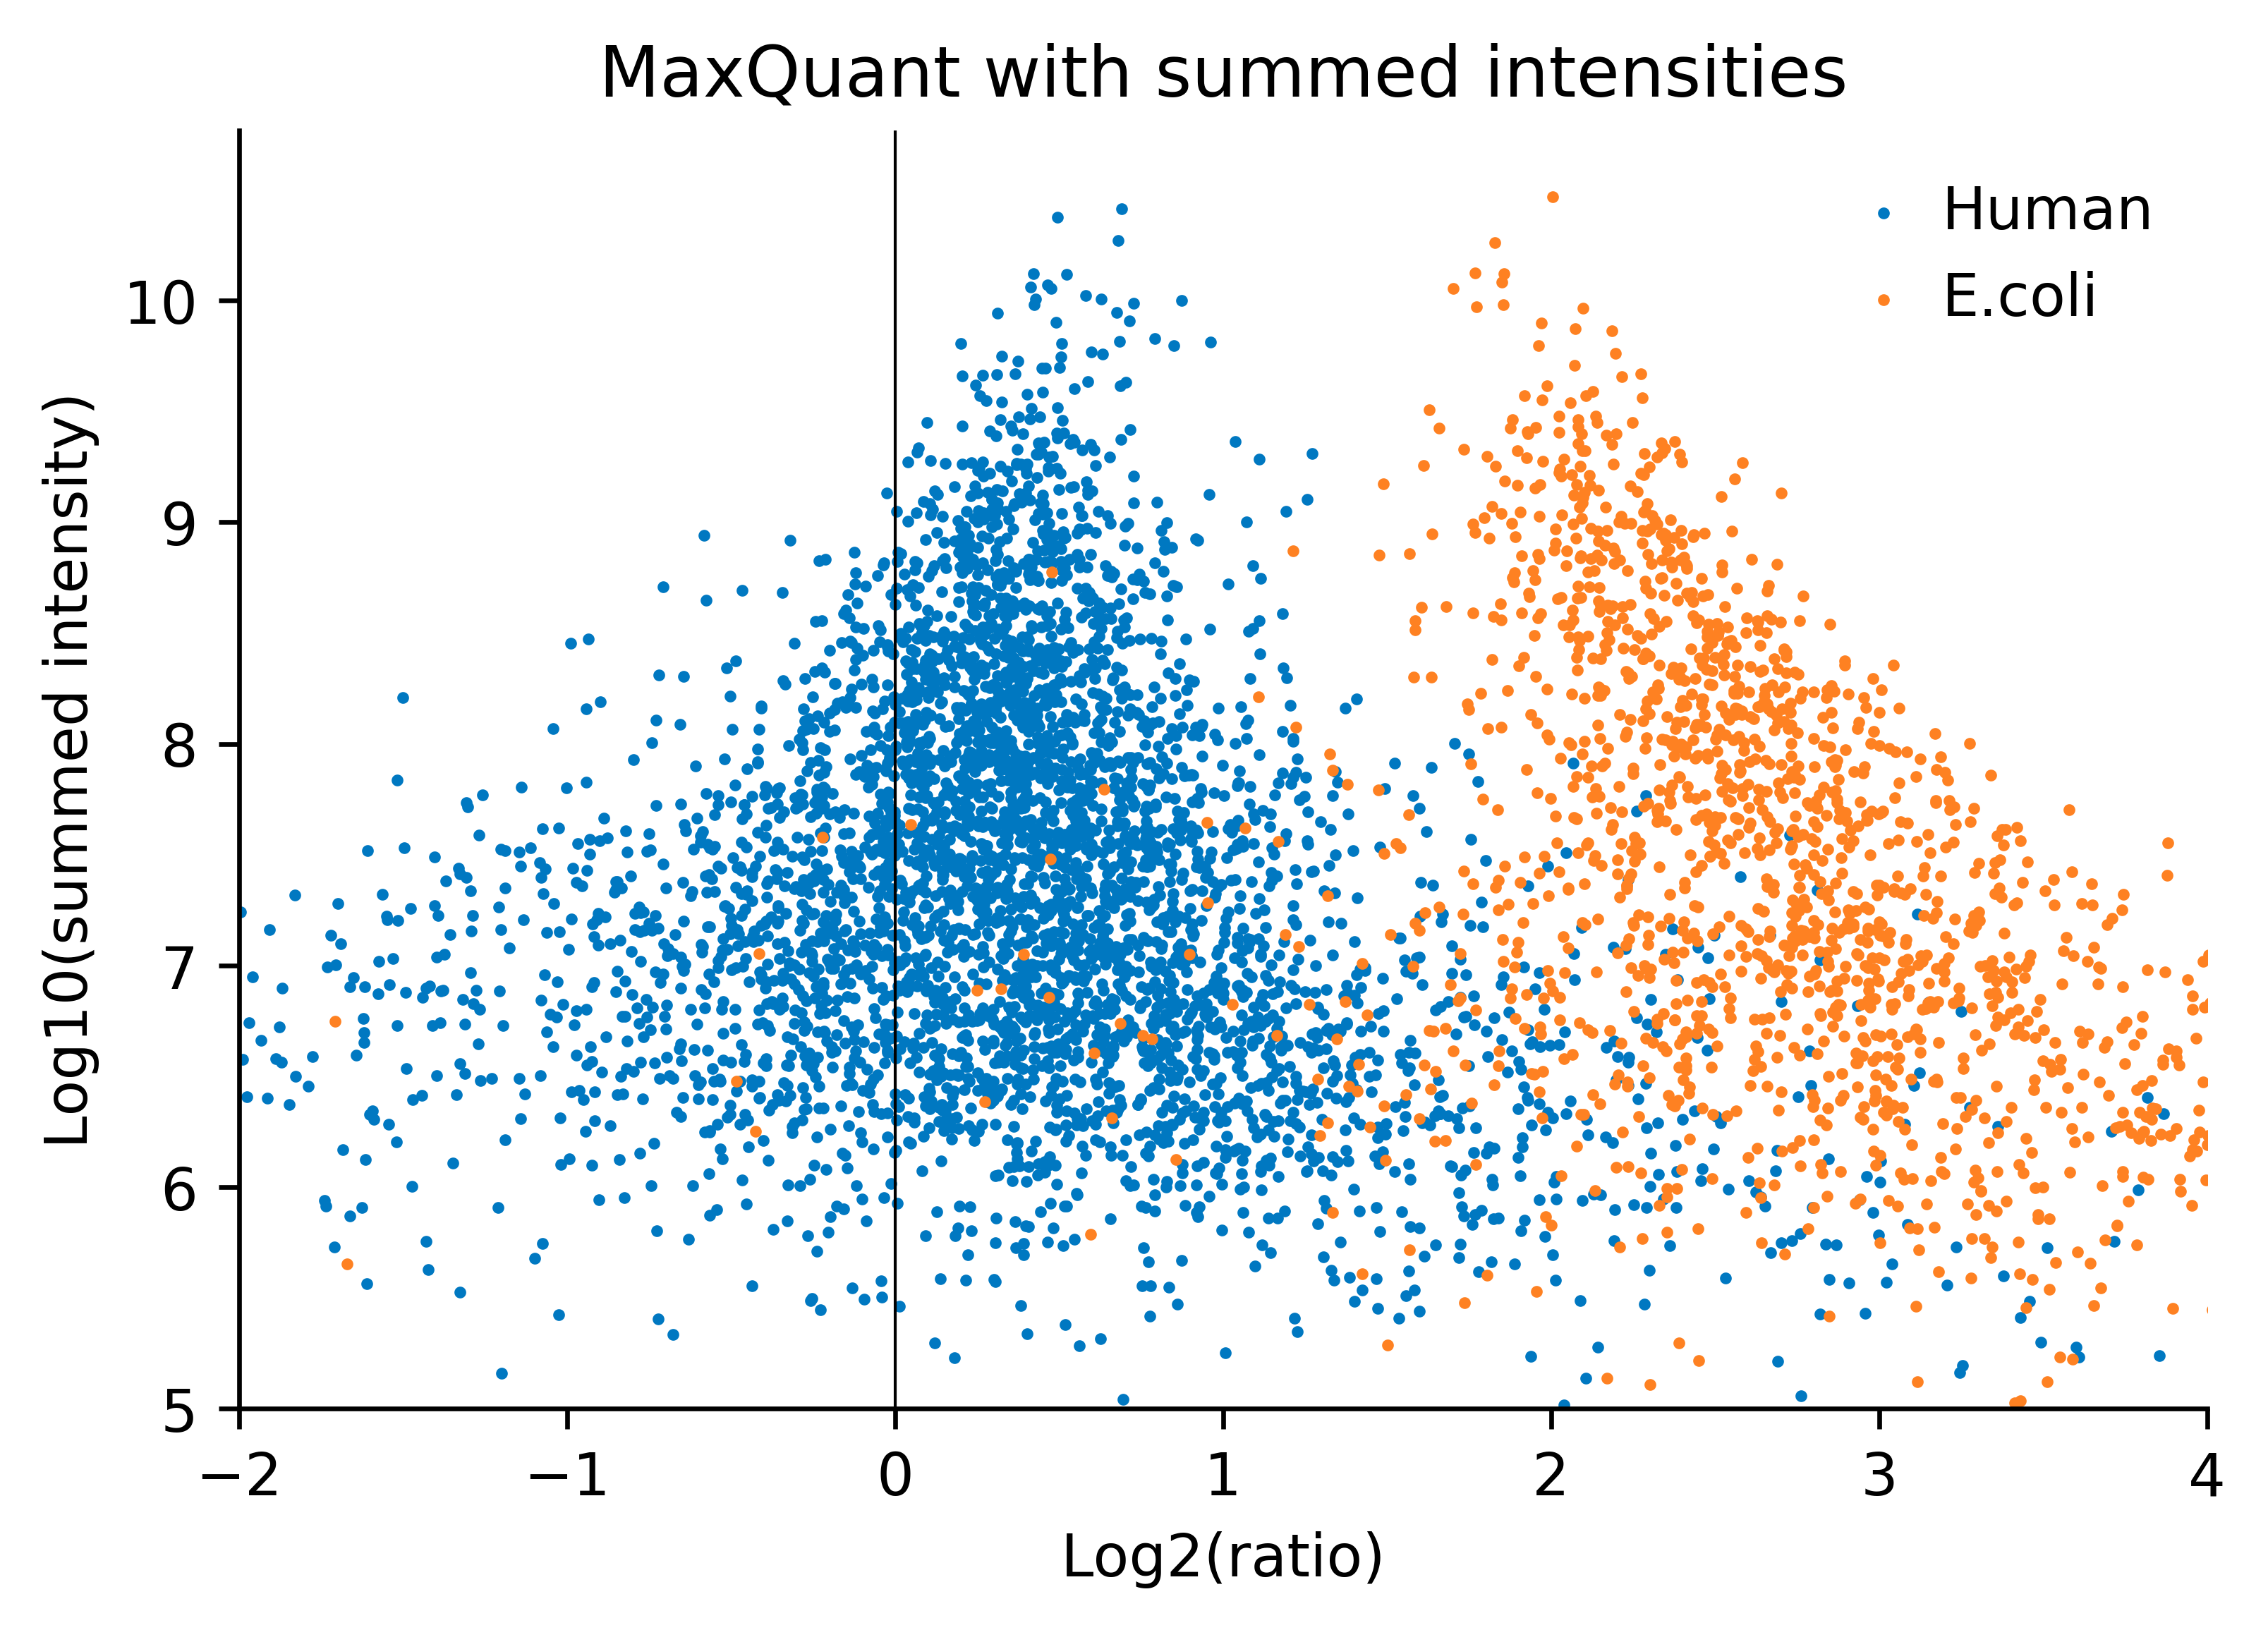

In [247]:
fig, ax = plt.subplots()

line1 = ax.scatter(MaxquantMBR_ECOLI_pic[MaxquantMBR_ECOLI_pic['Species'] == "Human"]["Log2(ratio)"], y=MaxquantMBR_ECOLI_pic[MaxquantMBR_ECOLI_pic['Species'] == "Human"]['Log10(summed intensity)'], c="#0078C1", s=1)

line2 = ax.scatter(MaxquantMBR_ECOLI_pic[MaxquantMBR_ECOLI_pic['Species'] == "E.coli"]["Log2(ratio)"], y=MaxquantMBR_ECOLI_pic[MaxquantMBR_ECOLI_pic['Species'] == "E.coli"]['Log10(summed intensity)'], c="#FE8122", s=1)

ax.axvline(x=0, c="black", linewidth=0.5, )
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend(handles=[line1, line2], labels=['Human', 'E.coli'], loc="best", frameon=False, handletextpad=0)

plt.title("MaxQuant with summed intensities")
plt.xlim(-2,4)
plt.ylim(5)
plt.xlabel("Log2(ratio)")
plt.ylabel("Log10(summed intensity)")
plt.show()

0.4103042195051021
0.8649645228716364
2.787680890407798
0.8547471466075148


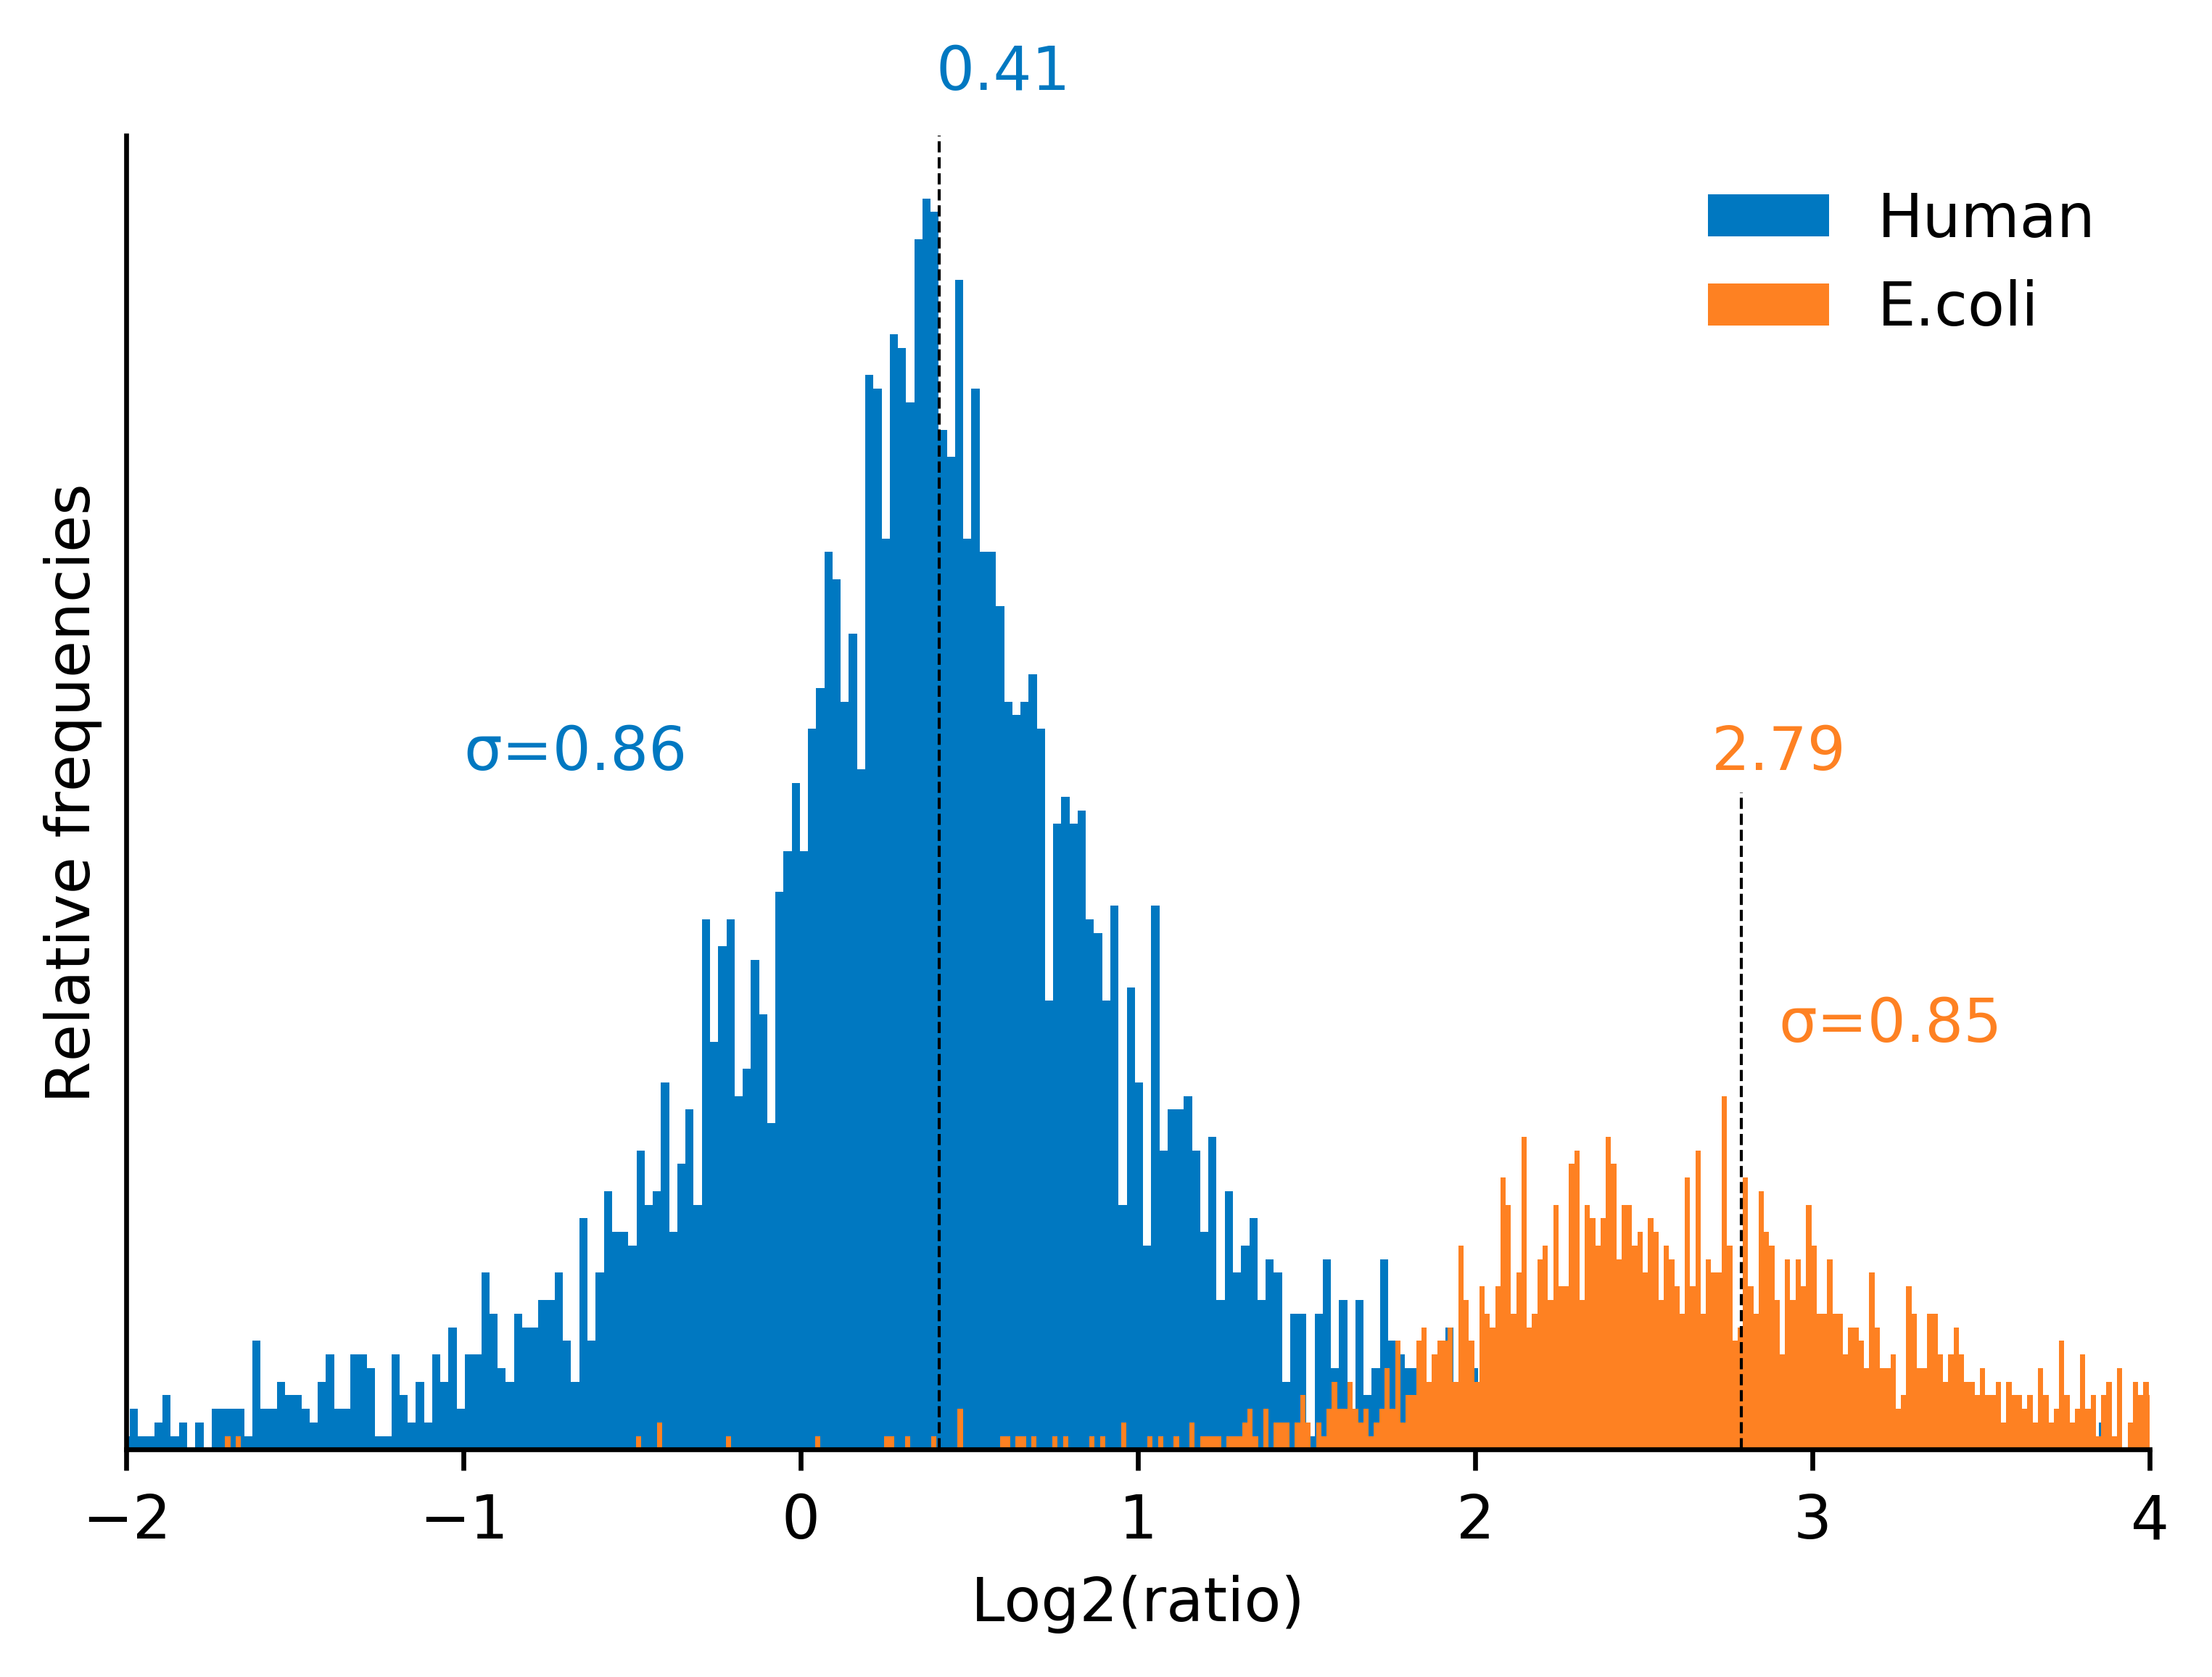

In [238]:
fig, ax = plt.subplots()

ax.hist(MaxquantMBR_ECOLI_pic[MaxquantMBR_ECOLI_pic['Species'] == "Human"]["Log2(ratio)"], bins=600, color="#0078C1")
u2 = np.mean(MaxquantMBR_ECOLI_pic[MaxquantMBR_ECOLI_pic['Species'] == "Human"]["Log2(ratio)"])
var2 = np.var(MaxquantMBR_ECOLI_pic[MaxquantMBR_ECOLI_pic['Species'] == "Human"]["Log2(ratio)"])
print(u2)
print(var2)

ax.hist(MaxquantMBR_ECOLI_pic[MaxquantMBR_ECOLI_pic['Species'] == "E.coli"]["Log2(ratio)"], bins=600, color="#FE8122")
u1 = np.mean(MaxquantMBR_ECOLI_pic[MaxquantMBR_ECOLI_pic['Species'] == "E.coli"]["Log2(ratio)"])
var1 = np.var(MaxquantMBR_ECOLI_pic[MaxquantMBR_ECOLI_pic['Species'] == "E.coli"]["Log2(ratio)"])
print(u1)
print(var1)



ax.legend(labels=['Human', 'E.coli'], loc="best", frameon=False)

ax.axvline(x=2.787680890407798, ymax=0.5, c="black", linewidth=0.5, ls="--")
ax.axvline(x=0.4103042195051021, c="black", linewidth=0.5, ls="--")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.text(0.40,100,"0.41", color="#0078C1")
plt.text(2.7,50,"2.79", color="#FE8122")

plt.text(-1,50,"σ=0.86", color="#0078C1")
plt.text(2.9,30,"σ=0.85", color="#FE8122")

plt.yticks([])
plt.xlabel("Log2(ratio)")
plt.ylabel("Relative frequencies")
plt.xlim(-2,4)
plt.show()

###  NoMBR

In [14]:
quantms_NoMBR = pd.read_csv("./UniprotSwiss/out_msstats.csv", sep=',', header=0)
quantms_NoMBR = quantms_NoMBR[-(quantms_NoMBR['ProteinName'].str.contains("DECOY_") | (quantms_NoMBR['ProteinName'].str.contains("CONTAMINANT"))) ]
print(len(set(quantms_NoMBR['ProteinName'])))
quantms_NoMBR.head()



7254


ProteinName            PeptideSequence  PrecursorCharge  \
0  sp|Q86U42|PABP2_HUMAN  .(Acetyl)AAAAAAAAAAGAAGGR                2   
1  sp|Q86U42|PABP2_HUMAN  .(Acetyl)AAAAAAAAAAGAAGGR                2   
2  sp|Q86U42|PABP2_HUMAN  .(Acetyl)AAAAAAAAAAGAAGGR                2   
3  sp|Q86U42|PABP2_HUMAN  .(Acetyl)AAAAAAAAAAGAAGGR                2   
4  sp|Q86U42|PABP2_HUMAN  .(Acetyl)AAAAAAAAAAGAAGGR                2   

   FragmentIon  ProductCharge IsotopeLabelType Condition  BioReplicate  Run  \
0          NaN              0                L     10 ug             1   10   
1          NaN              0                L     30 ug             2  101   
2          NaN              0                L     30 ug             2  104   
3          NaN              0                L     30 ug             2  106   
4          NaN              0                L     30 ug             2  110   

   Fraction   Intensity                                          Reference  
0        10  72228910.0  20070924_CL_Orbi2_XIC_Hela60_Ecoli10_Offgel_re...  
1         5  25118790.0  20070921_CL_Orbi2_XIC_Hela60_Ecoli30_Offgel_gr...  
2         8  33914750.0  20070923_CL_Orbi2_XIC_Hela60_Ecoli30_Offgel_gr...  
3        10  63519080.0  20070925_CL_Orbi2_XIC_Hela60_Ecoli30_Offgel_gr...  
4        14  45078440.0  20070927_CL_Orbi2_XIC_Hela60_Ecoli30_Offgel_gr...

In [15]:
MaxQuantNoMBR = pd.read_csv("./MaxquantNoMBR/proteinGroups.txt", sep='\t', header=0)
MaxQuantNoMBR = MaxQuantNoMBR[(MaxQuantNoMBR['Reverse'] != "+") & (MaxQuantNoMBR['Potential contaminant'] != "+")]
MaxQuantNoMBR = MaxQuantNoMBR[-(MaxQuantNoMBR['Protein IDs'].str.contains("CON_") | (MaxQuantNoMBR['Protein IDs'].str.contains("REV_")))]
print(len(set(MaxQuantNoMBR['Protein IDs'])))
MaxQuantNoMBR.head()


6585


Protein IDs  \
131  sp|A0A024RBG1|NUD4B_HUMAN;sp|Q96G61|NUD11_HUMA...   
132    sp|P0DPI2|GAL3A_HUMAN;sp|A0A0B4J2D5|GAL3B_HUMAN   
133                           sp|A0A1B0GVH7|IQCM_HUMAN   
134  sp|A0AV96|RBM47_HUMAN;sp|Q8TBY0|RBM46_HUMAN;sp...   
135                               sp|A0AVT1|UBA6_HUMAN   

                                  Majority protein IDs Peptide counts (all)  \
131  sp|A0A024RBG1|NUD4B_HUMAN;sp|Q96G61|NUD11_HUMA...              3;2;2;2   
132    sp|P0DPI2|GAL3A_HUMAN;sp|A0A0B4J2D5|GAL3B_HUMAN                  6;6   
133                           sp|A0A1B0GVH7|IQCM_HUMAN                    1   
134                              sp|A0AV96|RBM47_HUMAN               13;1;1   
135                               sp|A0AVT1|UBA6_HUMAN                   14   

    Peptide counts (razor+unique) Peptide counts (unique)  \
131                       2;1;1;1                 2;1;1;1   
132                           6;6                     6;6   
133                             1                       1   
134                        13;1;1                  13;1;1   
135                            14                      14   

                                         Fasta headers  Number of proteins  \
131  sp|A0A024RBG1|NUD4B_HUMAN Diphosphoinositol po...                   4   
132  sp|P0DPI2|GAL3A_HUMAN Glutamine amidotransfera...                   2   
133  sp|A0A1B0GVH7|IQCM_HUMAN IQ domain-containing ...                   1   
134  sp|A0AV96|RBM47_HUMAN RNA-binding protein 47 O...                   3   
135  sp|A0AVT1|UBA6_HUMAN Ubiquitin-like modifier-a...                   1   

     Peptides  Razor + unique peptides  Unique peptides  ...  \
131         3                        2                2  ...   
132         6                        6                6  ...   
133         1                        1                1  ...   
134        13                       13               13  ...   
135        14                       14               14  ...   

     Potential contaminant   id  \
131                    NaN  131   
132                    NaN  132   
133                    NaN  133   
134                    NaN  134   
135                    NaN  135   

                                           Peptide IDs  \
131                                     75;25777;47452   
132                 8129;10183;13680;21023;32387;34238   
133                                              11748   
134  7460;9066;13442;16161;16188;20475;20706;23953;...   
135  2589;4821;7859;8560;10609;20657;22230;23777;30...   

                                      Peptide is razor  \
131                                    False;True;True   
132                      True;True;True;True;True;True   
133                                               True   
134  True;True;True;True;True;True;True;True;True;T...   
135  True;True;True;True;True;True;True;True;True;T...   

                                      Mod. peptide IDs  \
131                                     75;27277;50577   
132                 8678;10821;14520;22315;34608;36594   
133                                              12454   
134  7990;9652;14263;17173;17200;21741;21979;25363;...   
135  2791;5195;8404;9130;11267;21928;23566;25184;32...   

                                          Evidence IDs  \
131  1485;425572;425573;425574;425575;425576;425577...   
132  138455;138456;138457;167606;167607;228148;2281...   
133                                      194389;194390   
134  129287;129288;129289;129290;129291;129292;1530...   
135  47829;47830;47831;47832;47833;47834;87419;8742...   

                                             MS/MS IDs  \
131  2310;552090;552091;552092;552093;552094;552095...   
132  182363;182364;182365;219978;219979;296558;2965...   
133                                      252930;252931   
134  171063;171064;171065;171066;171067;171068;2017...   
135  62996;62997;62998;62999;63000;63001;63002;6300...   

                                          

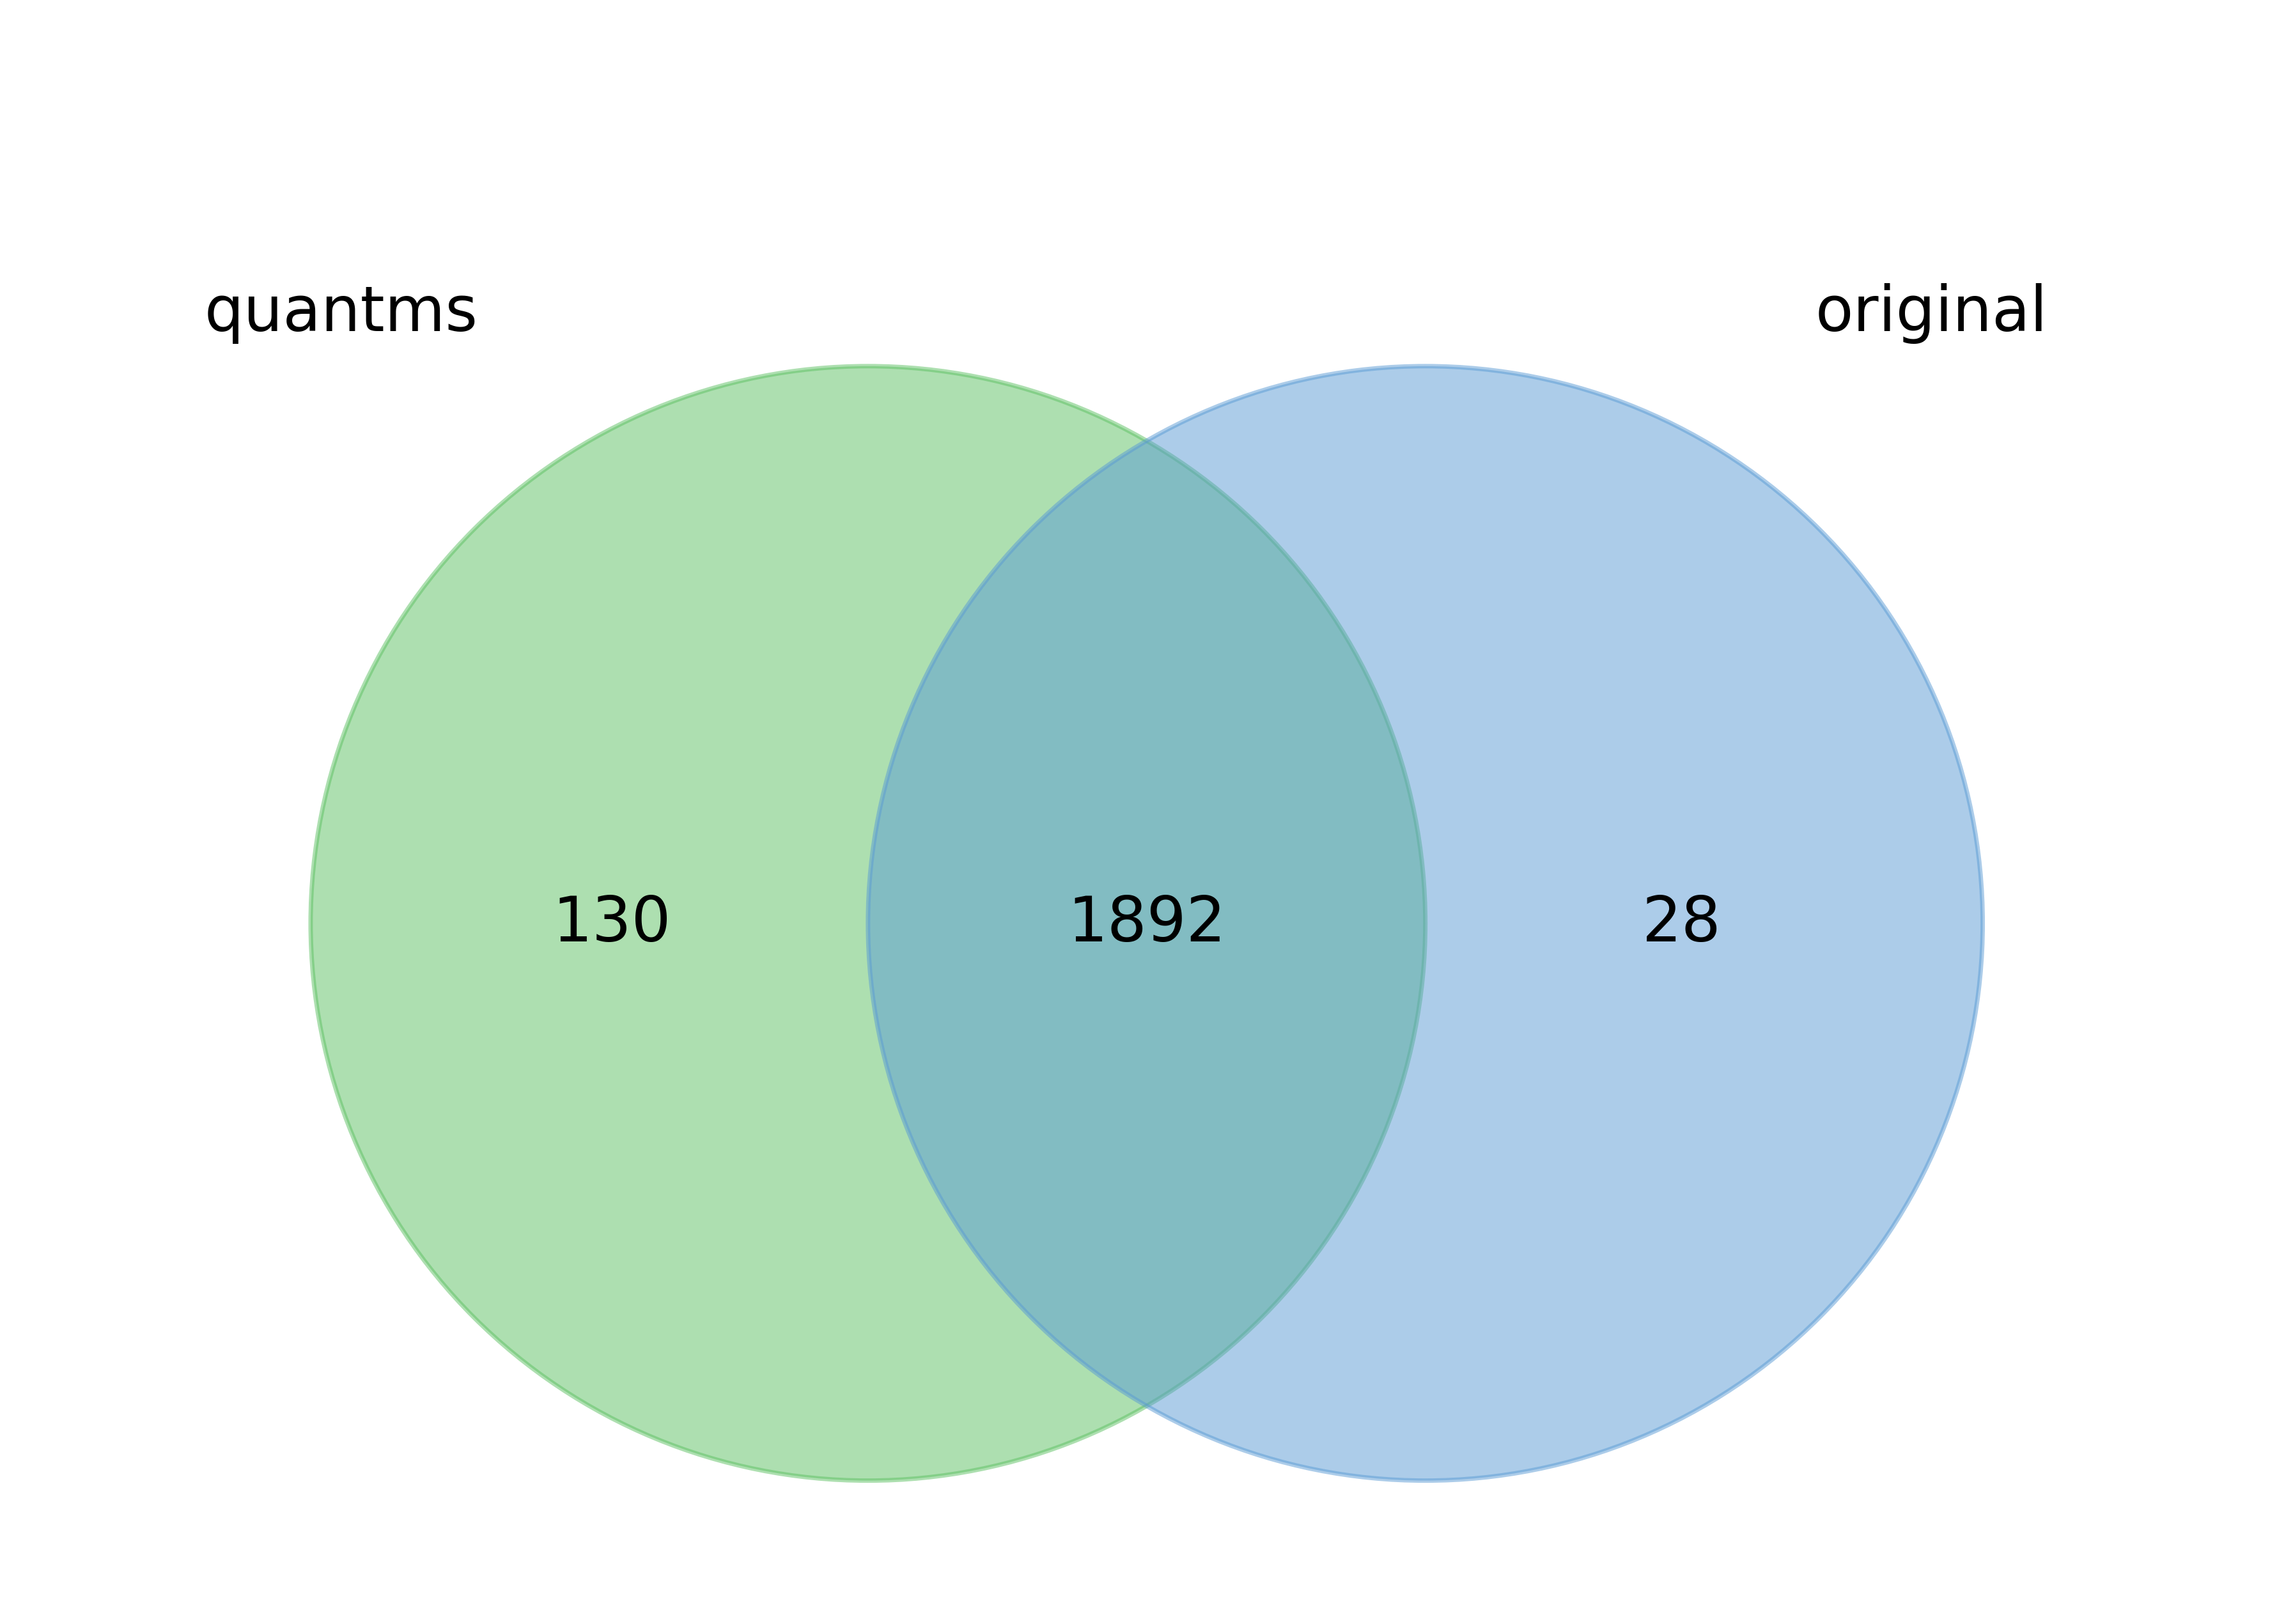

In [16]:
from pyvenn import venn

quantms_NoMBR["ProteinEntry"] = quantms_NoMBR.apply(lambda x: ";".join(sorted(x.ProteinName.split(";"))), axis=1)
MaxQuantNoMBR['Protein IDs'] = MaxQuantNoMBR.apply(lambda x: ";".join(sorted(x['Protein IDs'].split(";"))), axis=1)

quantms_NoMBR_ecoli = quantms_NoMBR[quantms_NoMBR['ProteinName'].str.contains("ECOLI")]
MaxQuantNoMBR_ecoli = MaxQuantNoMBR[MaxQuantNoMBR['Fasta headers'].str.contains("ECOLI")]
labels = venn.get_labels([set(quantms_NoMBR_ecoli["ProteinEntry"]), set(MaxQuantNoMBR_ecoli['Protein IDs'])], fill=['number'])
fig, ax = venn.venn2(labels, names=['quantms', 'original'], dpi=500)
ax.get_legend().remove()
plt.show()

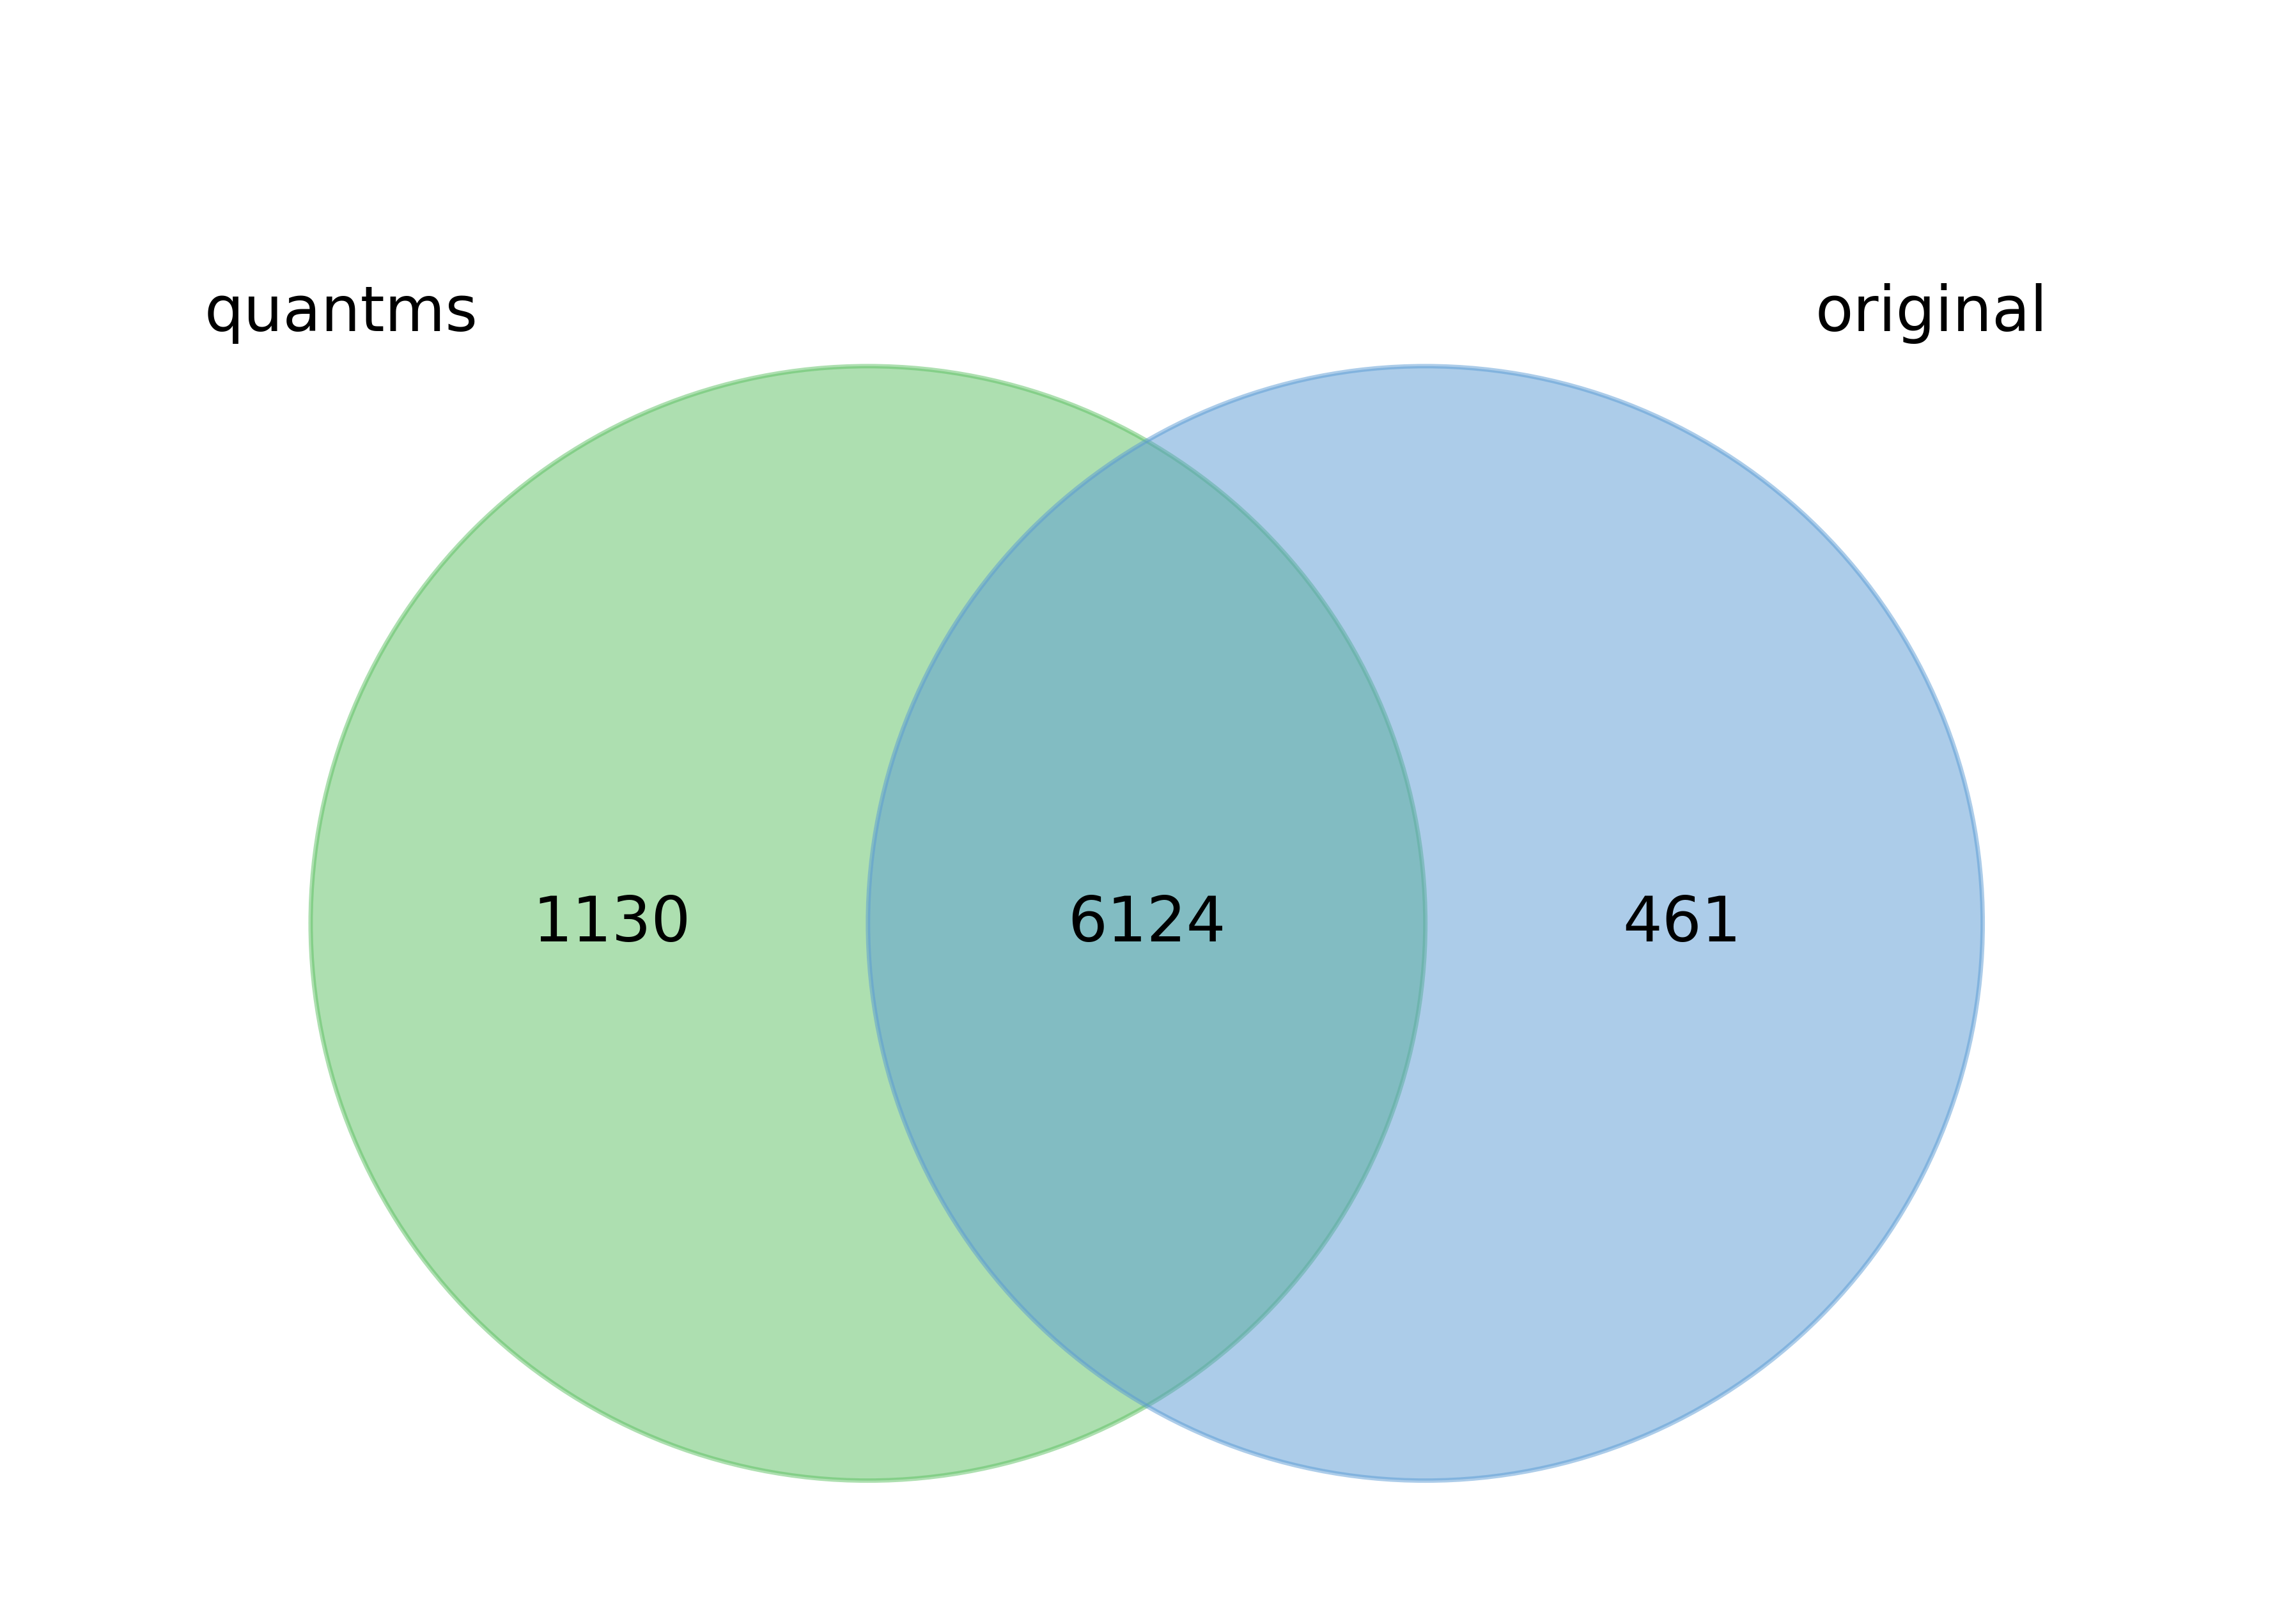

In [18]:
labels = venn.get_labels([set(quantms_NoMBR["ProteinEntry"]), set(MaxQuantNoMBR['Protein IDs'])], fill=['number'])
fig, ax = venn.venn2(labels, names=['quantms', 'original'], dpi=500)
ax.get_legend().remove()
plt.show()


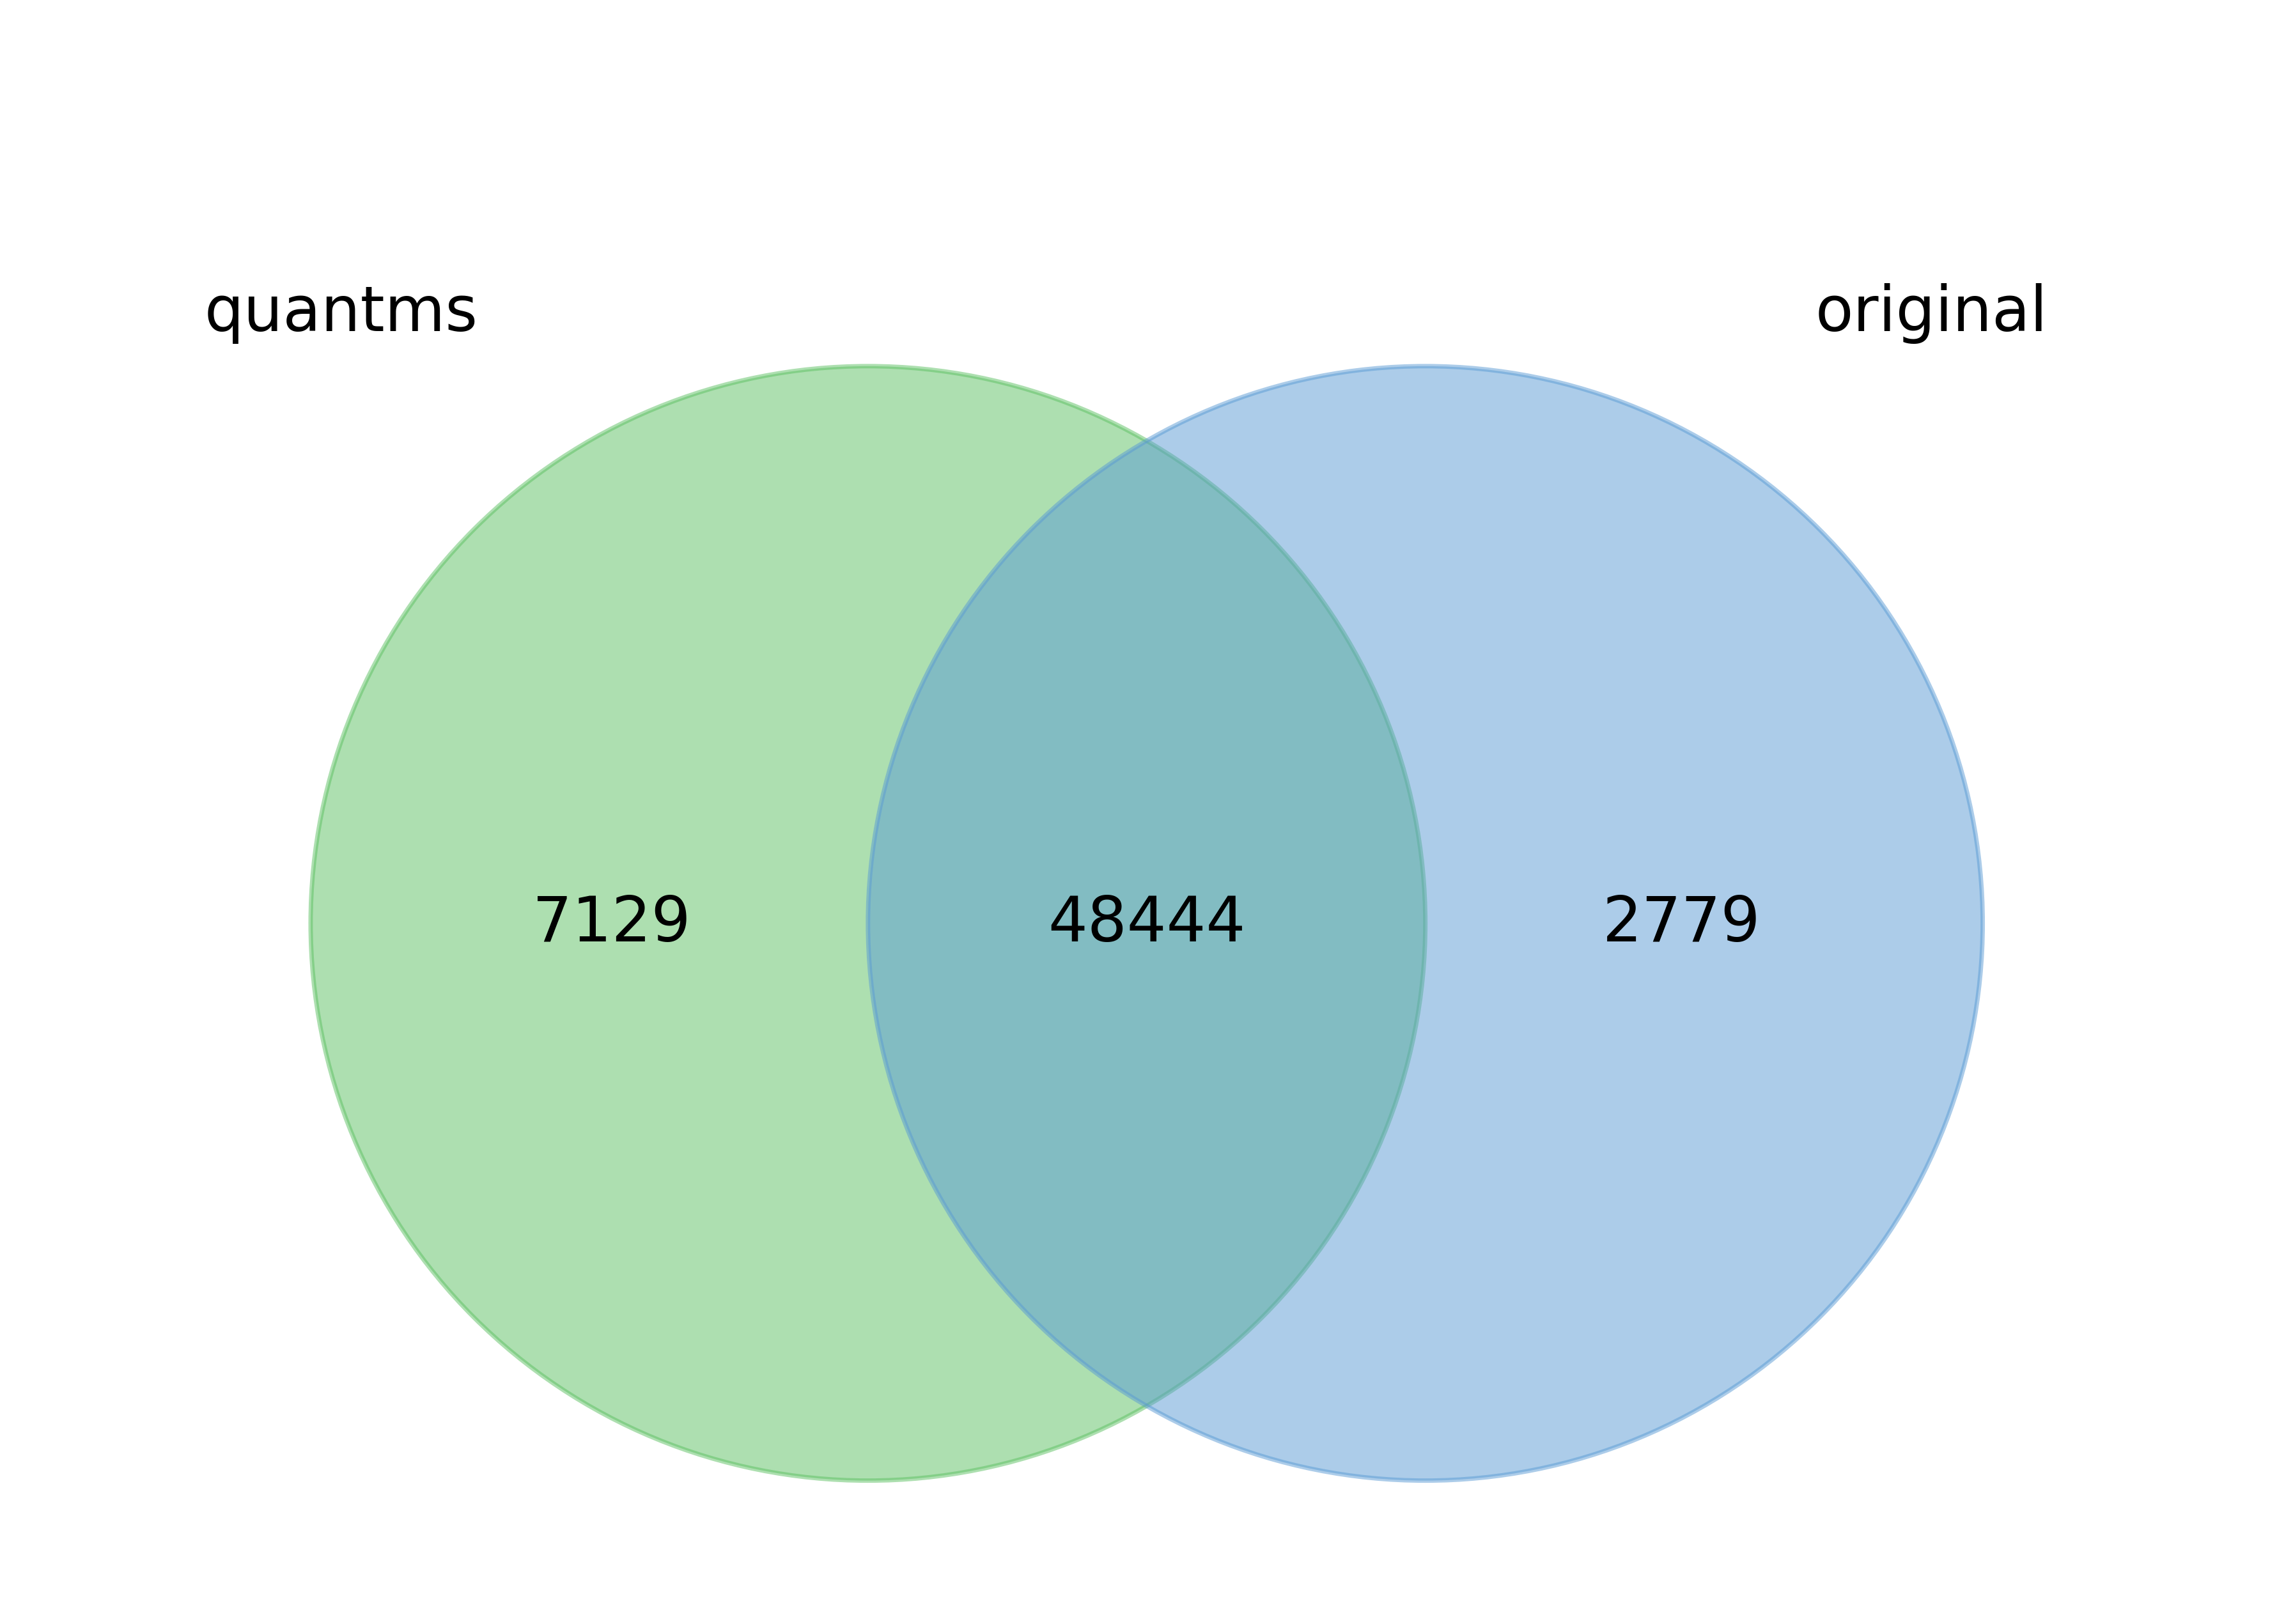

In [19]:
from pyteomics import mztab
MaxquantNoMBRPEP = pd.read_csv("./MaxquantNoMBR/peptides.txt", sep='\t', header=0)
MaxquantNoMBRPEP = MaxquantNoMBRPEP[(MaxquantNoMBRPEP['Reverse'] != "+") & (MaxquantNoMBRPEP['Potential contaminant'] != "+")]

quantms_mztab = mztab.MzTab("./UniprotSwiss/out.mzTab")
quantms_pep = quantms_mztab.peptide_table
quantms_pep = quantms_pep[quantms_pep['opt_global_cv_MS:1002217_decoy_peptide'] != 1]
labels = venn.get_labels([set(quantms_pep['sequence']), set(MaxquantNoMBRPEP['Sequence'])], fill=['number'])
fig, ax = venn.venn2(labels, names=['quantms', 'original'], dpi=500)
ax.get_legend().remove()
plt.show()


In [ ]:
MaxquantNoMBRPEP

### CV Within E Coli Proteins

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


28.107073049941604
29.63877296151191
27.22899899670404
27.77548488231757
33.96576180198519
34.81087049579557
32.33340743721942
33.15357429888335


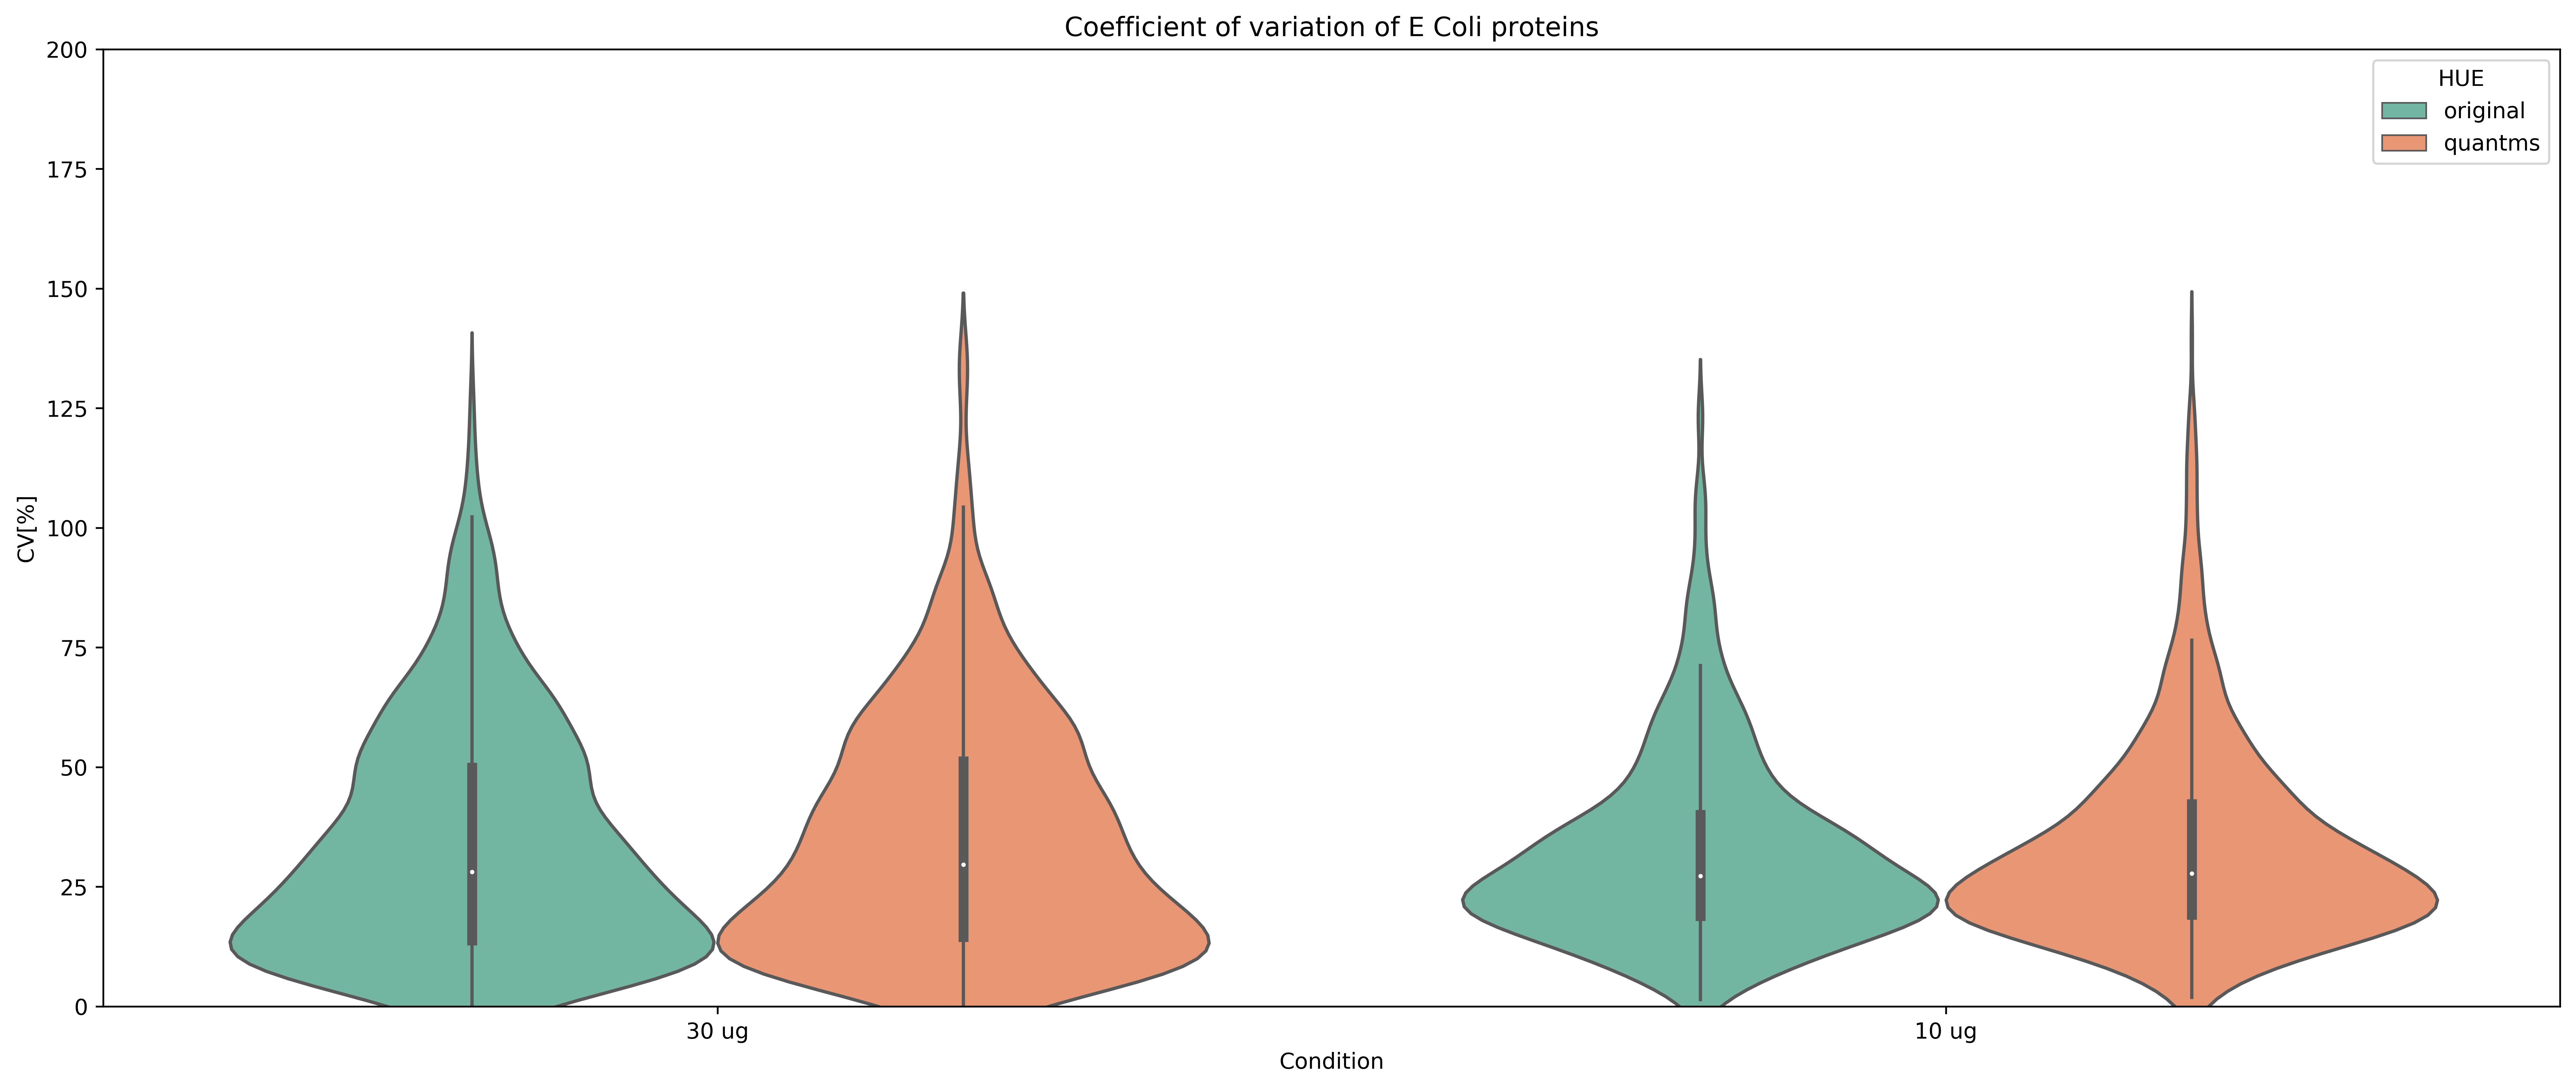

In [42]:
MaxQuantNoMBR_ecoli = MaxQuantNoMBR[MaxQuantNoMBR['Fasta headers'].str.contains("ECOLI")]
MaxQuantNoMBR_cv = MaxQuantNoMBR_ecoli[['Intensity H1', 'Intensity H2', 'Intensity H3']]
MaxQuantNoMBR_cv.columns = ['TechRep1','TechRep2', 'TechRep3']
MaxQuantNoMBR_cv = MaxQuantNoMBR_cv.copy()
MaxQuantNoMBR_cv['Condition'] = "30 ug"

temp = MaxQuantNoMBR_ecoli[['Intensity L1', 'Intensity L2', 'Intensity L3']]
temp.columns = ['TechRep1','TechRep2', 'TechRep3']
temp = temp.copy()
temp['Condition'] = "10 ug"
MaxQuantNoMBR_cv = MaxQuantNoMBR_cv.append(temp)
MaxQuantNoMBR_cv['HUE'] = "original"
MaxQuantNoMBR_cv = MaxQuantNoMBR_cv[(MaxQuantNoMBR_cv.T != 0).any()]
MaxQuantNoMBR_cv['CV[%]'] = MaxQuantNoMBR_cv.apply(lambda x: np.std(x[:3]) / np.mean(x[:3]) * 100, axis=1)

n_data = pd.DataFrame(None,columns = ['TechRep1','TechRep2', 'TechRep3', 'Condition', "CV[%]", "HUE"])
for condition in np.unique(quantms['Condition']):
    quant_condition = quantms.loc[(quantms['ProteinName'].str.contains("ECOLI")) & (quantms['Condition'] == condition)]

    for protein in np.unique(quant_condition['ProteinName']):
        t = quant_condition[quant_condition['ProteinName'] == protein]
        
        # sum intensity across fraction
        if condition == "10 ug":
            TechRep1 = np.sum(t[t['Run'].isin([i for i in range(1,25)])]['Intensity'])
            TechRep2 = np.sum(t[t['Run'].isin([i for i in range(25,49)])]['Intensity'])
            TechRep3 = np.sum(t[t['Run'].isin([i for i in range(49,73)])]['Intensity'])
        else:
            TechRep1 = np.sum(t[t['Run'].isin([i for i in range(73,97)])]['Intensity'])
            TechRep2 = np.sum(t[t['Run'].isin([i for i in range(97,121)])]['Intensity'])
            TechRep3 = np.sum(t[t['Run'].isin([i for i in range(121,145)])]['Intensity'])
            
        mean = np.mean([TechRep1, TechRep2, TechRep3])
        std = np.std([TechRep1, TechRep2, TechRep3])
        n_data = n_data.append({'TechRep1':TechRep1, 
                       'TechRep2': TechRep2, 'TechRep3': TechRep3, 
                       'Condition': condition, "CV[%]": 100 * (std / mean), "HUE": "quantms"}, ignore_index=True)
        
cv_data = MaxQuantNoMBR_cv.append(n_data)
cv_data = cv_data[(cv_data['TechRep1'] !=0.0) & (cv_data['TechRep2'] !=0.0) &
                 (cv_data['TechRep3'] !=0.0)]

print(np.median(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))

print(np.mean(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.mean(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.mean(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))
print(np.mean(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))

plt.figure(figsize=(20,8), dpi=500)
plt.ylim(0, 200)
plt.title("Coefficient of variation of E Coli proteins")
sns.violinplot(x = "Condition", y="CV[%]", data=cv_data, scale= "count", palette="Set2", hue="HUE")

plt.show()



### Calcaulate CV of HUMAN Proteins

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


40.86672984742084
42.34868246511512
28.917004915545014
29.221707172806138
42.98040493345681
44.79886035596278
34.32723916927967
35.32519683479681


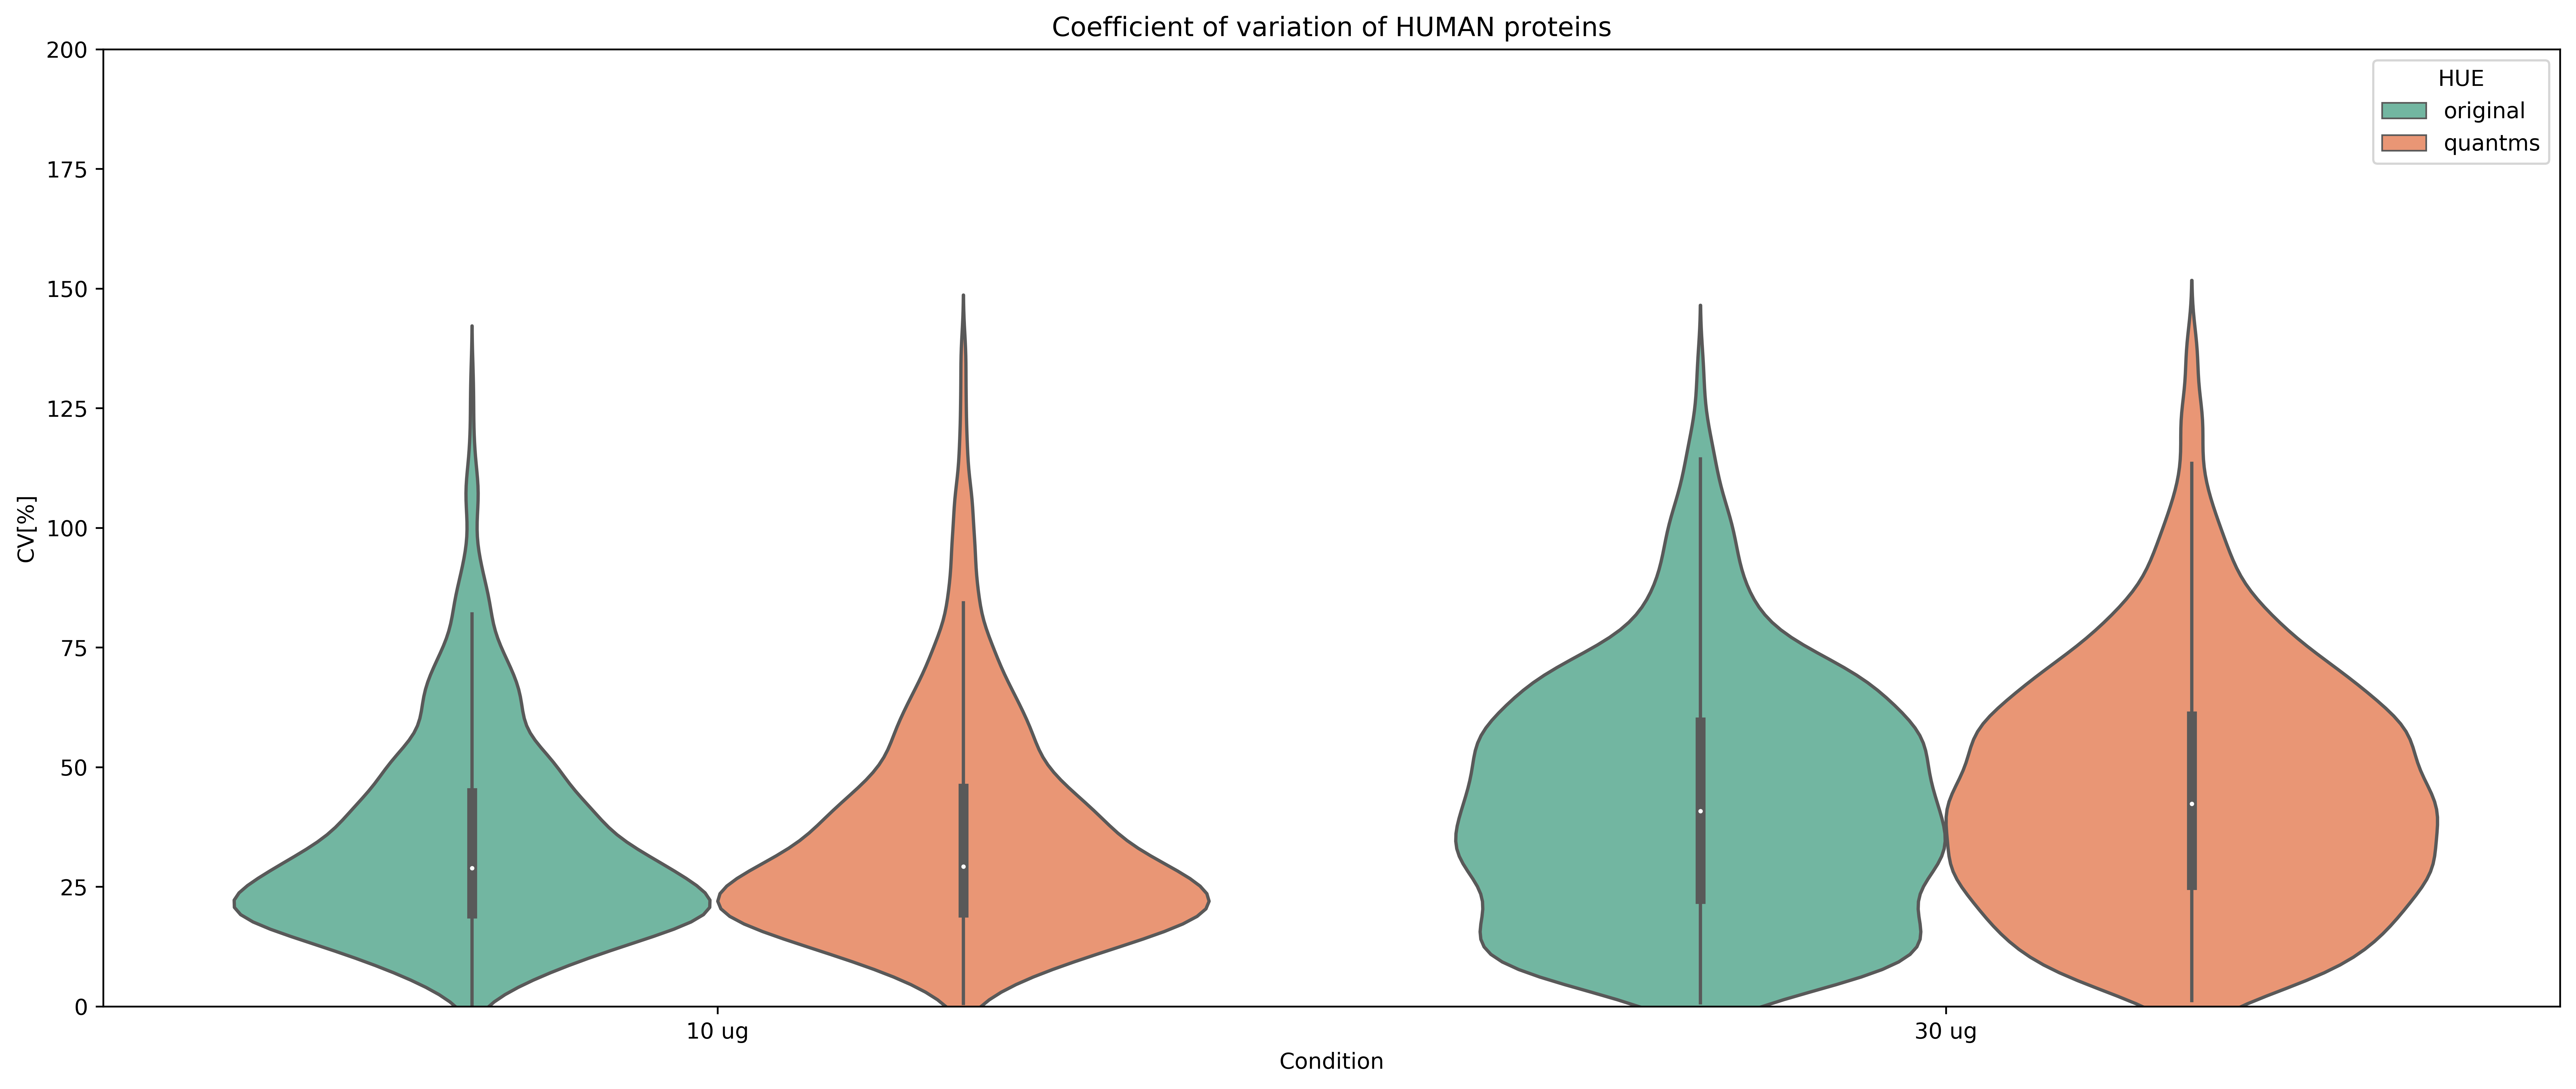

In [43]:
MaxQuantNoMBR_human = MaxQuantNoMBR[-MaxQuantNoMBR['Fasta headers'].str.contains("ECOLI")]
MaxQuantNoMBR_cv = MaxQuantNoMBR_human[['Intensity H1', 'Intensity H2', 'Intensity H3']]
MaxQuantNoMBR_cv.columns = ['TechRep1','TechRep2', 'TechRep3']
MaxQuantNoMBR_cv = MaxQuantNoMBR_cv.copy()
MaxQuantNoMBR_cv['Condition'] = "30 ug"

temp = MaxQuantNoMBR_human[['Intensity L1', 'Intensity L2', 'Intensity L3']]
temp.columns = ['TechRep1','TechRep2', 'TechRep3']
temp = temp.copy()
temp['Condition'] = "10 ug"
MaxQuantNoMBR_cv = MaxQuantNoMBR_cv.append(temp)
MaxQuantNoMBR_cv['HUE'] = "original"
MaxQuantNoMBR_cv = MaxQuantNoMBR_cv[(MaxQuantNoMBR_cv.T != 0).any()]
MaxQuantNoMBR_cv['CV[%]'] = MaxQuantNoMBR_cv.apply(lambda x: np.std(x[:3]) / np.mean(x[:3]) * 100, axis=1)


b_data = pd.DataFrame(None,columns = ['TechRep1','TechRep2', 'TechRep3', 'Condition', "CV[%]", "HUE"])
quantms_background = quantms[quantms['ProteinName'].str.contains("HUMAN")]
for condition in np.unique(quantms_background['Condition']):
    quantms_background_condition = quantms_background.loc[quantms_background['Condition'] == condition]
        
    for protein in np.unique(quantms_background_condition['ProteinName']):
        t = quantms_background_condition[quantms_background_condition['ProteinName'] == protein]
        
        # sum intensity across fraction
        if condition == "10 ug":
            TechRep1 = np.sum(t[t['Run'].isin([i for i in range(1,25)])]['Intensity'])
            TechRep2 = np.sum(t[t['Run'].isin([i for i in range(25,49)])]['Intensity'])
            TechRep3 = np.sum(t[t['Run'].isin([i for i in range(49,73)])]['Intensity'])
        else:
            TechRep1 = np.sum(t[t['Run'].isin([i for i in range(73,97)])]['Intensity'])
            TechRep2 = np.sum(t[t['Run'].isin([i for i in range(97,121)])]['Intensity'])
            TechRep3 = np.sum(t[t['Run'].isin([i for i in range(121,145)])]['Intensity'])
            
        mean = np.mean([TechRep1, TechRep2, TechRep3])
        std = np.std([TechRep1, TechRep2, TechRep3])
        
        b_data = b_data.append({'TechRep1':TechRep1, 
                       'TechRep2': TechRep2, 'TechRep3': TechRep3, 
                       'Condition': condition, "CV[%]": 100 * (std / mean), "HUE": "quantms"}, ignore_index=True)
cv_data = MaxQuantNoMBR_cv.append(b_data)
cv_data = cv_data[(cv_data['TechRep1'] !=0.0) & (cv_data['TechRep2'] !=0.0) &
                 (cv_data['TechRep3'] !=0.0)]

print(np.median(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))
print(np.median(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))

print(np.mean(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.mean(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "30 ug")]["CV[%]"]))
print(np.mean(cv_data[(cv_data['HUE'] == "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))
print(np.mean(cv_data[(cv_data['HUE'] != "original") & (cv_data['Condition'] == "10 ug")]["CV[%]"]))

plt.figure(figsize=(20,8), dpi=500)
plt.ylim(0, 200)
plt.title("Coefficient of variation of HUMAN proteins")
sns.violinplot(x = "Condition", y="CV[%]", data=cv_data, scale= "count", palette="Set2", hue="HUE",
               order=['10 ug', '30 ug'])

plt.show()
